<h1 style="text-align:center;font-family:times;font-size:30px;font-style: italic;font-family:ALGERIAN;border:solid;color:skyblue">
Projet de machine learning : House price prediction, Analyse exploratoire</h1>
 

<br>

<center><img src="https://images.unsplash.com/photo-1516156008625-3a9d6067fab5?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80"></center>

<center><div style="font-family:times;font-size:25px">
     Groupe 4 <br> 
    Ange Gnimdou KABASSINA <br> Isabelle Danielle MOSSE <br> Moustapha WADE <br> Durel Valdez NZIALI TCHAMOU 
</div></center>

<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 1. Importation des librairies et chargement des fichiers</h1>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 Importation des librairies</h2>
</div>

In [1]:
# commençons par importer les bibliothèques nécessaires pour notre travail
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.formula.api import ols
import statsmodels.api
import seaborn as sb
import ppscore as pps
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import missingno as msno

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.3 - Chargements des données</h2>
</div>

In [3]:
# emplacement de notre environement de travail 
HOME_DIR = Path.cwd().parent

# création d'une variable contenant le chemin d'acces aux données 
DATA_DIR = Path(HOME_DIR, "datas")

print(f"Work directory: {HOME_DIR} \nData directory: {DATA_DIR}")

Work directory: C:\Users\HP ProBook\Documents\projet ml 
Data directory: C:\Users\HP ProBook\Documents\projet ml\datas


In [4]:
# chargement des données 
data_h = pd.read_csv(Path(DATA_DIR, "train.csv"), sep=",")

<p style="text-align:justify;font-family:times;font-size:15px">  Voyons le nombre d'observations et de variables de la base</p>

In [5]:
data_h.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
data_h.shape

(1460, 81)

<p style="text-align:justify;font-family:times;font-size:15px">  Voyons le nombre d'observations et de variables de la baseInspectons le type de variables auxquelles nous avons à faire </p>

In [7]:
data_h.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 2. Netoyage des données</h1>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 Détection et gestion des doublons </h2>
</div>



<p style="text-align:justify;font-family:times;font-size:15px"> Nous allons d'abord supprimer la colonne Id car elle n’est pas nécessaire pour l’entraînement du modèle. </p>

In [8]:
# suppression de la colonne Id
data_h = data_h.drop('Id', axis=1)


<p style="text-align:justify;font-family:times;font-size:15px"> Ensuite nous supprimons les lignes en double dans notre jeu de données.  
</p>

In [9]:
# suppression des doublons 
data_h = data_h.drop_duplicates()

In [10]:
# verifions le nombre d'observations restantes
data_h.shape

(1460, 80)

<p style="text-align:justify;font-family:times;font-size:15px">  Aucun doublon dans le jeu de données ! </p>

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 Détection et gestion des valeurs manquantes </h2>
</div>

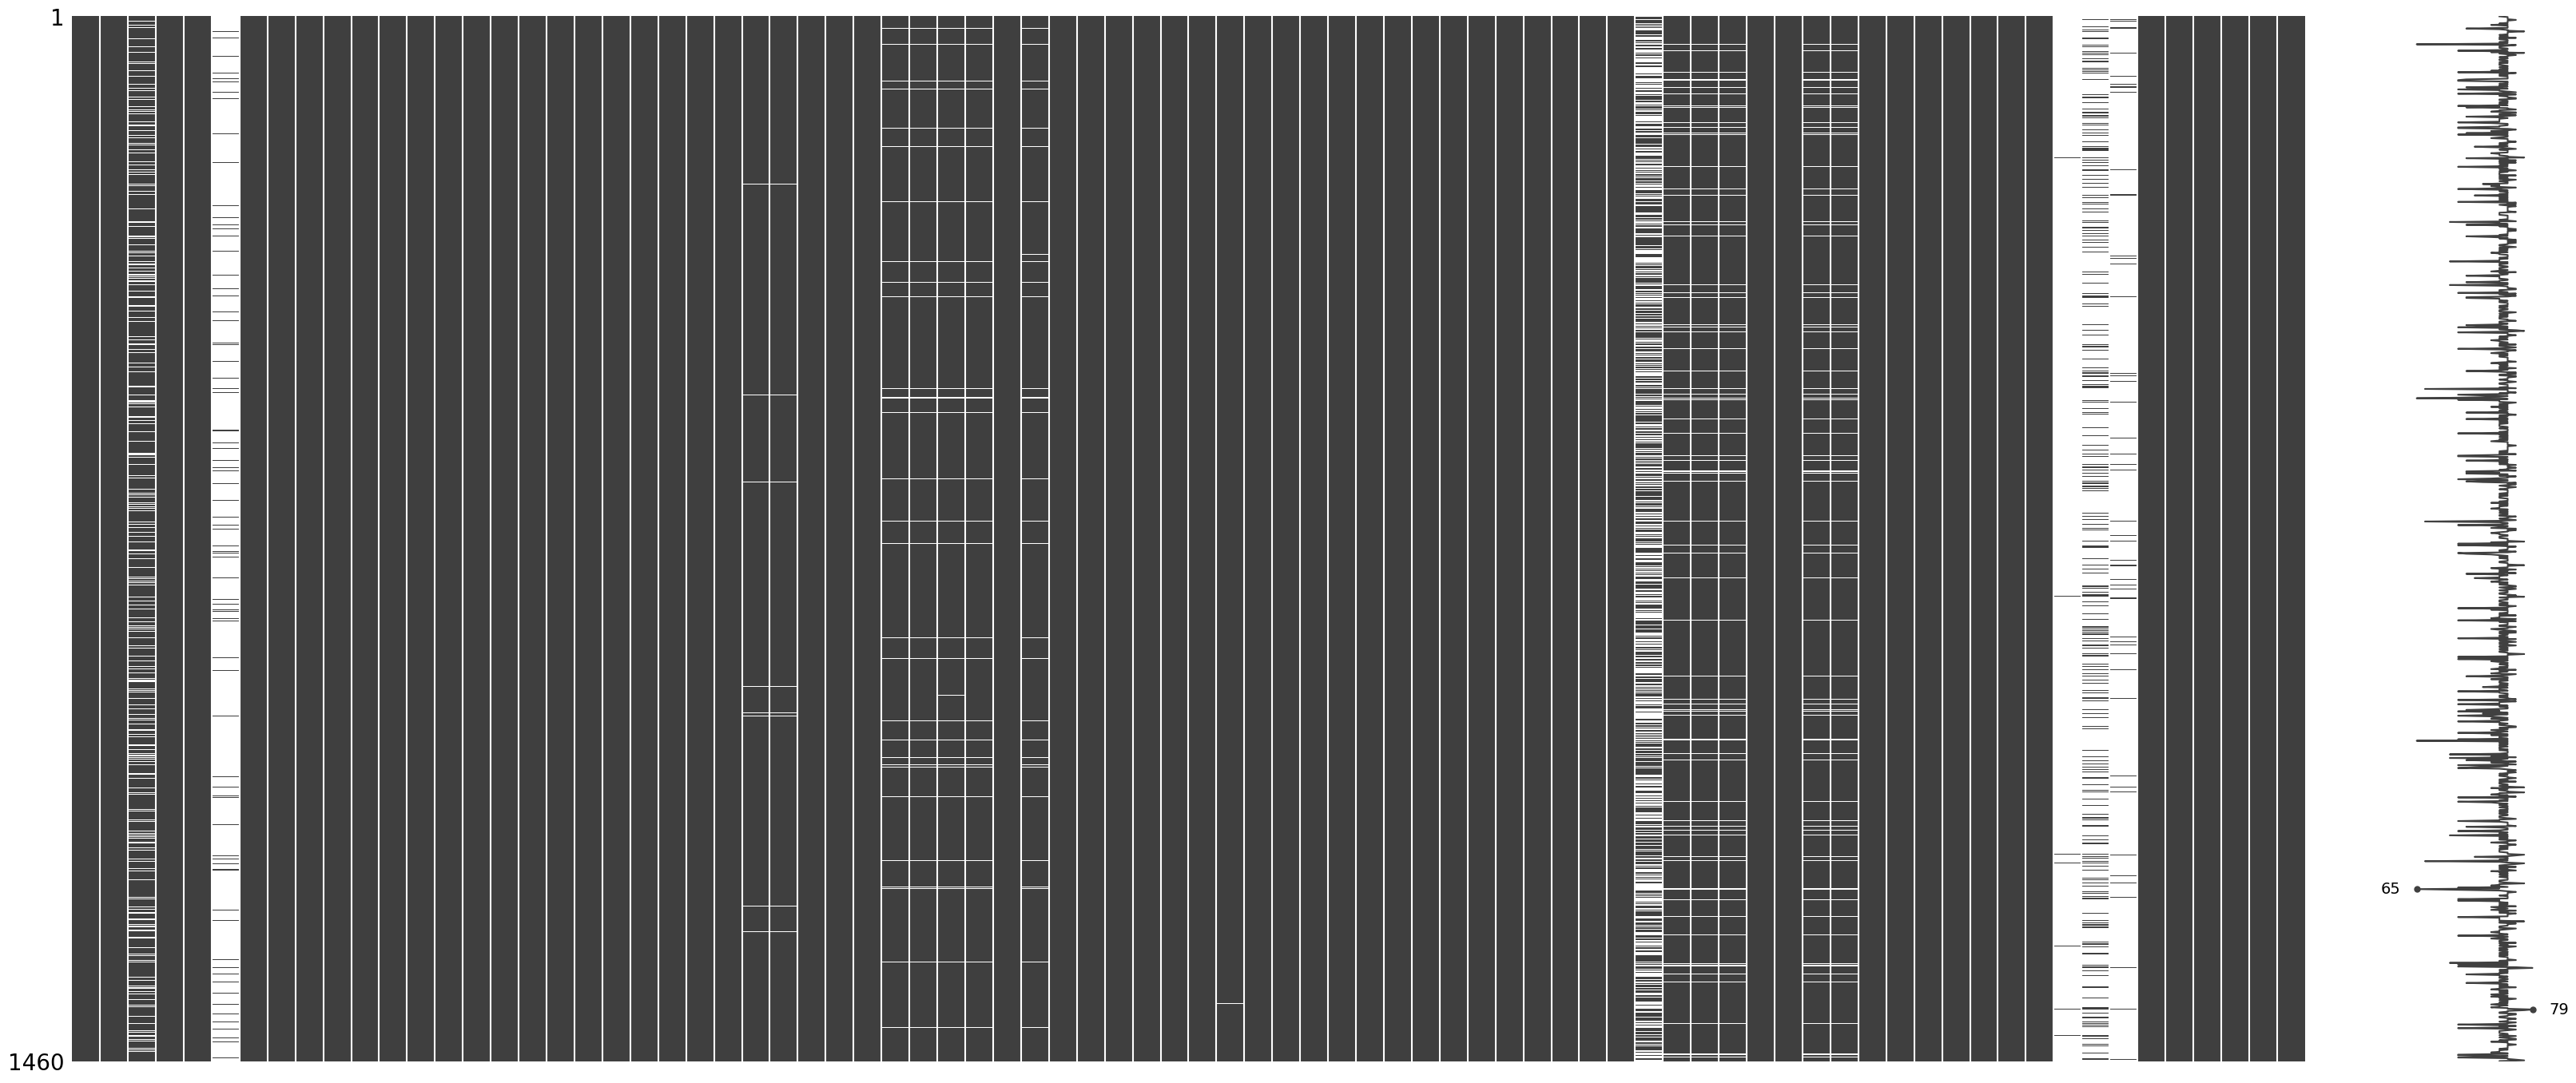

In [11]:
# visualisation des Valeurs manquantes
msno.matrix(data_h, figsize=(40, 17));

In [12]:
# Calcul du taux de valeurs manquantes pour chaque variable
missing_percentage = (data_h.isnull().sum() / len(data_h)) * 100

# Créez un DataFrame pour stocker le taux de valeurs manquantes
missing_data = pd.DataFrame({'Variable': data_h.columns, 'MissingPercentage': missing_percentage})

# Triez le DataFrame en fonction du taux de valeurs manquantes
missing_data = missing_data.sort_values(by='MissingPercentage', ascending=False)

missing_data.head(3)

Variable  MissingPercentage
PoolQC            PoolQC          99.520548
MiscFeature  MiscFeature          96.301370
Alley              Alley          93.767123

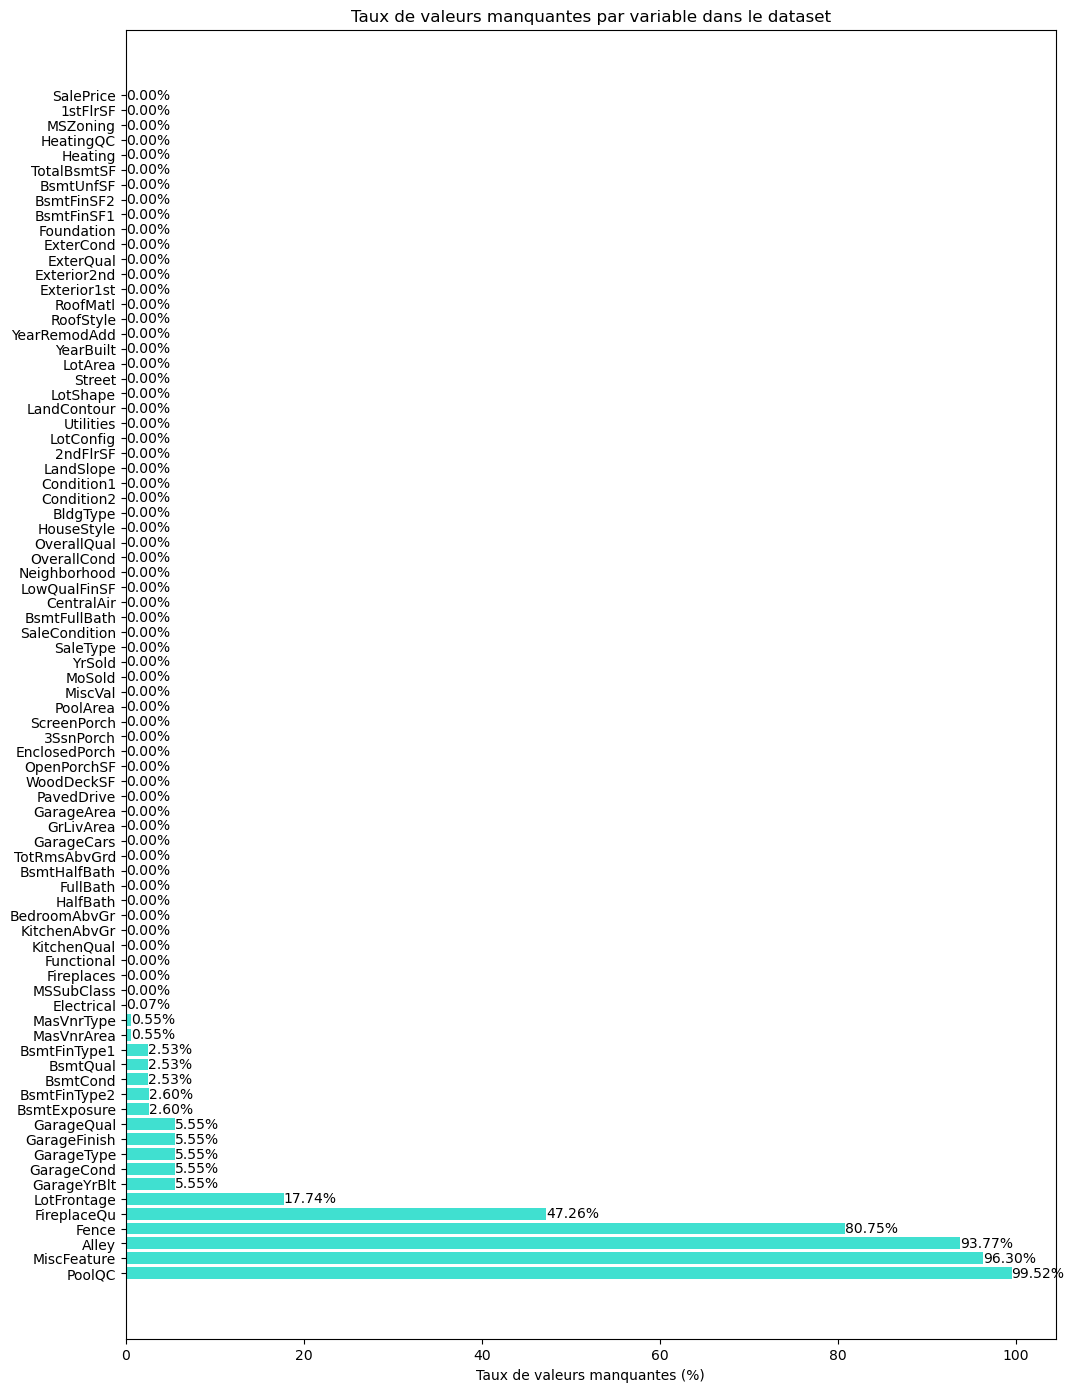

In [13]:
# Tracé du graphe
plt.figure(figsize=(12, 17))
bars = plt.barh(missing_data['Variable'], missing_data['MissingPercentage'], color='turquoise')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}%',
             va='center', ha='left', color='black')
plt.xlabel('Taux de valeurs manquantes (%)')
plt.title('Taux de valeurs manquantes par variable dans le dataset')
plt.show()


<p style="text-align:justify;font-family:times;font-size:15px">  
Les graphiques ci dessus nous donnent un petit aperçu de la proportion de valeurs manquantes par variables. On peut donc identifier celles sur lesquelles travailler. Cependant il serait absurde de corriger une variable avec plus de 45 % de valeurs manquantes parce que cela reviendrait à créer près de la moitié des observations; pour cela intuitivement le reflexe serait juste supprimer ces variables mais il est plus judicieux d'identifier ces variables, de voir ce qu'elles mesurent afin d'essayer de comprendre d'où peuvent provenir ces NA afin de prendre une meilleures décisions.
</p>

In [14]:
# identifier les variables avec un taux de valeurs manquantes supérieur à 45%
resultat = missing_data[missing_data['MissingPercentage'] > 45]

# Afficher les noms des variables avec un taux de valeurs manquantes supérieur à 45%
var_missing_45 = resultat['Variable'].tolist()
print(var_missing_45)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']


- <p style="text-align:justify;font-family:times;font-size:15px"> PoolQC : Qualité de la picine. les NA signifient qu'il n'y a pas de piscine.</p>
    
- <p style="text-align:justify;font-family:times;font-size:15px"> MiscFeature : Fonctionnalité diverse non couverte dans d’autres catégories. Les NA signifie "aucune autre"</p>
    
- <p style="text-align:justify;font-family:times;font-size:15px">Alley : Type d’accès à la propriété par ruelle. Les NA signifient Pas d’accès à la ruelle donc au lieu de supprimer la variable, nous allons remplacer les NA par "no_alley" pour "Pas d’accès à la ruelle".</p>
    
- <p style="text-align:justify;font-family:times;font-size:15px"> Fence : Qualité de la clôture. Les NA signifie qu'il n'y a pas de cloture</p>
    
- <p style="text-align:justify;font-family:times;font-size:15px"> MasVnrType : Type de placage de maçonnerie. Les NA signifie qu'il n'y a pas de placage</p>
    
- <p style="text-align:justify;font-family:times;font-size:15px"> FireplaceQu : Qualité de la cheminée. Les NA signifient qu'il n'y a pas de cheminée.</p>


<p style="text-align:justify;font-family:times;font-size:15px">Ainsi les NA ont bien du sens. On pourrait donc créer de nouvelles modalités pour les y stocker. Cependant ces modalités auront un très un grand poids surtout pour celles avec plus de 90 % de NA, c'est comme si presque toutes les observations était pareilles. Pour certaines variables, les modalités restantes sont plutôt rare et donc discriminent assez les prix et pour d'autres non pour celles qui ne discriment pas on va juste les supprimer et pour les autres, on les gardera après recodage. De quelles variables s'agit t'il ?
</p>


In [15]:
# suppression des variables avec un taux de valeurs manquantes supérieur à 90%
# identifier les variables avec un taux de valeurs manquantes supérieur à 90%
resultat = missing_data[missing_data['MissingPercentage'] > 90]

# Afficher les noms des variables avec un taux de valeurs manquantes supérieur à 90%
var_missing_90 = resultat['Variable'].tolist()
print(var_missing_90)


['PoolQC', 'MiscFeature', 'Alley']


<p style="text-align:justify;font-family:times;font-size:15px"> En se basant sur ce qui détermine géréralement le prix des maisons, on voit que : </p>

- <p style="text-align:justify;font-family:times;font-size:15px">Alley : la présence d'une ruelles ou non a peu d'importance surtout qu'il y a une autre variable street qui prend le type de route pour acceder à la propriété ; </p>

- <p style="text-align:justify;font-family:times;font-size:15px">MiscFeature : regroupe fonctionnalité diverse non couverte dans d’autres catégories 96 % de NA signifie donc que les autres catégories couvrent la quasitotalités des fonctionalité.</p>

- <p style="text-align:justify;font-family:times;font-size:15px">PoolQC : présente quant à elle un grand intérêt car les maisons avec piscine témoignent d'un certain luxe et sont généralent plus chères. Nous créeront une variable Pool en se basant sur cette dernière en remplaçant les NA par 0 = "No_pool" pour dire pas de piscine et en regroupant les autres modalités en 1 = "has_pool"</p>

In [16]:
# Créer la variable Pool en remplaçant les NA par "No_pool" et les autres modalités par "has_pool"
data_h['Pool'] = data_h['PoolQC'].apply(lambda x: 0 if pd.isna(x) else 1)

# supprimer ces variables
data_h = data_h.drop(columns=var_missing_90)

In [17]:
# verifions si la suppression a été effactive 
data_h.shape

(1460, 78)

<p style="text-align:justify;font-family:times;font-size:15px">
Identifions à présent la nature des autres variables contenant des NA pour voir quelle méthode d'imputation utiliser.</p>

In [18]:
# détermination des variables ayant des missing values 
# Calcul du taux de valeurs manquantes pour chaque variable
missing_percentage = (data_h.isnull().sum() / len(data_h)) * 100

# Créez un DataFrame pour stocker le taux de valeurs manquantes
missing_data = pd.DataFrame({'Variable': data_h.columns, 'MissingPercentage': missing_percentage})

# identifier les variables avec un taux de valeurs manquantes supérieur à 0 %
resultat = missing_data[missing_data['MissingPercentage'] > 0]

# Afficher les noms des variables avec un taux de valeurs manquantes supérieur à 0%
var_missing = resultat['Variable'].tolist()

print(var_missing)

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']


In [19]:
# type des des variables avec un taux de valeurs manquantes supérieur à 0%

In [20]:
print(data_h[var_missing].dtypes)

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
Fence            object
dtype: object


<p style="text-align:justify;font-family:times;font-size:15px">
Avant toute imputation, il est important de comprendre ce que mesure chacune de ces variables. Ensuite, nous allons explorer la signification de chacune des variables et choisir la méthode d'imputation la mieux adaptée</p>

- <p style="text-align:justify;font-family:times;font-size:15px">LotFrontage : distance (linéaires) qui relie la rue à la propriété (en pieds) :  nous allons imputer ces valeurs numériques par la médiane de la variable correspondante (car la médiane est moins sensibles aux valeurs extrêmes).</p>


In [21]:
# Remplacer les valeurs manquantes de LotFrontage par la médiane
var_fill = data_h["LotFrontage"].median()
data_h["LotFrontage"] = data_h["LotFrontage"].fillna(var_fill)

- <p style="text-align:justify;font-family:times;font-size:15px">MasVnrArea : Surface de placage de maçonnerie (en pieds carrés) : nous allons également imputer ces valeurs numériques par la médiane de la variable correspondante (car la médiane est moins sensibles aux valeurs extrêmes).</p>


In [22]:
# Remplacer les valeurs manquantes de MasVnrArea par la médiane
var_fill = data_h["MasVnrArea"].median()
data_h["MasVnrArea"] = data_h["MasVnrArea"].fillna(var_fill)

- <p style="text-align:justify;font-family:times;font-size:15px">Fence : Qualité de la clôture. Les NA signifie qu'il n'y a pas de cloture. Nous allons donc remplcer les NA par "Nofence"</p>

In [23]:
# Remplacer les valeurs manquantes de Fence par Nofireplace
var_fill = "Nofence"
data_h['Fence'] = data_h['Fence'].fillna(var_fill)

- <p style="text-align:justify;font-family:times;font-size:15px"> MasVnrType :  Qualité de la clôture. Les NA signifie qu'il n'y a pas de placage. Nous allons donc remplcer les NA par "NoMasVnr"</p>

In [24]:
# Remplacer les valeurs manquantes de MasVnrType par Nofireplace
var_fill = "NoMasVnr"
data_h['MasVnrType'] = data_h['MasVnrType'].fillna(var_fill)

- <p style="text-align:justify;font-family:times;font-size:15px">FireplaceQu : Qualité de la cheminée. Les NA signifient qu'il n'y a pas de cheminée. Donc on va remplacer les NA par "Nofireplace" pour "No Fireplace"</p>


In [25]:
# Remplacer les valeurs manquantes de FireplaceQu par Nofireplace
var_fill = "Nofireplace"
data_h['FireplaceQu'] = data_h['FireplaceQu'].fillna(var_fill)


- <p style="text-align:justify;font-family:times;font-size:15px">BsmtQual : Évalue la hauteur du sous-sol </p>
   -  <p style="text-align:justify;font-family:times;font-size:15px">NA = Pas de sous-sol; donc on va remplacer les NA par "Nobsmt" pour "no basement"</p>
    
- <p style="text-align:justify;font-family:times;font-size:15px"> De même pour toutes les variables ayant pour préfixe bsmt, les NA sont sensés représenter l'absence du sous sol donc nous les remplacerons par "Nobsmt" </p>

In [26]:
# Remplacer les valeurs manquantes de BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2  par Nobsmt
vars_bsmt = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
var_fill = "Nobsmt"
data_h[vars_bsmt] = data_h[vars_bsmt].fillna(var_fill)


- <p style="text-align:justify;font-family:times;font-size:15px">Electrical : Système électrique :
Ici nous allons imputer les NA par le mode car correspondant au système électrique le plus répendu donc ayant une plus forte probabilité d'être observé.</p>

In [27]:
# remplacer les valeurs manquantes de eletrical par la médiane 
var_fill = data_h["Electrical"].mode()
data_h["Electrical"] = data_h["Electrical"].fillna(var_fill[0]) # on ajoute [0] car le mode peut ne pas être unique

- <p style="text-align:justify;font-family:times;font-size:15px">Les variables 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' évaluent les caractéristiques du garage et les NA y font référence à l'absence de garage. Nous allons donc les remplacer par "Nogarage"</p>

- <p style="text-align:justify;font-family:times;font-size:15px">'GarageYrBlt' année de construction du garage. Nous allons laisser les NA car il serait absurde d'atribuer une année de construction à un garage qui n'existe pas. </p>

In [28]:
# Remplacer les valeurs manquantes de 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'  par Nogarage
vars_gar = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
var_fill = "Nogarage"
data_h[vars_gar] = data_h[vars_gar].fillna(var_fill)


<p style="text-align:justify;font-family:times;font-size:15px">Maintenant que nous avons fini de remplacer les NA, vérifions si cela a vraiment fonctioné.</p>

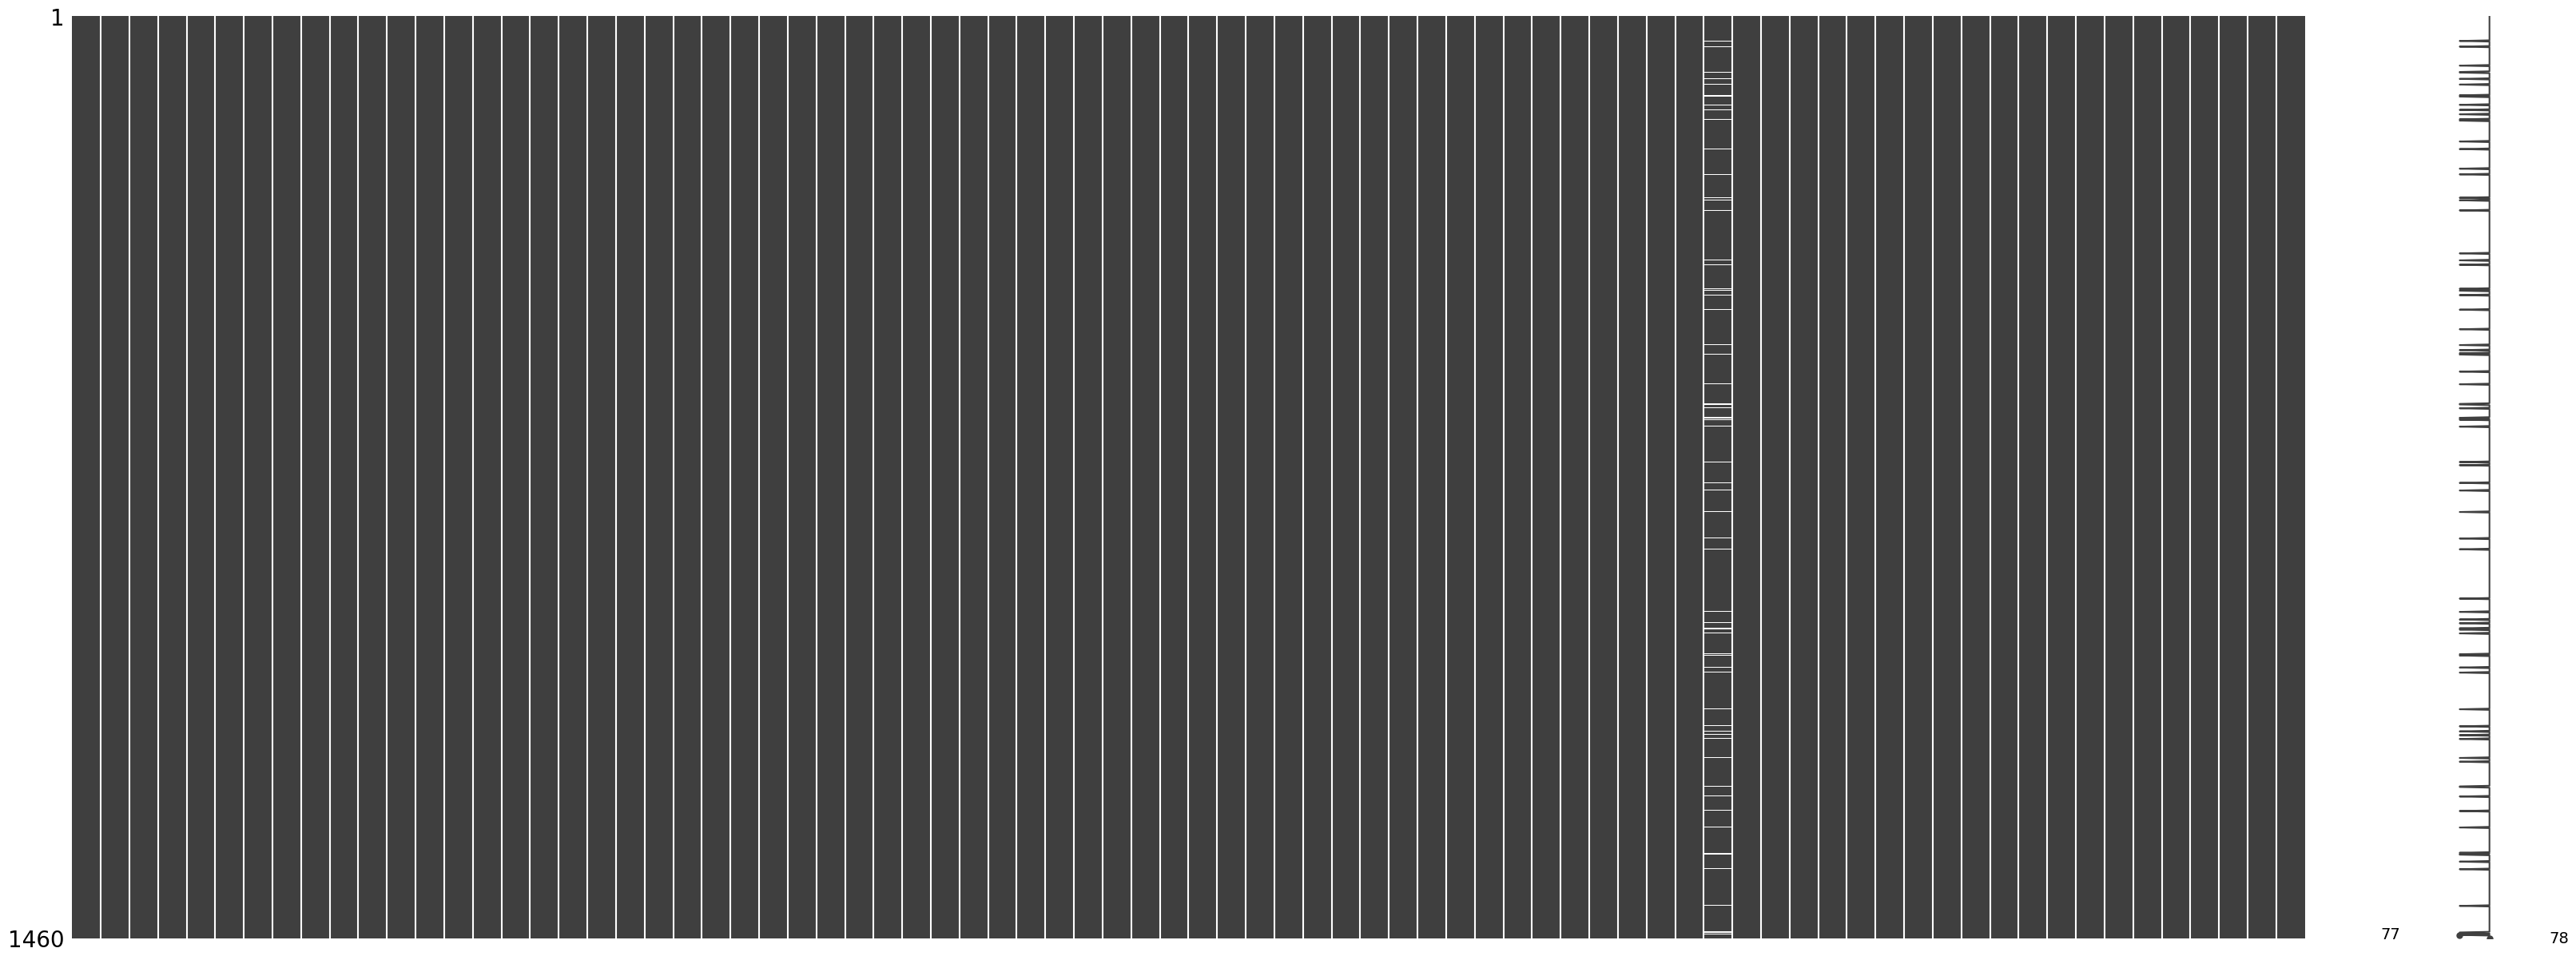

In [29]:
## visualisation des Valeurs manquantes
msno.matrix(data_h, figsize=(40, 15));

In [30]:
# Calcul du taux de valeurs manquantes pour chaque variable
missing_percentage = (data_h.isnull().sum() / len(data_h)) * 100

# Créez un DataFrame pour stocker le taux de valeurs manquantes
missing_data = pd.DataFrame({'Variable': data_h.columns, 'MissingPercentage': missing_percentage})

# Triez le DataFrame en fonction du taux de valeurs manquantes
missing_data = missing_data.sort_values(by='MissingPercentage', ascending=False)

missing_data.head(3)

Variable  MissingPercentage
GarageYrBlt    GarageYrBlt           5.547945
BedroomAbvGr  BedroomAbvGr           0.000000
GarageType      GarageType           0.000000

<p style="text-align:justify;font-family:times;font-size:15px">Le nétoyage a bien marché comme on peut le voir. En effet, il n'y a que la variable GarageYrBlt qui comporte encore des NA. Faisons une sauvegarde de cette base nétoyée avant de continuer.</p>

In [31]:
# sauveguarde du jeu de données sous foemat csv 
data_h.to_csv(Path(DATA_DIR, 'data_clean.csv'), index=False)


<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 Détection et gestion des valeurs abérantes </h2>
</div>

<p style="text-align:justify;font-family:times;font-size:15px">A présent, Nous allons explorer les variables quantitatives pour s'assurer qu'elles ne contienent pas de données incohérentes comme des valeurs négatives non expliquées ou des outliers.</p>

<p style="text-align:justify;font-family:times;font-size:15px">Par ailleurs Nous feront si possible des croisement entre les différentes variables pour déceller les imcopatibilités de réponses s'il y en a.</p>

In [32]:
# description générale des données 
data_h.describe(include = "all")

MSSubClass MSZoning  LotFrontage        LotArea Street LotShape  \
count   1460.000000     1460  1460.000000    1460.000000   1460     1460   
unique          NaN        5          NaN            NaN      2        4   
top             NaN       RL          NaN            NaN   Pave      Reg   
freq            NaN     1151          NaN            NaN   1454      925   
mean      56.897260      NaN    69.863699   10516.828082    NaN      NaN   
std       42.300571      NaN    22.027677    9981.264932    NaN      NaN   
min       20.000000      NaN    21.000000    1300.000000    NaN      NaN   
25%       20.000000      NaN    60.000000    7553.500000    NaN      NaN   
50%       50.000000      NaN    69.000000    9478.500000    NaN      NaN   
75%       70.000000      NaN    79.000000   11601.500000    NaN      NaN   
max      190.000000      NaN   313.000000  215245.000000    NaN      NaN   

       LandContour Utilities LotConfig LandSlope  ...  ScreenPorch  \
count         1460      1460      1460      1460  ...  1460.000000   
unique           4         2         5         3  ...          NaN   
top            Lvl    AllPub    Inside       Gtl  ...          NaN   
freq          1311      1459      1052      1382  ...          NaN   
mean           NaN       NaN       NaN       NaN  ...    15.060959   
std            NaN       NaN       NaN       NaN  ...    55.757415   
min            NaN       NaN       NaN       NaN  ...     0.000000   
25%            NaN       NaN       NaN       NaN  ...     0.000000   
50%            NaN       NaN       NaN       NaN  ...     0.000000   
75%            NaN       NaN       NaN       NaN  ...     0.000000   
max            NaN       NaN       NaN       NaN  ...   480.000000   

           PoolArea    Fence       MiscVal       MoSold       YrSold  \
count   1460.000000     1460   1460.000000  1460.000000  1460.000000   
unique          NaN        5           NaN          NaN          NaN   
top             NaN  Nofence           NaN          NaN          NaN   
freq            NaN     1179           NaN          NaN          NaN   
mean       2.758904      NaN     43.489041     6.321918  2007.815753   
std       40.177307      NaN    496.123024     2.703626     1.328095   
min        0.000000      NaN      0.000000     1.000000  2006.000000   
25%        0.000000      NaN      0.000000     5.000000  2007.000000   
50%        0.000000      NaN      0.000000     6.000000  2008.000000   
75%        0.000000      NaN      0.000000     8.000000  2009.000000   
max      738.000000      NaN  15500.000000    12.000000  2010.000000   

        SaleType  SaleCondition      SalePrice         Pool  
count       1460           1460    1460.000000  1460.000000  
unique         9              6            NaN          NaN  
top           WD         Normal            NaN          NaN  
freq        1267           1198            NaN          NaN  
mean         NaN            NaN  180921.195890     0.004795  
std          NaN            NaN   79442.502883     0.069100  
min          NaN            NaN   34900.000000     0.000000  
25%          NaN            NaN  129975.000000     0.000000  
50%          NaN            NaN  163000.000000     0.000000  
75%          NaN            NaN  214000.000000     0.000000  
max          NaN            NaN  755000.000000     1.000000  

[11 rows x 78 columns]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3.1 Détection des valeurs négatives </h3>
</div>

In [33]:
# Affichage du minimum des variables quantitatives
description = data_h.describe()  # 'all' inclut les variables quantitatives et qualitatives
min_values = description.loc['min']

# Afficher les valeurs minimales
print(min_values)


MSSubClass          20.0
LotFrontage         21.0
LotArea           1300.0
OverallQual          1.0
OverallCond          1.0
YearBuilt         1872.0
YearRemodAdd      1950.0
MasVnrArea           0.0
BsmtFinSF1           0.0
BsmtFinSF2           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
1stFlrSF           334.0
2ndFlrSF             0.0
LowQualFinSF         0.0
GrLivArea          334.0
BsmtFullBath         0.0
BsmtHalfBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenAbvGr         0.0
TotRmsAbvGrd         2.0
Fireplaces           0.0
GarageYrBlt       1900.0
GarageCars           0.0
GarageArea           0.0
WoodDeckSF           0.0
OpenPorchSF          0.0
EnclosedPorch        0.0
3SsnPorch            0.0
ScreenPorch          0.0
PoolArea             0.0
MiscVal              0.0
MoSold               1.0
YrSold            2006.0
SalePrice        34900.0
Pool                 0.0
Name: min, dtype: float64


<p style="text-align:justify;font-family:times;font-size:15px"> Il n'y a aucunes valeurs négatives et les valeurs nulles sont justifiées car il s'agit tentôt du nombre de certaines fonctionalités inexistantes soit de la superficie de choses (exemple garage) inexistantes</p>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3.2 Détection des outliers </h3>
</div>

<p style="text-align:justify;font-family:times;font-size:15px">Pour la détermination des outliers, vous allons utiliser le principe de l'intervalle interquartile. Soit IQR l'intervalle interquartile, on considèrera comme outliers, les prix inférieur à Q1 - (IQR*1,5) ou supérieur à Q3 + (IQR*1,5). Ecrivons une fonction qui détermine si une valeur est outlier ou pas.</p> 

In [34]:
# une fonction qui détermine si une valeur est outlier ou pas en se basant sur l'intervalle interquartile
import numpy as np

def outlier(x, vecteur):
    """
    Détermine si une valeur est un outlier en se basant sur l'intervalle interquartile (IQR).

    Parameters:
    - x (float): La valeur à tester.
    - vecteur (list): Le vecteur de données sur lequel baser le calcul de l'IQR.

    Returns:
    - str: 'is_outlier' si la valeur est un outlier, 'not_outlier' sinon.
    """

    # Determiner l'intervalle interquartile
    quartiles = np.percentile(vecteur, [25, 75])
    IQR = quartiles[1] - quartiles[0]
    
    # Borne inférieure et supérieure
    borne_inf = quartiles[0] - 1.5 * IQR
    borne_sup = quartiles[1] + 1.5 * IQR
    
    # Vérifier si la valeur est un outlier
    if x < borne_inf or x > borne_sup:
        return 'is_outlier'
    else:
        return 'not_outlier'



In [35]:
# Déterminons les outliers de chaque colonne
# Création d'un DataFrame pour stocker les résultats
outlier_df = pd.DataFrame()

# Appliquer la fonction outlier à chaque colonne du DataFrame original
df = data_h.select_dtypes(include=[np.number])
for colonne in df.columns:
    outlier_df[colonne + '_outlier'] = df[colonne].apply(lambda x: outlier(x, df[colonne]))


In [36]:
# Affichage des résultat : nombre d'outliers par colonne
summary = outlier_df.apply(lambda col: col.value_counts(normalize=True)).T
print(summary)


                       is_outlier  not_outlier
MSSubClass_outlier       0.070548     0.929452
LotFrontage_outlier      0.072603     0.927397
LotArea_outlier          0.047260     0.952740
OverallQual_outlier      0.001370     0.998630
OverallCond_outlier      0.085616     0.914384
YearBuilt_outlier        0.004795     0.995205
YearRemodAdd_outlier          NaN     1.000000
MasVnrArea_outlier       0.067123     0.932877
BsmtFinSF1_outlier       0.004795     0.995205
BsmtFinSF2_outlier       0.114384     0.885616
BsmtUnfSF_outlier        0.019863     0.980137
TotalBsmtSF_outlier      0.041781     0.958219
1stFlrSF_outlier         0.013699     0.986301
2ndFlrSF_outlier         0.001370     0.998630
LowQualFinSF_outlier     0.017808     0.982192
GrLivArea_outlier        0.021233     0.978767
BsmtFullBath_outlier     0.000685     0.999315
BsmtHalfBath_outlier     0.056164     0.943836
FullBath_outlier              NaN     1.000000
HalfBath_outlier              NaN     1.000000
BedroomAbvGr_

In [37]:
# afficher pour chaque variables, les observations identifiées comme outliers
# Création d'un dictionnaire pour stocker les outliers par colonne
outliers_par_colonne = {}

# Parcourir chaque colonne du DataFrame de résultats
for colonne in outlier_df.columns:
    # Extraire le nom de la colonne d'origine
    nom_colonne_origine = colonne.replace('_outlier', '')
    
    # Filtrer les lignes où la colonne correspond à 'is_outlier'
    outliers = df.loc[outlier_df[colonne] == 'is_outlier', nom_colonne_origine]
    
    # Ajouter les résultats au dictionnaire
    outliers_par_colonne[colonne] = {'nom_variable': nom_colonne_origine, 'valeurs_outliers': outliers.tolist()}

# Afficher les valeurs identifiées comme outliers par colonne
for colonne, valeurs_outliers in outliers_par_colonne.items():
    print(f"Colonne '{valeurs_outliers['nom_variable']}' - Valeurs identifiées comme outliers:")
    print(valeurs_outliers['valeurs_outliers'])
    print("\n")


Colonne 'MSSubClass' - Valeurs identifiées comme outliers:
[190, 190, 160, 180, 160, 190, 160, 190, 160, 190, 160, 160, 160, 160, 160, 160, 160, 160, 160, 190, 160, 190, 190, 190, 190, 160, 160, 160, 190, 160, 160, 180, 180, 190, 180, 160, 160, 160, 190, 190, 160, 160, 160, 180, 160, 190, 190, 180, 160, 160, 160, 160, 190, 190, 190, 160, 160, 160, 160, 160, 190, 160, 160, 160, 160, 160, 190, 160, 160, 190, 160, 160, 190, 160, 180, 190, 160, 160, 160, 160, 160, 190, 160, 160, 190, 190, 160, 160, 160, 160, 190, 160, 180, 160, 160, 160, 160, 160, 160, 190, 190, 180, 180]


Colonne 'LotFrontage' - Valeurs identifiées comme outliers:
[110.0, 108.0, 112.0, 115.0, 110.0, 24.0, 21.0, 121.0, 122.0, 24.0, 120.0, 134.0, 110.0, 141.0, 24.0, 24.0, 174.0, 21.0, 21.0, 174.0, 21.0, 21.0, 120.0, 30.0, 129.0, 140.0, 120.0, 118.0, 116.0, 150.0, 111.0, 21.0, 109.0, 130.0, 21.0, 24.0, 21.0, 137.0, 110.0, 21.0, 21.0, 24.0, 130.0, 24.0, 30.0, 21.0, 21.0, 21.0, 120.0, 110.0, 24.0, 24.0, 30.0, 110.0, 144.0, 11

<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3.2.1 Outliers de MSSubClass</h4>

<p style="text-align:justify;font-family:times;font-size:15px">On peut remarquer que la variable "MSSubClass" est en réalité une variables qualitative recodée et les valeurs identifiées comme outliers sont des valeurs qui ont du sens. Par ailleurs avec le recodage effectué les modalités sont assez distantes (20, 30, ... 90, 120, 150, 160, 180,190) ce qui pourrait justifier que les valeurs extrêùes comme 160, 180, 190 soient trop détachées des autres et identifiées comme outliers. Procédons à un recodage.</p>

In [38]:
# recodage de  MSSubClass
# définition des nouvelle valeurs
etiquettes = {20: 1,
                   30: 2,
                   40: 3,
                   45: 3.5,
                   50: 4,
                   60: 5,
                   70: 6,
                   75: 6.5,
                   80: 7,
                   85: 7.5,
                   90: 8,
                   120: 9,
                   150: 10,
                   160: 11,
                   180: 12,
                   190: 13,
                  }

# recodage
data_h["MSSubClass"] = data_h["MSSubClass"].map(etiquettes)

<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3.2.2 Outliers des autres variables</h4>

<p style="text-align:justify;font-family:times;font-size:15px">De même que pour la variable MSSubClass, En regardant la description des autres variables, on voit que les outliers peuvent être justifiés. Par exemple, on voit que pour la variable YearBuilt (année de construction), il arrive qu'on ait de vieux batiments encore habitables. Compte tenu de cela et de la faible proportion d'outliers, nous préférons garder ces valeurs.</p>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3.3 Détection des imcompatibilitéss de réponse </h3>
</div>

<p style="text-align:justify;font-family:times;font-size:15px">Il y a dans la base des variables qui permettent de vérifier la cohérence des observations d'une autre. Ce sont ces groupes de variables que nous allons essayer d'explorer dans cette partie pour s'assurer de la qualité des données.</p>

<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3.3.1 Cohérence entre les années</h4>

<p style="text-align:justify;font-family:times;font-size:15px">Les variables qui nous intéressent dans cette partie sont : 
<ul style="text-align:justify;font-family:times;font-size:15px">
<li>YearBuilt : Date de construction initiale</li>
<li>YearRemodAdd : Date de remodelage (identique à la date de construction s'il n'y a pas de remodelage ou d'ajouts)</li>
<li>GarageYrBlt : Année de construction du garage</li>
<li>YrSold : Année de vente (AAAA)</li>
</ul>   
</p>

<p style="text-align:justify;font-family:times;font-size:15px">Les contrôles qui nous intéressent sont les suivant : </p>

<ul style="text-align:justify;font-family:times;font-size:15px">
<li>Les années de remodelage, de construction du garage et de vente doivent toujours être supérieures à l'année de construiction;</li>
<li>L'année de vente doit être supérieure à toutes les autres</li>
</ul>  

In [39]:
# Contrôle 1: Les années de remodelage, de construction du garage et de vente doivent toujours être supérieures à l'année de construction
coherence_1 = (data_h['YearRemodAdd'] >= data_h['YearBuilt']) & (data_h['GarageYrBlt'] >= data_h['YearBuilt']) & (data_h['YrSold'] >= data_h['YearBuilt'])

# Contrôle 2: L'année de vente doit être supérieure à toutes les autres
coherence_2 = (data_h['YrSold'] >= data_h['YearBuilt']) & (data_h['YrSold'] >= data_h['YearRemodAdd']) & (data_h['YrSold'] >= data_h['GarageYrBlt'])

# Afficher les lignes qui ne satisfont pas aux contrôles
incoherences = data_h[~(coherence_1 & coherence_2)]

# Afficher les lignes qui ne satisfont pas aux contrôles
print("Lignes ne satisfaisant pas aux contrôles de cohérence:")
print(incoherences[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']])

Lignes ne satisfaisant pas aux contrôles de cohérence:
      YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
29         1927          1950       1920.0    2008
39         1955          1955          NaN    2008
48         1920          2008          NaN    2009
78         1968          1968          NaN    2010
88         1915          1982          NaN    2009
...         ...           ...          ...     ...
1414       1923          2000       1922.0    2008
1418       1963          1963       1962.0    2008
1449       1970          1970          NaN    2006
1450       1974          1974          NaN    2009
1453       2006          2006          NaN    2006

[91 rows x 4 columns]


<p style="text-align:justify;font-family:times;font-size:15px">Les incohérences résident surtout au niveau de l'année de construiction du garage. Il semble peu cohérent de construire le garage d'une maison avant la maison. Nous allons donc remplcer ces valeurs d'année de construiction du garage lorqu'elles ne sont pas des NA (pour dire qu'il n'y a pas de garage) par l'année de construiction de la maison. </p>

In [40]:
# Remplacer les valeurs non manquantes de GarageYrBlt par YearBuilt lorsque GarageYrBlt est inférieur à YearBuilt
data_h.loc[data_h['GarageYrBlt'].notna() & (data_h['GarageYrBlt'] < data_h['YearBuilt']), 'GarageYrBlt'] = data_h['YearBuilt']

# verification de la correction
# Contrôle 1: Les années de remodelage, de construction du garage et de vente doivent toujours être supérieures à l'année de construction
coherence_1 = (data_h['YearRemodAdd'] >= data_h['YearBuilt']) & (data_h['GarageYrBlt'] >= data_h['YearBuilt']) & (data_h['YrSold'] >= data_h['YearBuilt'])

# Contrôle 2: L'année de vente doit être supérieure à toutes les autres
coherence_2 = (data_h['YrSold'] >= data_h['YearBuilt']) & (data_h['YrSold'] >= data_h['YearRemodAdd']) & (data_h['YrSold'] >= data_h['GarageYrBlt'])

# Afficher les lignes qui ne satisfont pas aux contrôles
incoherences = data_h[~(coherence_1 & coherence_2)]

# Afficher les lignes qui ne satisfont pas aux contrôles
print("Lignes ne satisfaisant pas aux contrôles de cohérence:")
print(incoherences[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']])

Lignes ne satisfaisant pas aux contrôles de cohérence:
      YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
39         1955          1955          NaN    2008
48         1920          2008          NaN    2009
78         1968          1968          NaN    2010
88         1915          1982          NaN    2009
89         1994          1995          NaN    2007
...         ...           ...          ...     ...
1349       1872          1987          NaN    2008
1407       1985          1985          NaN    2009
1449       1970          1970          NaN    2006
1450       1974          1974          NaN    2009
1453       2006          2006          NaN    2006

[82 rows x 4 columns]


<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3.3.2 Cohérence entre la surface du garage et l'existance d'un garage </h4>

<p style="text-align:justify;font-family:times;font-size:15px">Les variables qui nous intéressent dans cette partie sont :</p> 

- <p style="text-align:justify;font-family:times;font-size:15px">GarageYrBlt : Année de construction du garage (NA s'il n'y a pas de garage)</p>
- <p style="text-align:justify;font-family:times;font-size:15px">GarageCars : Taille du garage en fonction de la capacité en voitures</p>
- <p style="text-align:justify;font-family:times;font-size:15px">GarageArea : Taille du garage en pieds carrés </p>

<p style="text-align:justify;font-family:times;font-size:15px">Il existe certaines maisons sans garage. Pour de telle maison, la surface du garage doit être nulle.</p>

In [41]:
# Sélectionner les lignes où GarageYrBlt est manquante et GarageCars n'est pas nulle
incoherence_garage = data_h[(data_h['GarageYrBlt'].isna()) & (data_h['GarageCars'] != 0)]

# Afficher les résultats
print(incoherence_garage[['GarageYrBlt', 'GarageCars']])


Empty DataFrame
Columns: [GarageYrBlt, GarageCars]
Index: []


In [42]:
# Sélectionner les lignes où GarageYrBlt est manquante et GarageArea n'est pas nulle
incoherence_garage = data_h[(data_h['GarageYrBlt'].isna()) & (data_h['GarageArea'] != 0)]

# Afficher les résultats
print(incoherence_garage[['GarageYrBlt', 'GarageArea']])

Empty DataFrame
Columns: [GarageYrBlt, GarageArea]
Index: []


<p style="text-align:justify;font-family:times;font-size:15px">Il n'y a aucunes incohérence à ce niveau.</p>

<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3.3.3 Cohérence entre la surface de la piscine et l'existance d'une piscine </h4>

<p style="text-align:justify;font-family:times;font-size:15px">Les variables qui nous intéressent dans cette partie sont :</p> 

- <p style="text-align:justify;font-family:times;font-size:15px">Pool : existance ou non d'une piscine</p>
- <p style="text-align:justify;font-family:times;font-size:15px">PoolArea : Taille de le piscine en pieds carrés </p>

<p style="text-align:justify;font-family:times;font-size:15px">Il existe certaines maisons sans piscine. Pour de telle maison, la surface de la piscine doit être nulle.</p>

In [43]:
# Sélectionner les lignes où GarageYrBlt est manquante et GarageArea n'est pas nulle
incoherence_pool = data_h[(data_h['Pool']==0) & (data_h['PoolArea'] != 0)]

# Afficher les résultats
print(incoherence_pool[['Pool', 'PoolArea']])

Empty DataFrame
Columns: [Pool, PoolArea]
Index: []


<p style="text-align:justify;font-family:times;font-size:15px">Il n'y a aucunes incohérence à ce niveau.</p>

<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3.3.4 Cohérence entre les surfaces du sous sol</h4>

<div style="text-align:justify;font-family:times;font-size:15px">Les variables qui nous intéressent dans cette partie sont : 

- BsmtFinSF1 : Pieds carrés finis de type 1
- BsmtFinSF2 : Pieds carrés finis de type 2
- BsmtUnfSF : Pieds carrés inachevés du sous-sol
- TotalBsmtSF : Superficie totale en pieds carrés du sous-sol

Le contrôle ici est de vérifier si la superficie totale est égale à somme des 3 autres superficies</div>

In [44]:
# Créer une nouvelle colonne représentant la somme des superficies BsmtFinSF1, BsmtFinSF2 et BsmtUnfSF
data_h['TotalBsmtSF_Calc'] = data_h['BsmtFinSF1'] + data_h['BsmtFinSF2'] + data_h['BsmtUnfSF']

# Sélectionner les lignes où la somme calculée diffère de la valeur dans TotalBsmtSF
incoherence_bsmt_sf = data_h[data_h['TotalBsmtSF_Calc'] != data_h['TotalBsmtSF']]

# Afficher le nombre de lignes qui ne satisfont pas au contrôle
print(incoherence_bsmt_sf.shape[0])


0


<div style="text-align:justify;font-family:times;font-size:15px">Il n'y a donc aucune incohérence</div>

In [45]:
# supprimer la variable de controle calculée
data_h = data_h.drop('TotalBsmtSF_Calc', axis=1)

<div style="text-align:justify;font-family:times;font-size:15px">Cette petite exploration des cohérence nous a permis de voir que certaines variables était très liées. Il sagit notament de : 

- GarageCars, GarageArea : nous allons supprimer GarageArea et garder GarageCars car cette variable est plus parlante ; 
- TotalBsmtSF, BsmtUnfSF, BsmtFinSF2, BsmtFinSF1 : Nous allons conserver TotalBsmtSF puisque c'est une combinaison des 3 autres; 
</div>

In [46]:
# Suppression des variables en "double"
data_h = data_h.drop(columns = ["GarageArea", "BsmtUnfSF", "BsmtFinSF2", "BsmtFinSF1"])

<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 3. Analyse descriptive </h1>
</div>

In [47]:
# division du jeux de données en variables explicatives et variable cible
X=data_h.drop(columns=['SalePrice']) # variables explicatives
Y=data_h['SalePrice'] # variables expliquée ou cible

# division du jeux de données des variables explicatives suivant variables catégorielles et variables numériques
## variables explicatives catégorielles
data_h_qual = X.select_dtypes(include=['object'])
data_h_qual.head(3)

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   

  Neighborhood Condition1 Condition2  ... Functional  FireplaceQu GarageType  \
0      CollgCr       Norm       Norm  ...        Typ  Nofireplace     Attchd   
1      Veenker      Feedr       Norm  ...        Typ           TA     Attchd   
2      CollgCr       Norm       Norm  ...        Typ           TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive    Fence SaleType  \
0          RFn         TA         TA          Y  Nofence       WD   
1          RFn         TA         TA          Y  Nofence       WD   
2          RFn         TA         TA          Y  Nofence       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  

[3 rows x 40 columns]

In [48]:
## variables explicatives quantitatives
data_h_quant=X.select_dtypes(include=['float64','int64'])
data_h_quant.head(3)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0         5.0         65.0     8450            7            5       2003   
1         1.0         80.0     9600            6            8       1976   
2         5.0         68.0    11250            7            5       2001   

   YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  ...  WoodDeckSF  \
0          2003       196.0          856       856  ...           0   
1          1976         0.0         1262      1262  ...         298   
2          2002       162.0          920       920  ...           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   

   MoSold  YrSold  Pool  
0       2    2008     0  
1       5    2007     0  
2       9    2008     0  

[3 rows x 33 columns]

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 Distribution du prix des propriétés </h2>
</div>

<Axes: xlabel='SalePrice', ylabel='Density'>

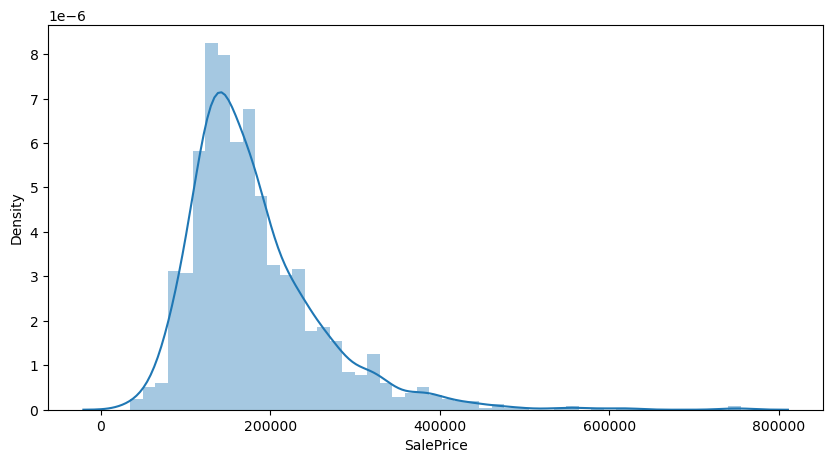

In [49]:
## visualization des variables cible = prix de vente des maisons

plt.figure(figsize=(10,5))
sb.distplot(Y)

<div style="text-align:justify;font-family:times;font-size:15px">
Cette distribution n'est pas normale, il faudra la normaliser en appliquant le logarithme juste avant la modélisation car cela présente assez d'avantages : 

- Certains algorithmes comme la régression linéaire, qui est un modèle couramment utilisé en régression, repose sur l'hypothèse que les résidus (erreurs de prédiction) suivent une distribution normale. 
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2 Analyse des correlations entre variables quantitatives </h2>
</div>

In [50]:
# variables numériques (explicatives + cible)
numeric_features = data_h.select_dtypes(include=[np.number]) 
numeric_features.dtypes 

MSSubClass       float64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
Pool               int64
dtype: object

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2.1 Nuage de points</h3>
</div>

<Figure size 2000x1000 with 0 Axes>

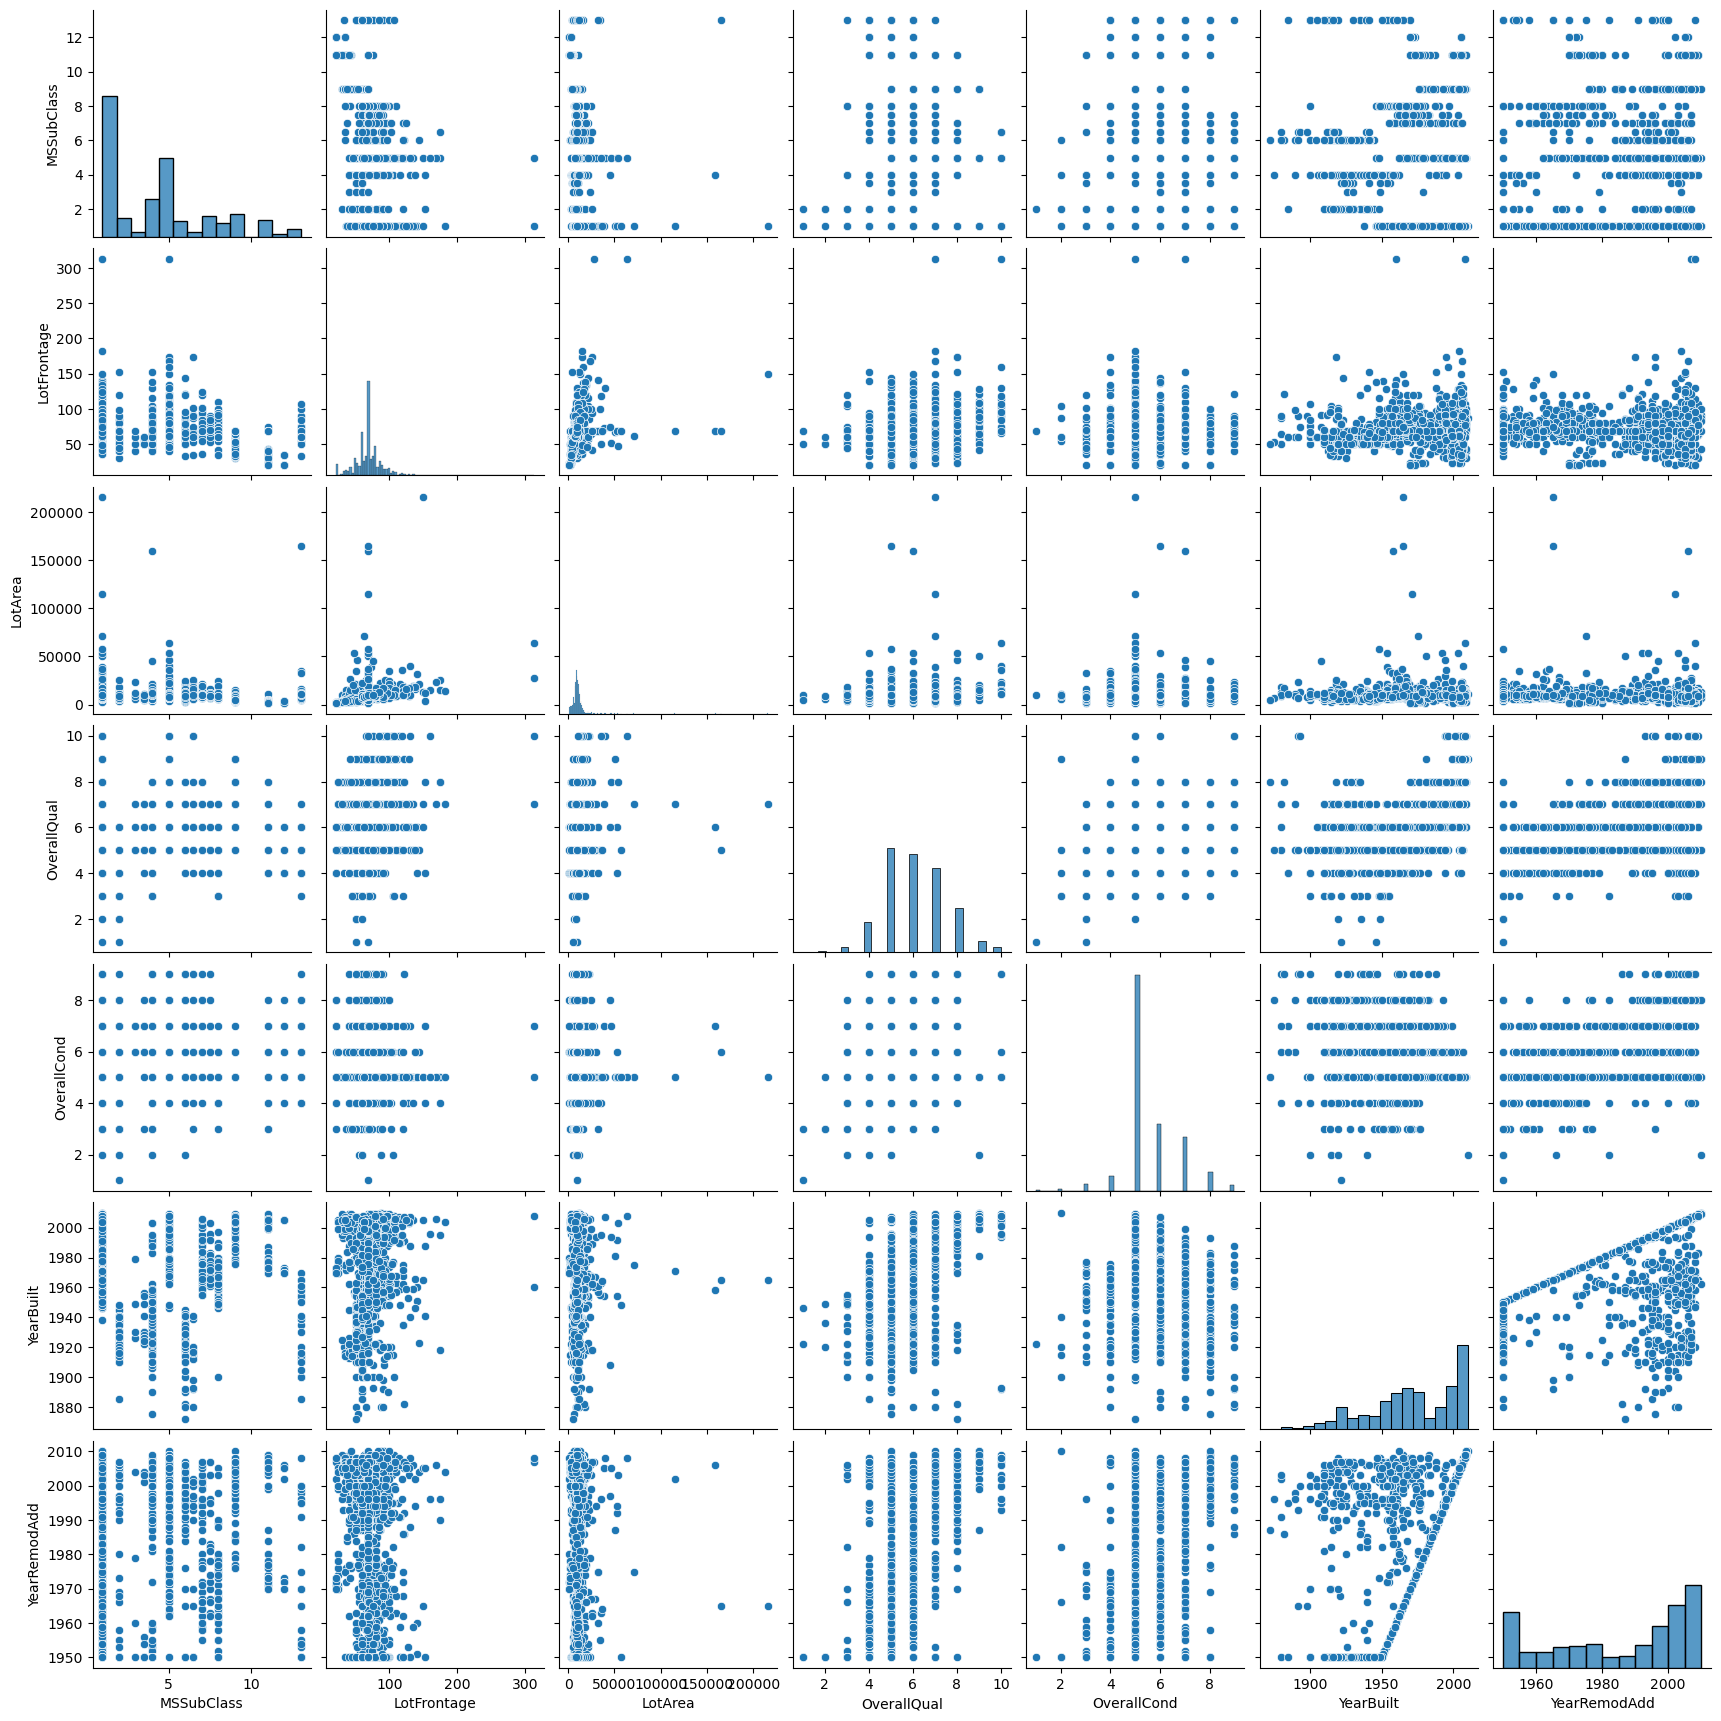

<Figure size 2000x1000 with 0 Axes>

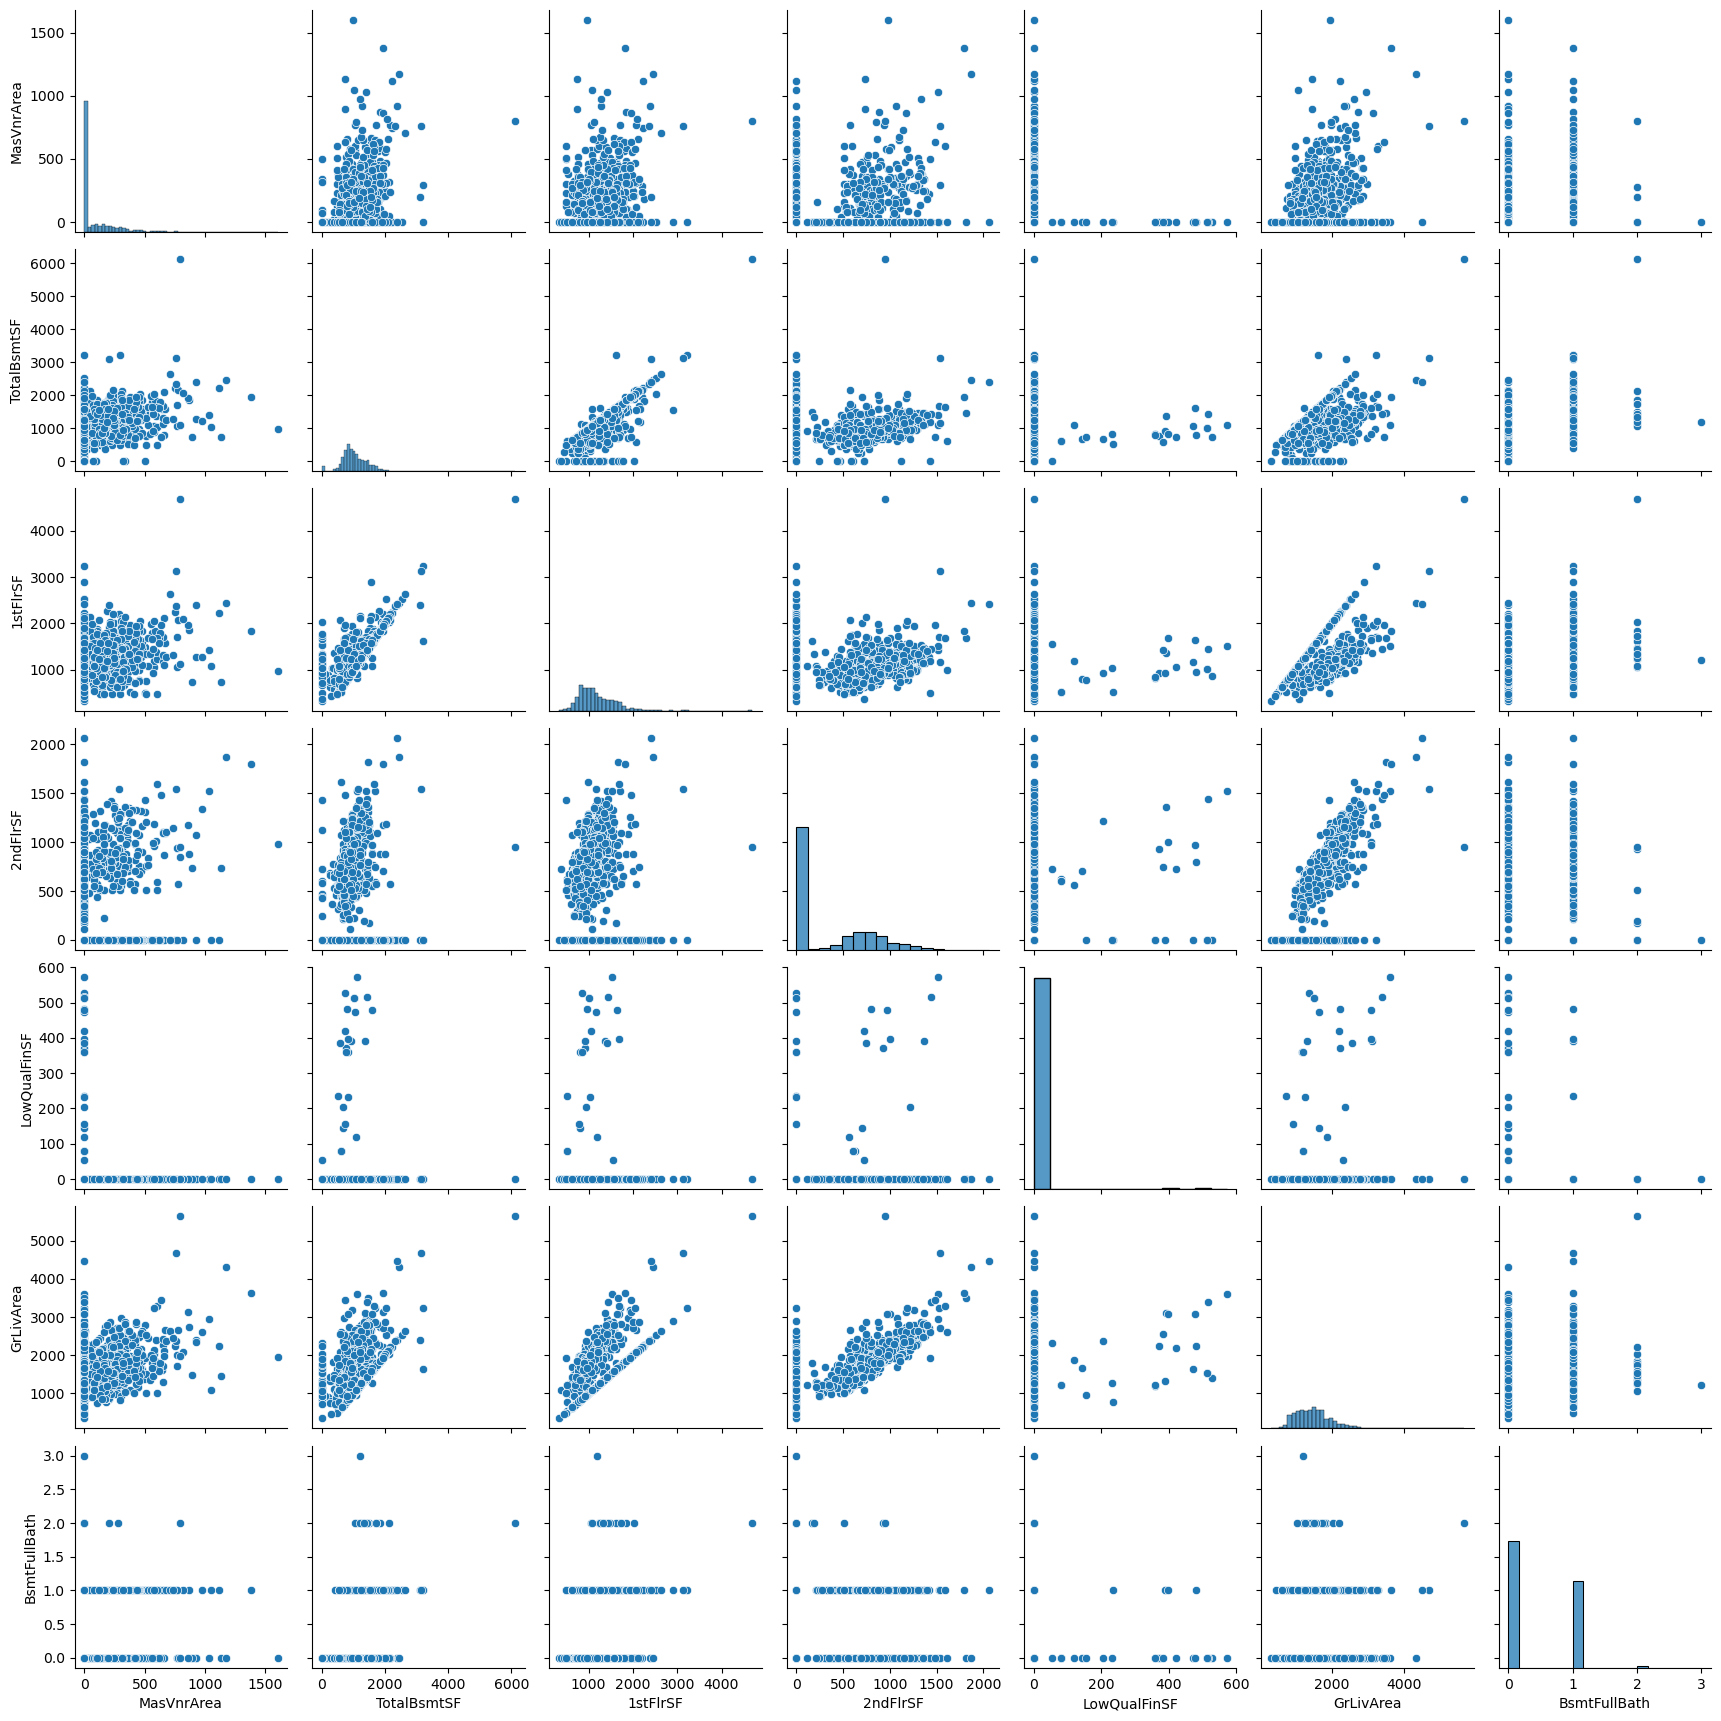

<Figure size 2000x1000 with 0 Axes>

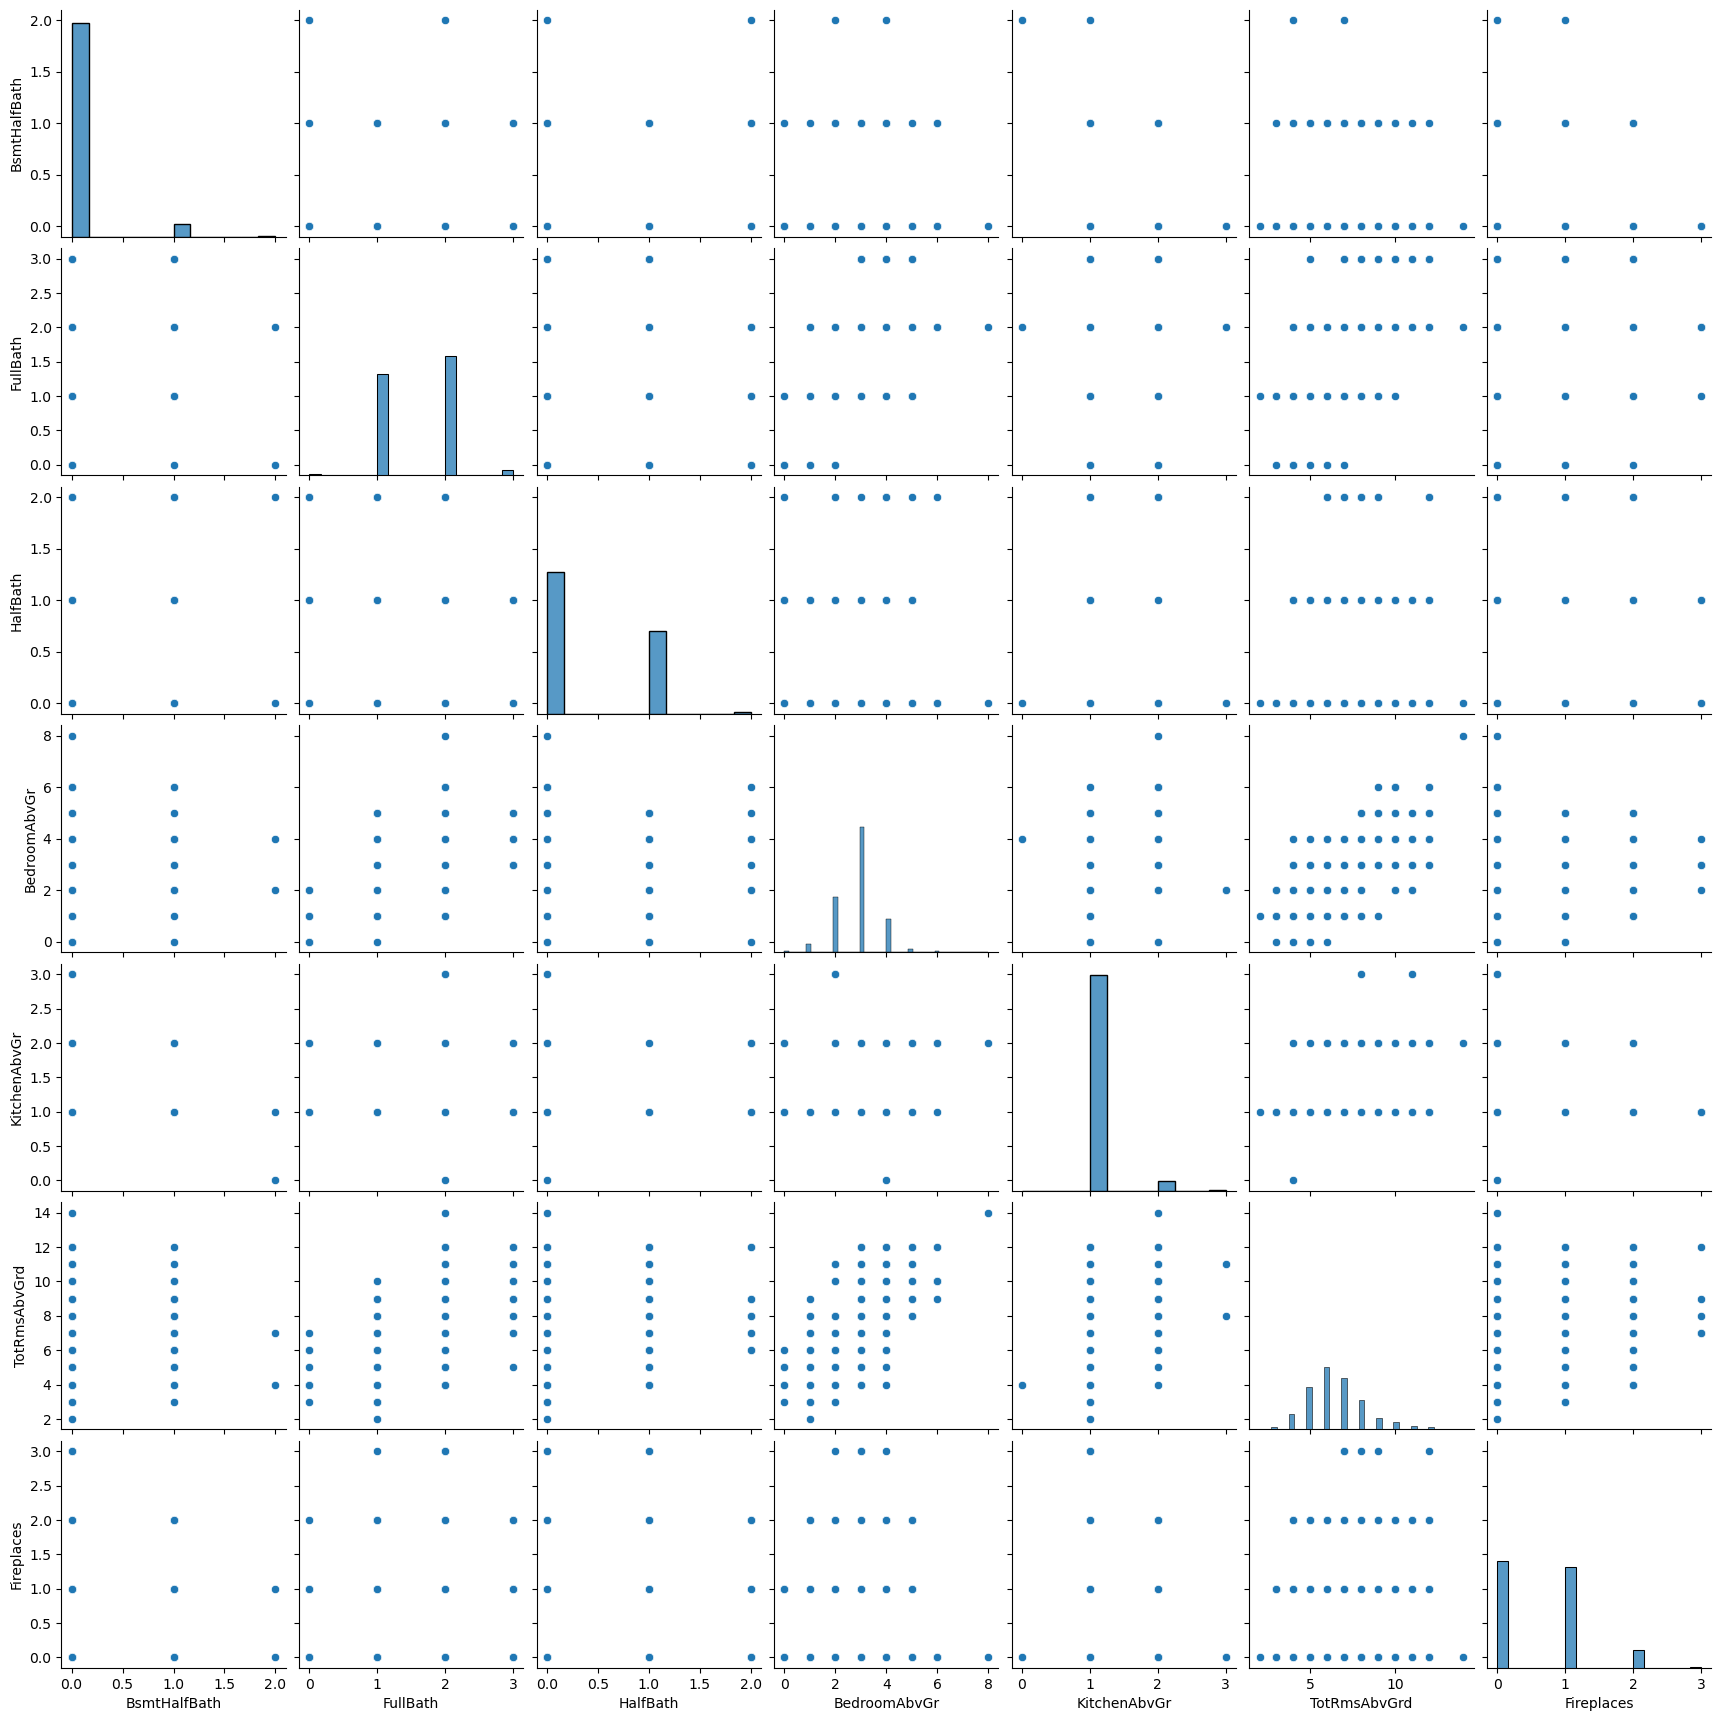

<Figure size 2000x1000 with 0 Axes>

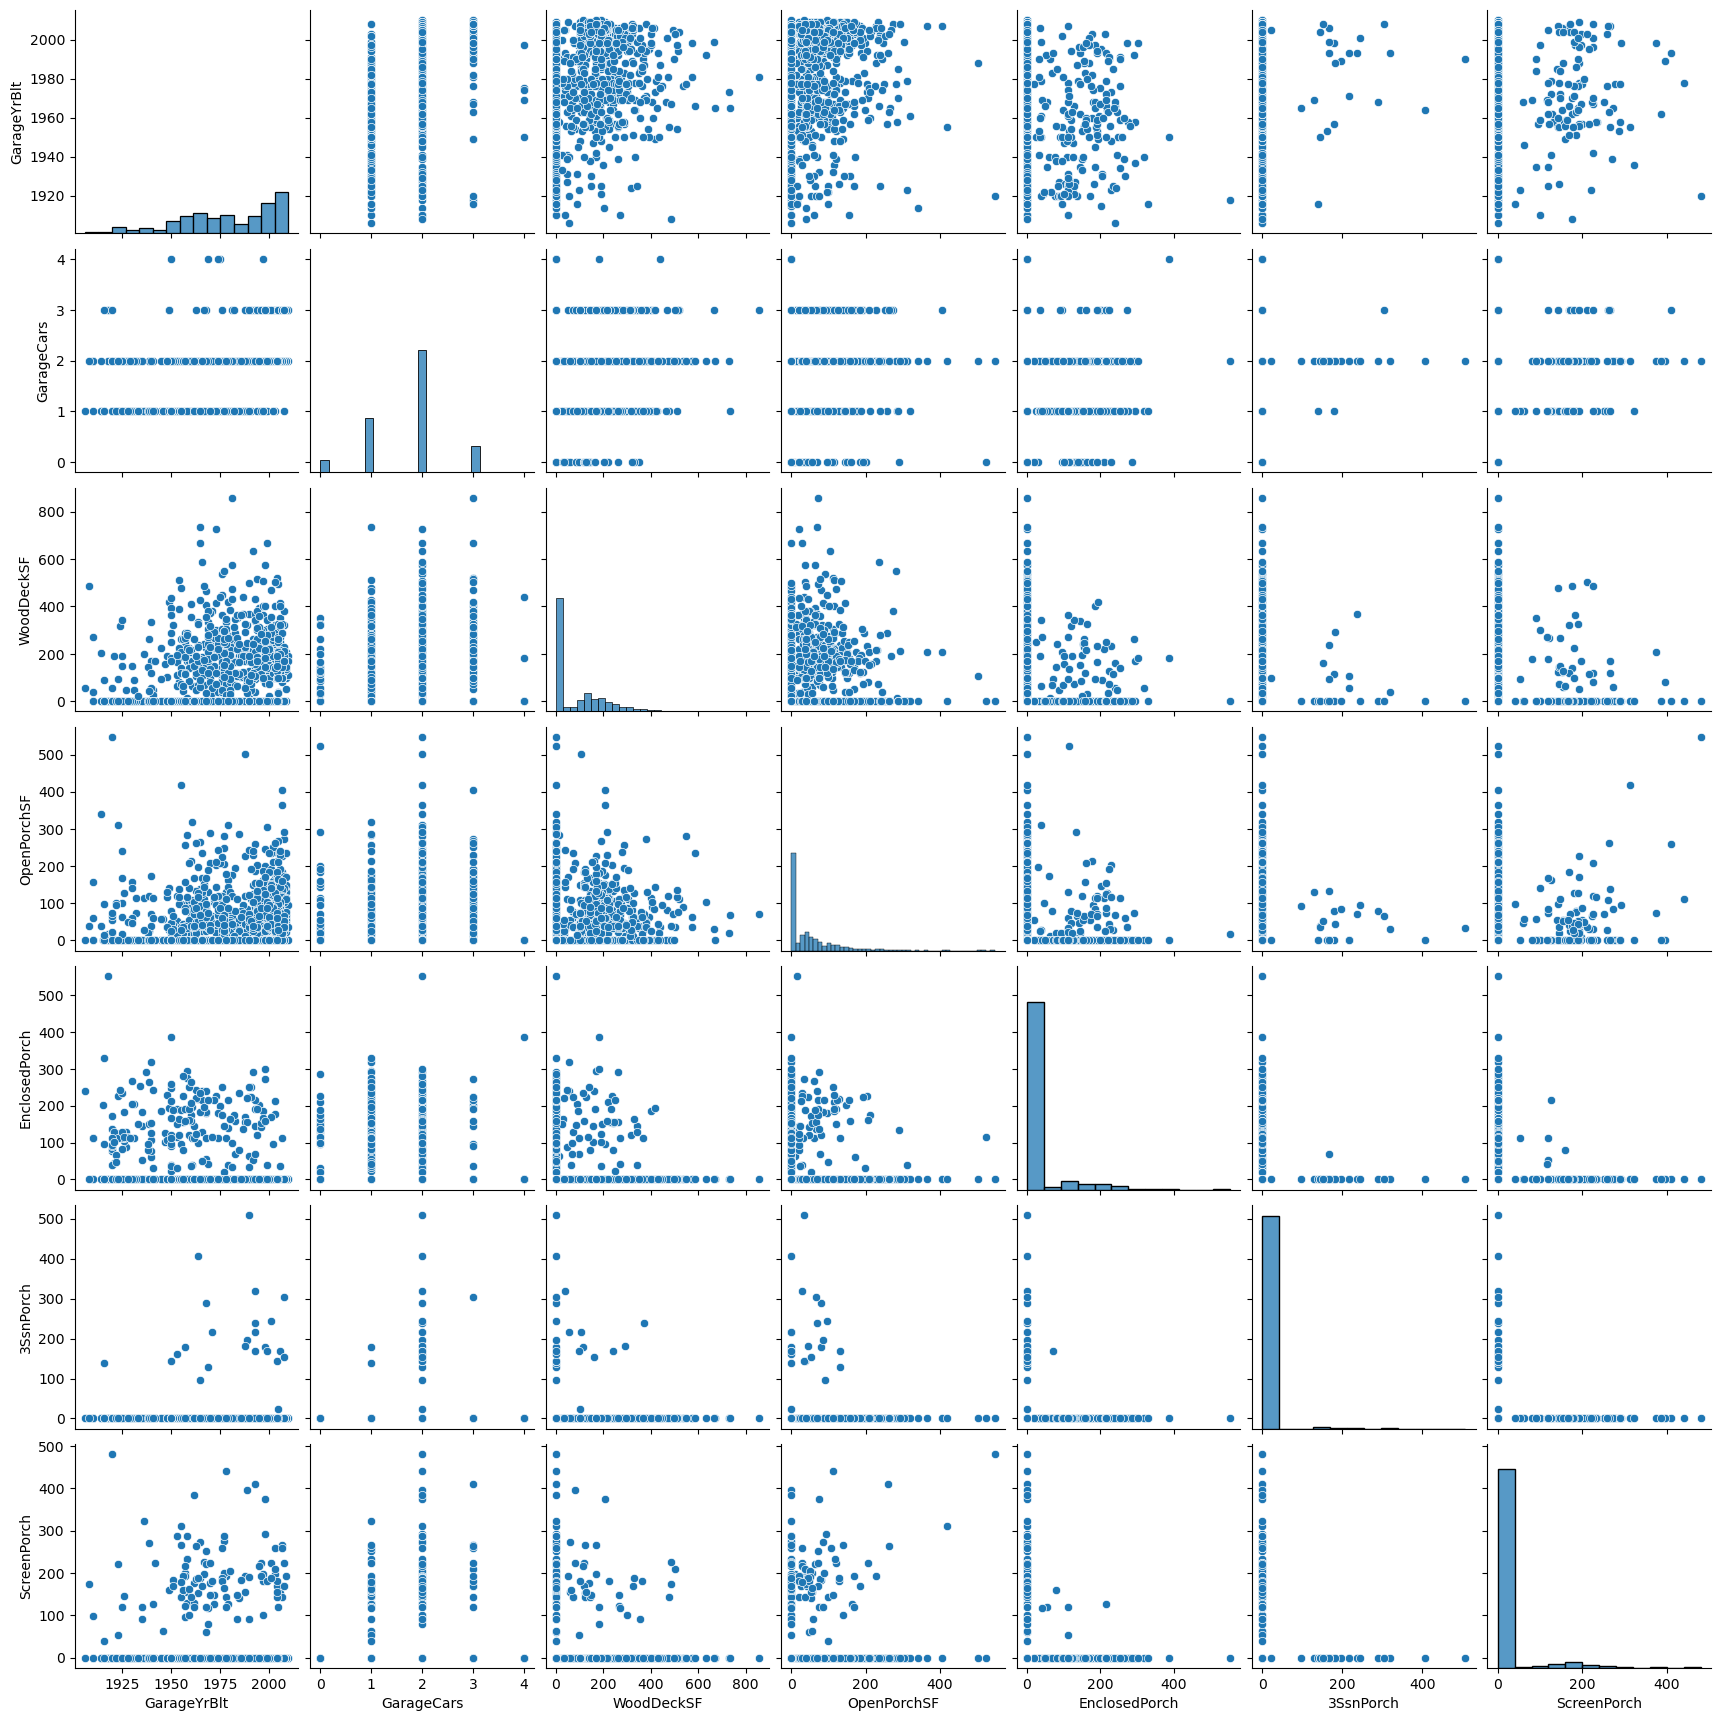

<Figure size 2000x1000 with 0 Axes>

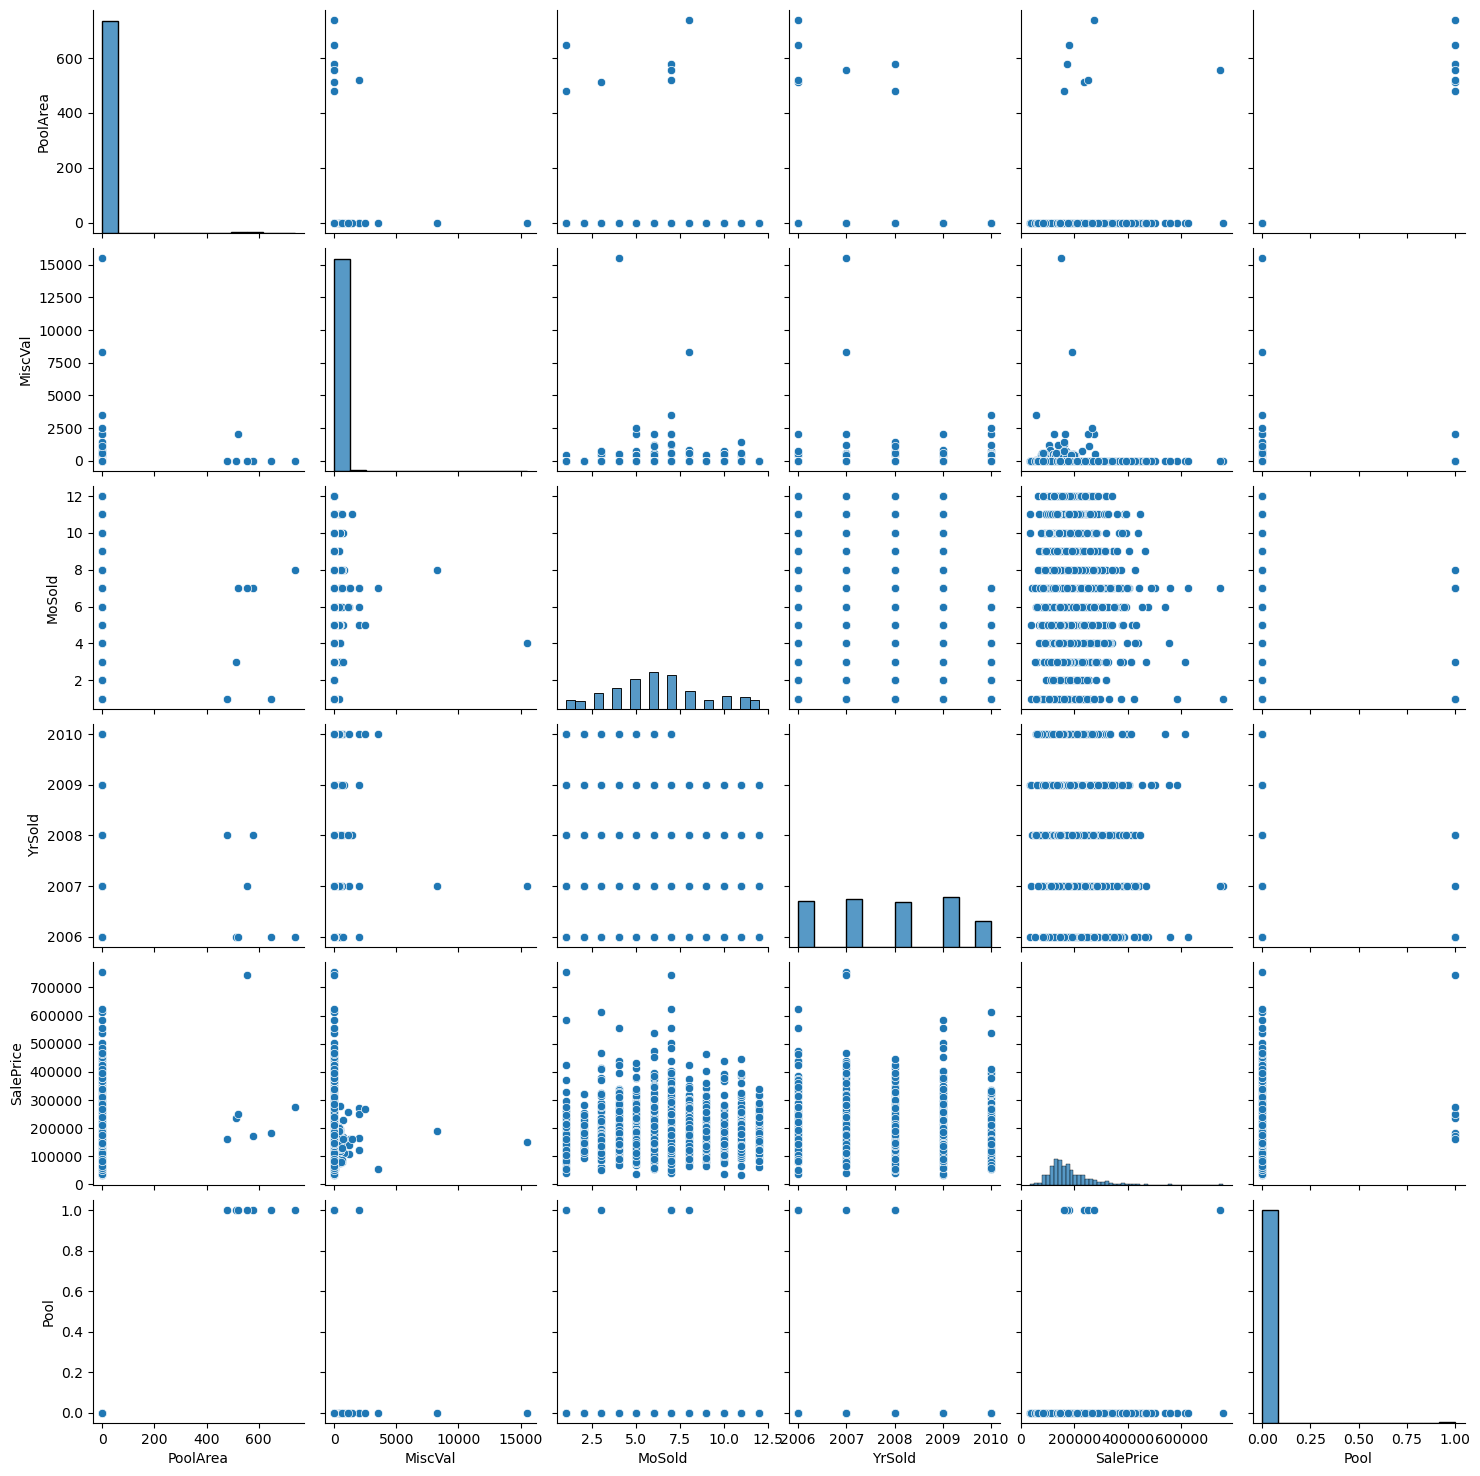

In [51]:
# Nuages de points deux à deux
#création d'un sous groupe de data frame avec des sous groupes de variable numérique
sous_groupes = [numeric_features.columns[i:i+7] for i in range(0, len(numeric_features.columns), 7)]

for groupe in sous_groupes:
    sous_dataframe = numeric_features[groupe]
    plt.figure(figsize=(20, 10))
    sb.pairplot(sous_dataframe)


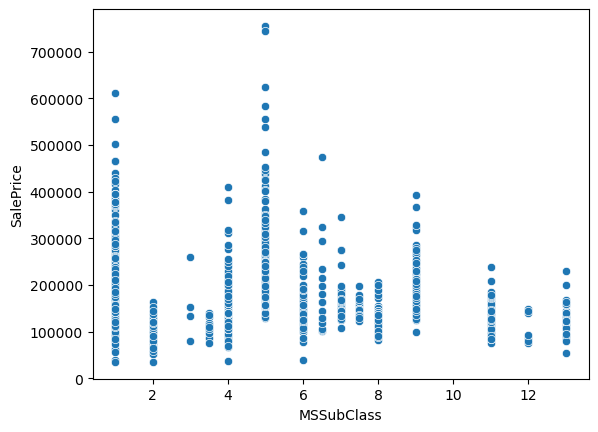

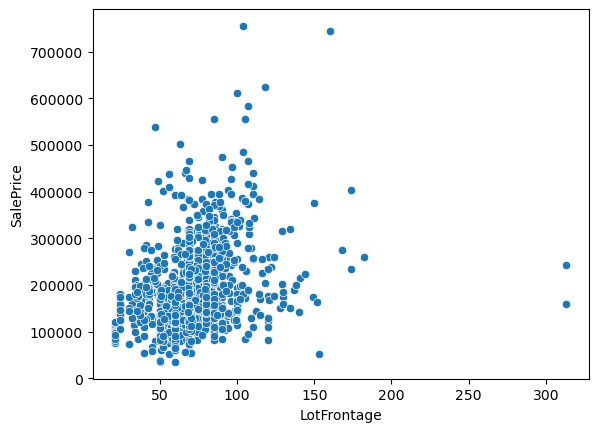

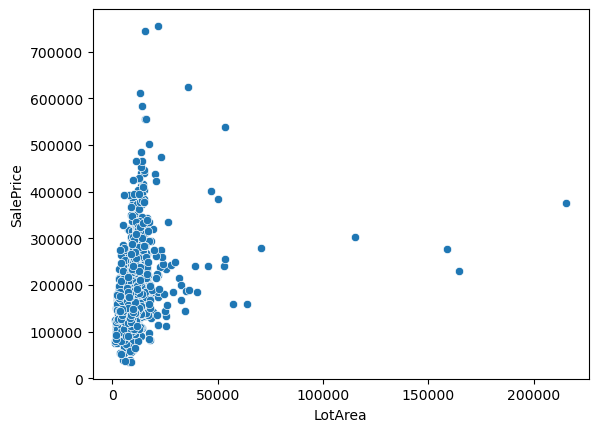

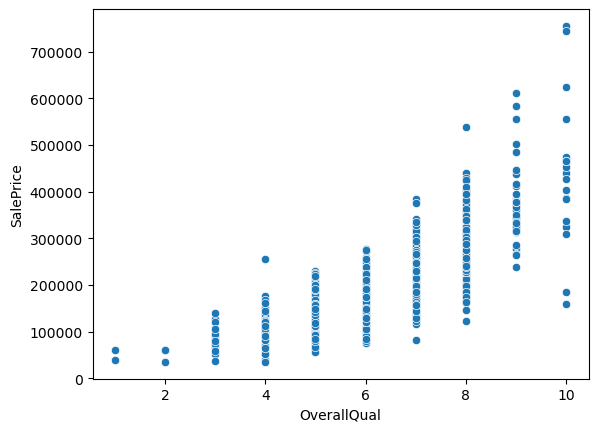

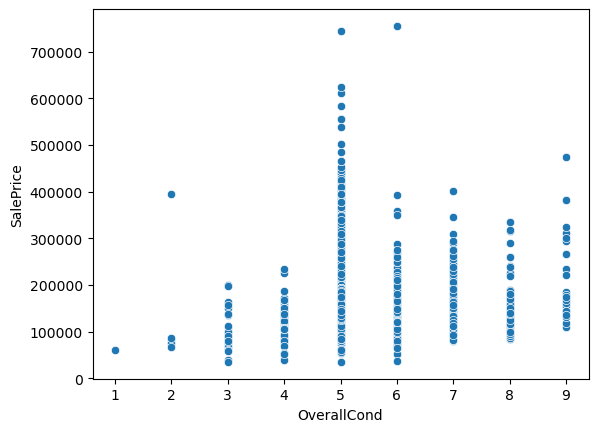

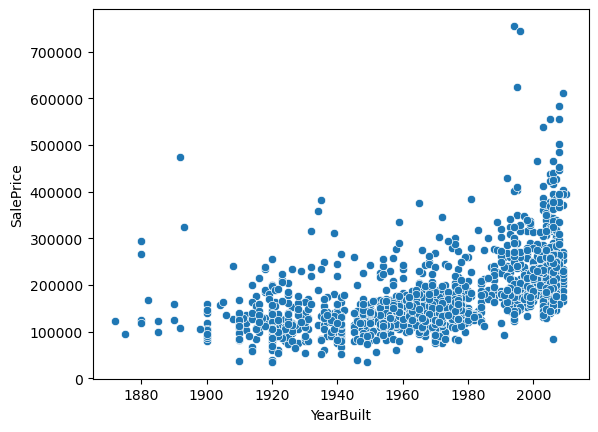

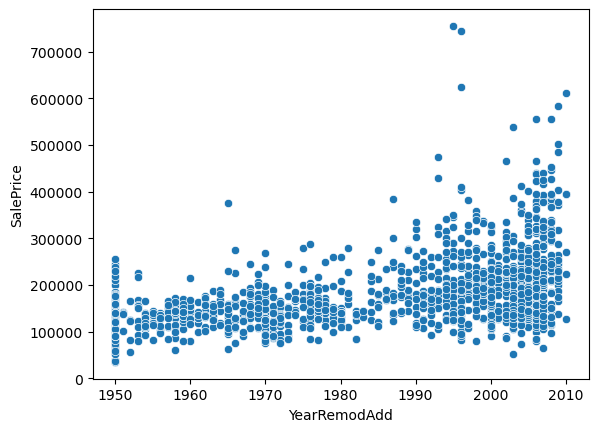

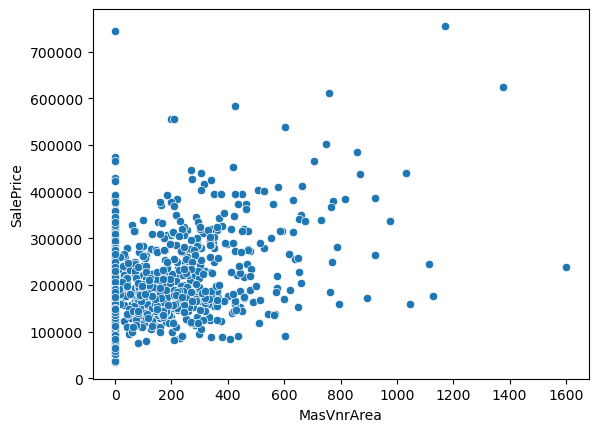

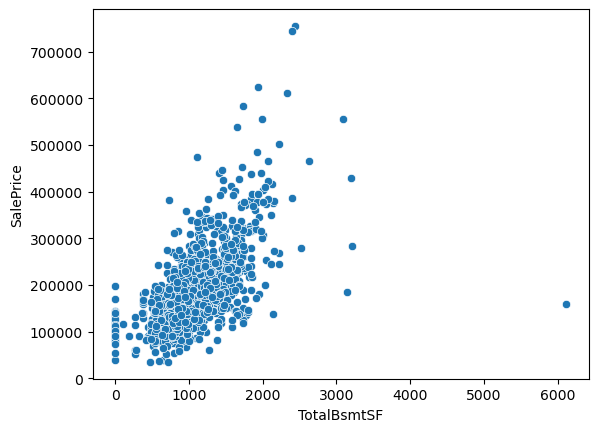

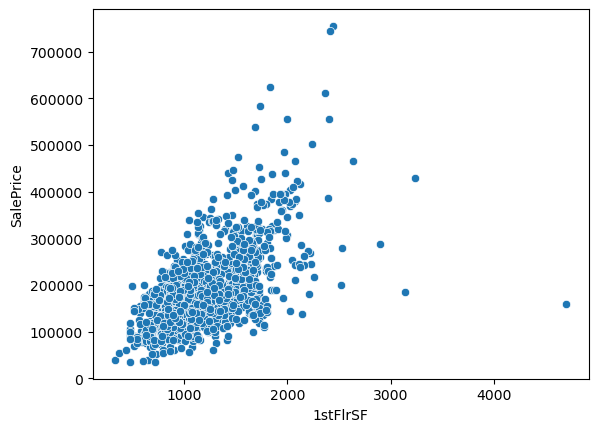

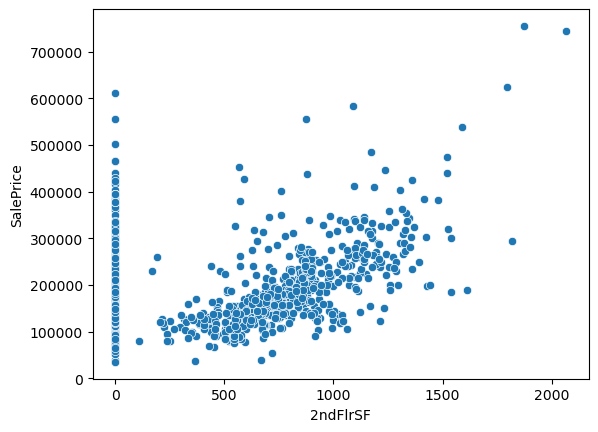

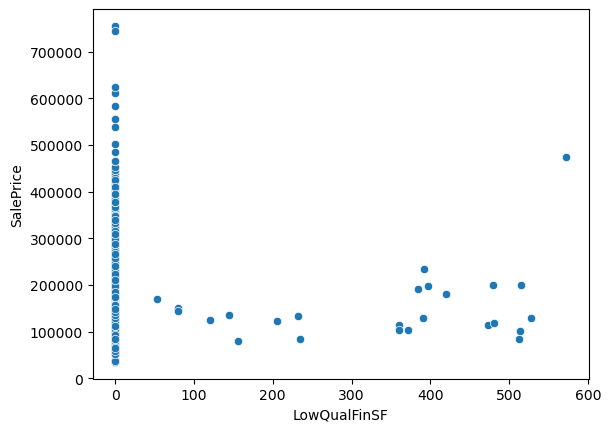

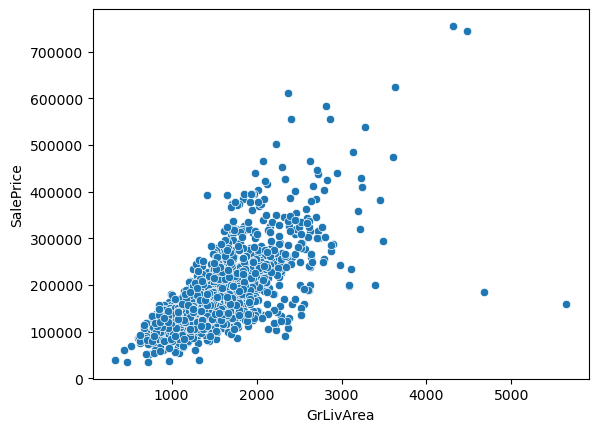

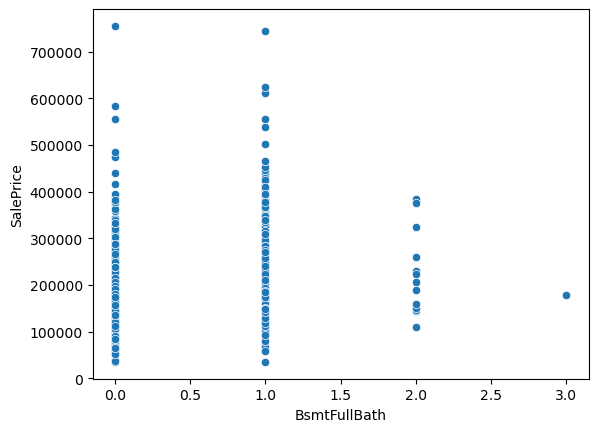

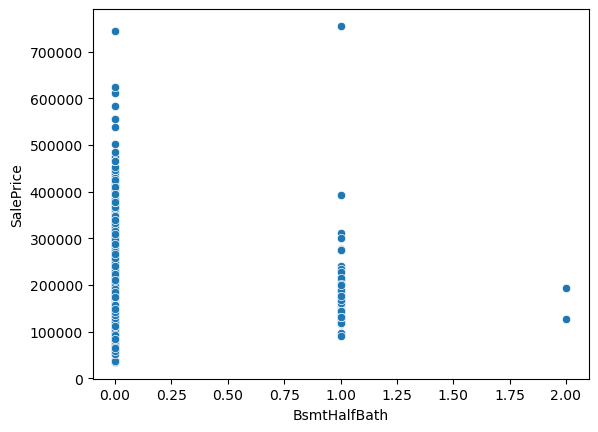

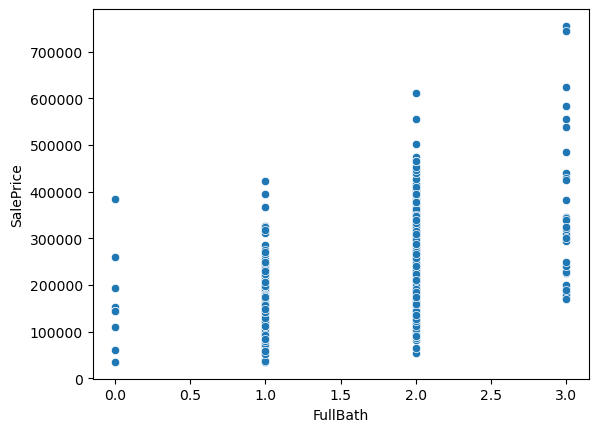

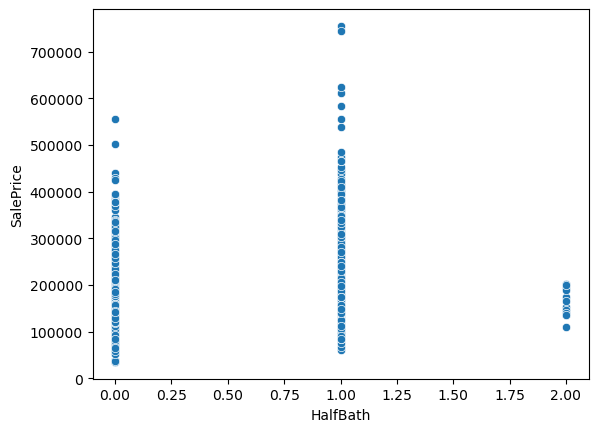

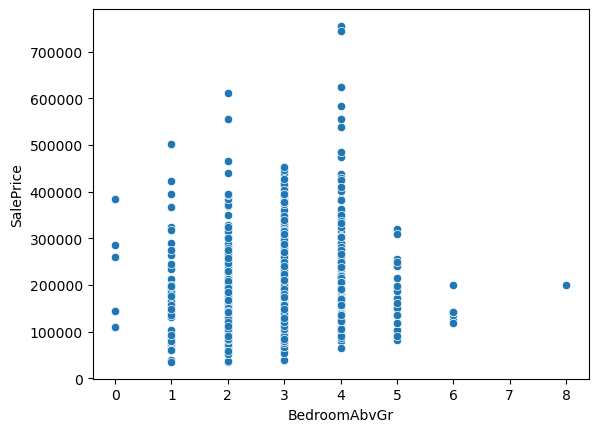

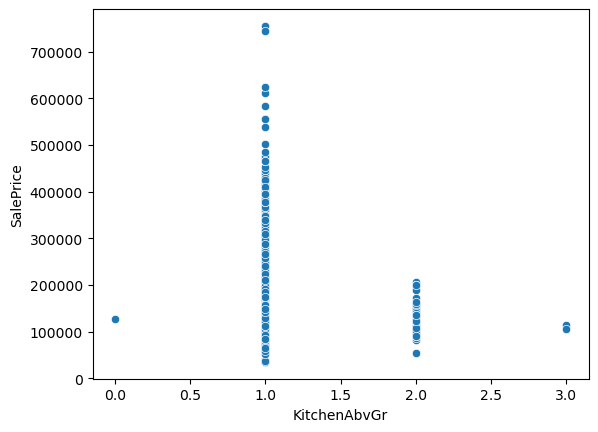

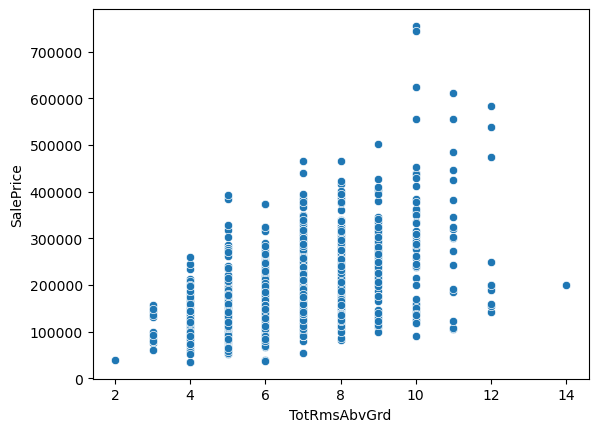

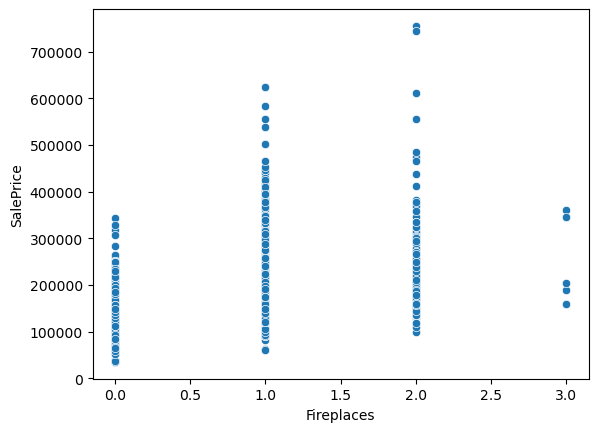

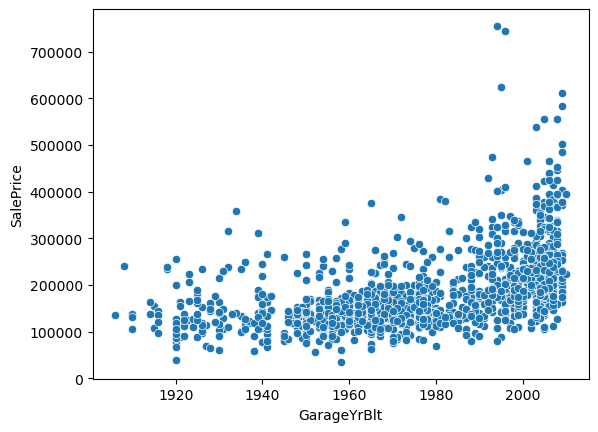

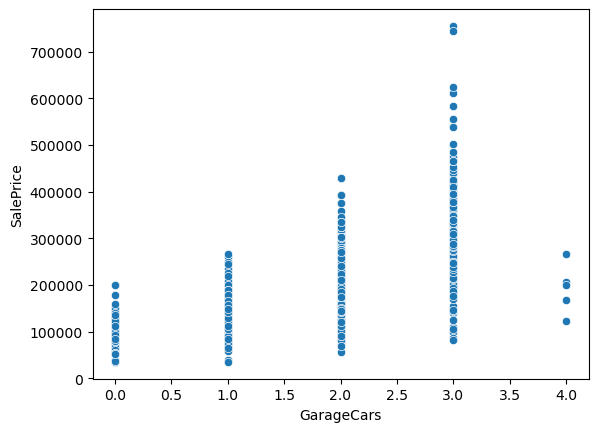

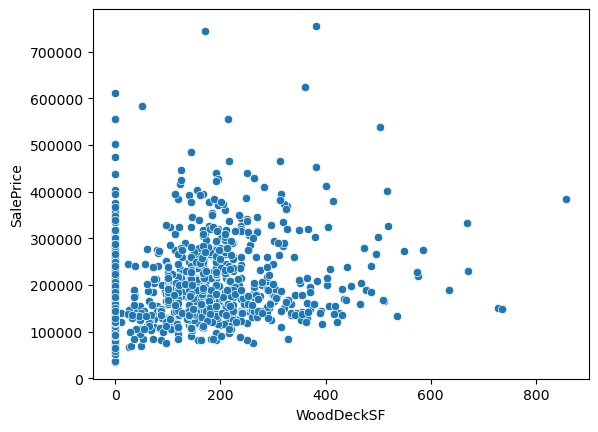

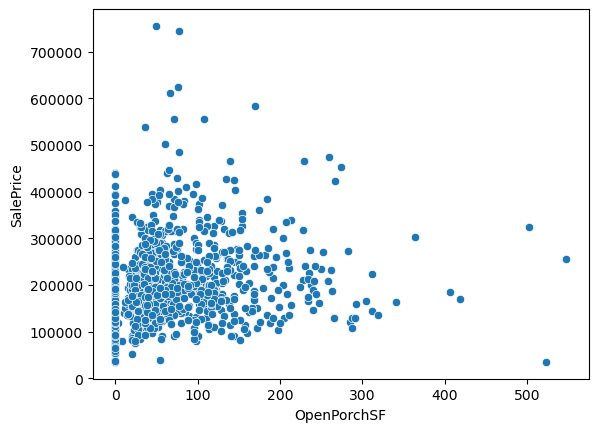

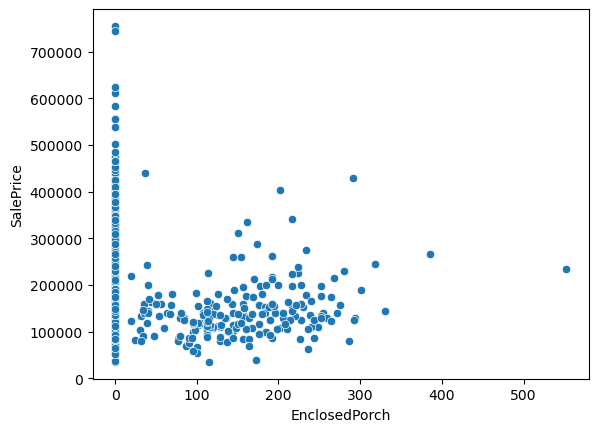

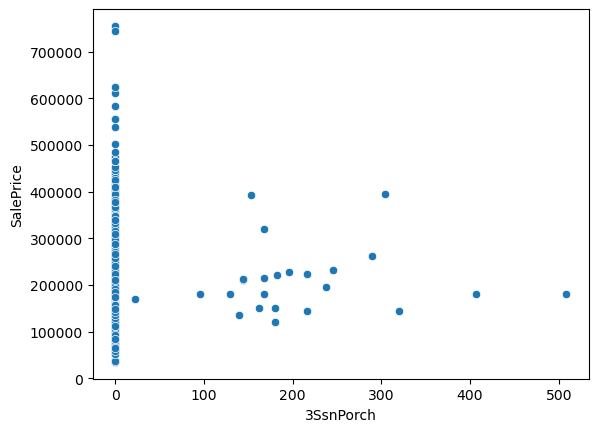

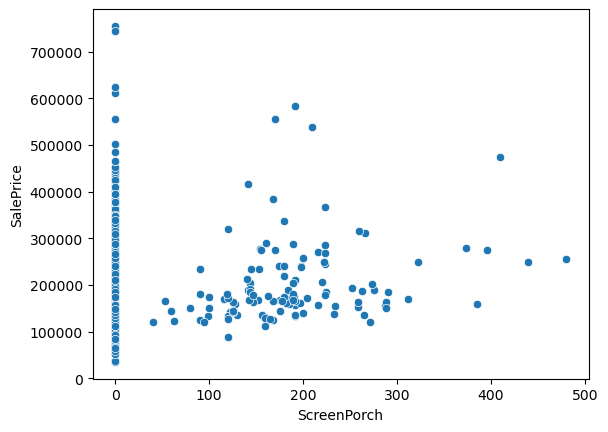

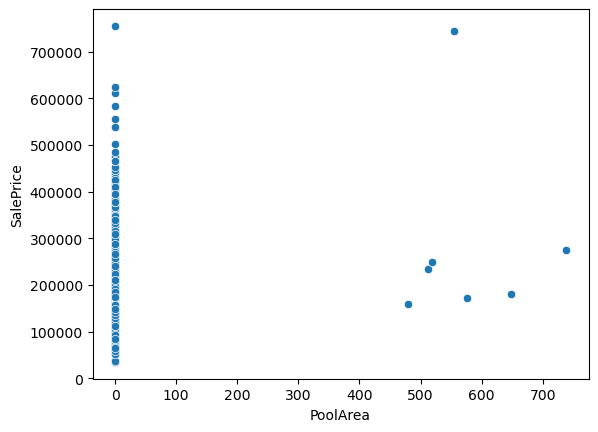

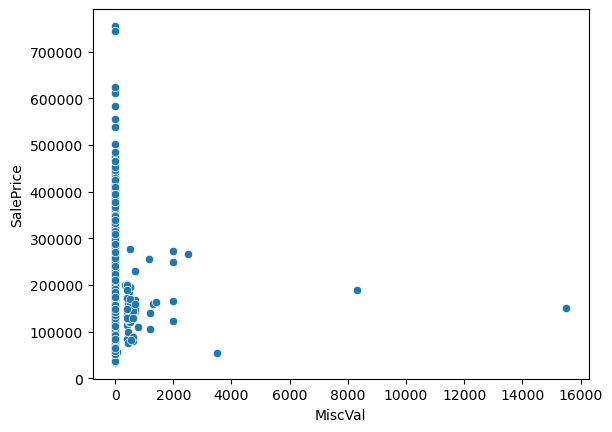

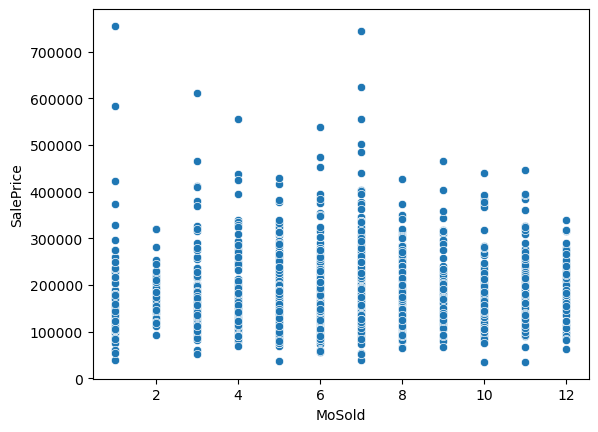

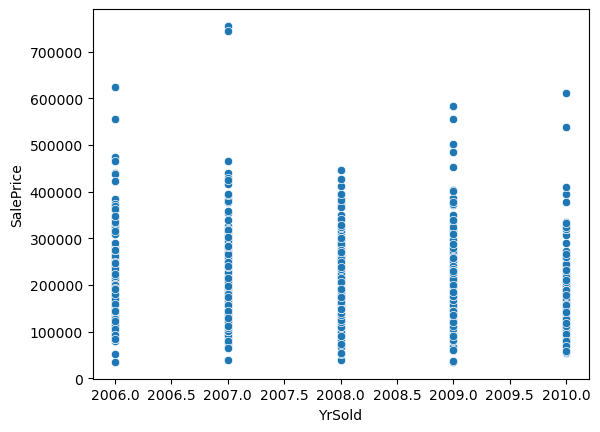

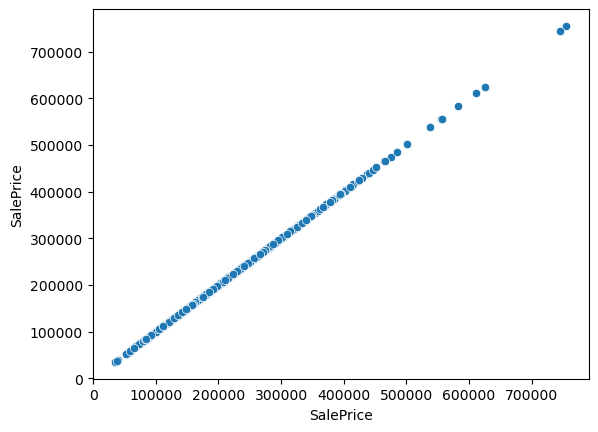

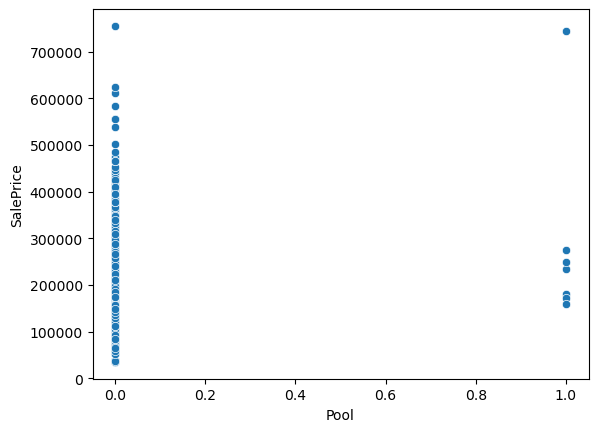

In [52]:
# Verifions si le prix a une relation linéaire avec les autres caractéristiques quantitative (nuage de point)
for i, col in enumerate (numeric_features.columns):
    plt.figure(i)
    sb.scatterplot(x=numeric_features[col],y=numeric_features['SalePrice'])

<div style="text-align:justify;font-family:times;font-size:15px">
Au vu de ces graphiques, les variables qui semblent avoir une forte liaison linéaire avec le prix sont : 

- OverallQual; 
- YearBuilt; 
- YearRemodAdd ; 
- TotalBsmtSF ; 
- 1stFlrSF ; 
- 2ndFlrSF; 
- GrLivArea; 
- FullBath; 
- TotRmsAbvGrv; 
- GarageYrBlt; 
- GarageCars; 
- GarageArea. 

Passons au calcul de coefficients de correlation pour plus d'évidence.
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2.2 Matrice de correlation</h3>
</div>

In [53]:
# matrice de correlation
numeric_features.corr(method="pearson")

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.317016 -0.129732     0.052427    -0.051122   
LotFrontage     -0.317016     1.000000  0.304522     0.234812    -0.053281   
LotArea         -0.129732     0.304522  1.000000     0.105806    -0.005636   
OverallQual      0.052427     0.234812  0.105806     1.000000    -0.091932   
OverallCond     -0.051122    -0.053281 -0.005636    -0.091932     1.000000   
YearBuilt        0.015904     0.116685  0.014228     0.572323    -0.375983   
YearRemodAdd     0.037762     0.083348  0.013788     0.550684     0.073741   
MasVnrArea       0.029225     0.178469  0.103321     0.407252    -0.125694   
TotalBsmtSF     -0.257633     0.363472  0.260833     0.537808    -0.171098   
1stFlrSF        -0.257881     0.413773  0.299475     0.476224    -0.144203   
2ndFlrSF         0.385544     0.072388  0.050986     0.295493     0.028942   
LowQualFinSF     0.055649     0.037469  0.004779    -0.030429     0.025494   
GrLivArea        0.135710     0.368007  0.263116     0.593007    -0.079686   
BsmtFullBath    -0.007905     0.090343  0.158155     0.111098    -0.054942   
BsmtHalfBath     0.006659    -0.006979  0.048046    -0.040150     0.117821   
FullBath         0.162659     0.180534  0.126031     0.550600    -0.194149   
HalfBath         0.223624     0.047222  0.014259     0.273458    -0.060769   
BedroomAbvGr     0.034555     0.236840  0.119690     0.101676     0.012980   
KitchenAbvGr     0.306784    -0.004905 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.110109     0.320518  0.190015     0.427452    -0.057583   
Fireplaces      -0.021657     0.233221  0.271364     0.396765    -0.023820   
GarageYrBlt      0.075316     0.066518 -0.025266     0.548496    -0.324570   
GarageCars      -0.019584     0.269539  0.154871     0.600671    -0.185758   
WoodDeckSF      -0.006297     0.075542  0.171698     0.238923    -0.003334   
OpenPorchSF      0.007592     0.137014  0.084774     0.308819    -0.032589   
EnclosedPorch    0.002495     0.010287 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.046056     0.061945  0.020423     0.030371     0.025504   
ScreenPorch     -0.021132     0.037655  0.043160     0.064886     0.054811   
PoolArea         0.019739     0.180819  0.077672     0.065166    -0.001985   
MiscVal         -0.007315    -0.000255  0.038068    -0.031406     0.068777   
MoSold           0.001695     0.010451  0.001205     0.070815    -0.003511   
YrSold          -0.023818     0.006380 -0.014261    -0.027347     0.043950   
SalePrice       -0.059406     0.334771  0.263843     0.790982    -0.077856   
Pool             0.020257     0.207566  0.087166     0.073907    -0.009158   

               YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  \
MSSubClass      0.015904      0.037762    0.029225    -0.257633 -0.257881   
LotFrontage     0.116685      0.083348    0.178469     0.363472  0.413773   
LotArea         0.014228      0.013788    0.103321     0.260833  0.299475   
OverallQual     0.572323      0.550684    0.407252     0.537808  0.476224   
OverallCond    -0.375983      0.073741   -0.125694    -0.171098 -0.144203   
YearBuilt       1.000000      0.592855    0.311600     0.391452  0.281986   
YearRemodAdd    0.592855      1.000000    0.176529     0.291066  0.240379   
MasVnrArea      0.311600      0.176529    1.000000     0.360067  0.339850   
TotalBsmtSF     0.391452      0.291066    0.360067     1.000000  0.819530   
1stFlrSF        0.281986      0.240379    0.339850     0.819530  1.000000   
2ndFlrSF        0.010308      0.140024    0.173800    -0.174512 -0.202646   
LowQualFinSF   -0.183784     -0.062419   -0.068628    -0.033245 -0.014241   
GrLivArea       0.199010      0.287389    0.388052     0.454868  0.566024   
BsmtFullBath    0.187599      0.119470    0.083010     0.307351  0.244671   
BsmtHalfBath   -0.038162     -0.012337    0.027403    -0.000315  0.001956   
FullBath        0.468271      0.439046    0.272999  

<Axes: >

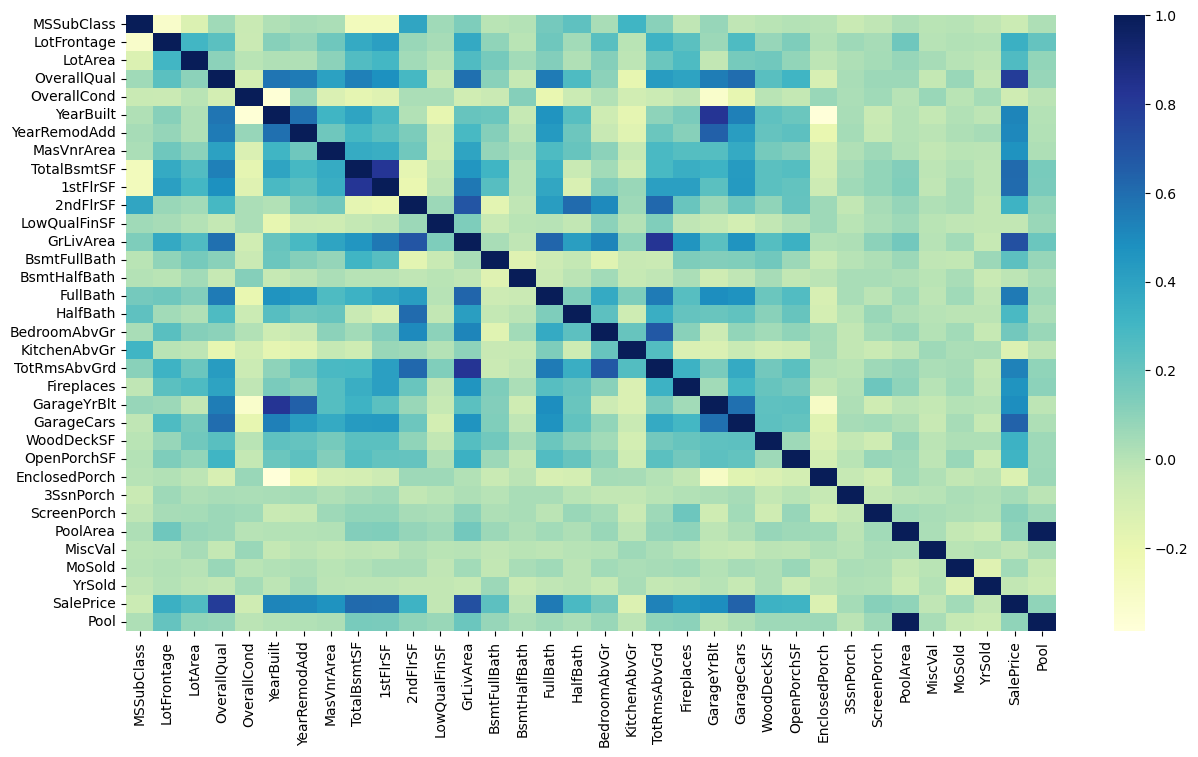

In [54]:
# matrice de correlation
corr=numeric_features.corr()

plt.figure(figsize=(15,8))
sb.heatmap(corr,cmap="YlGnBu")

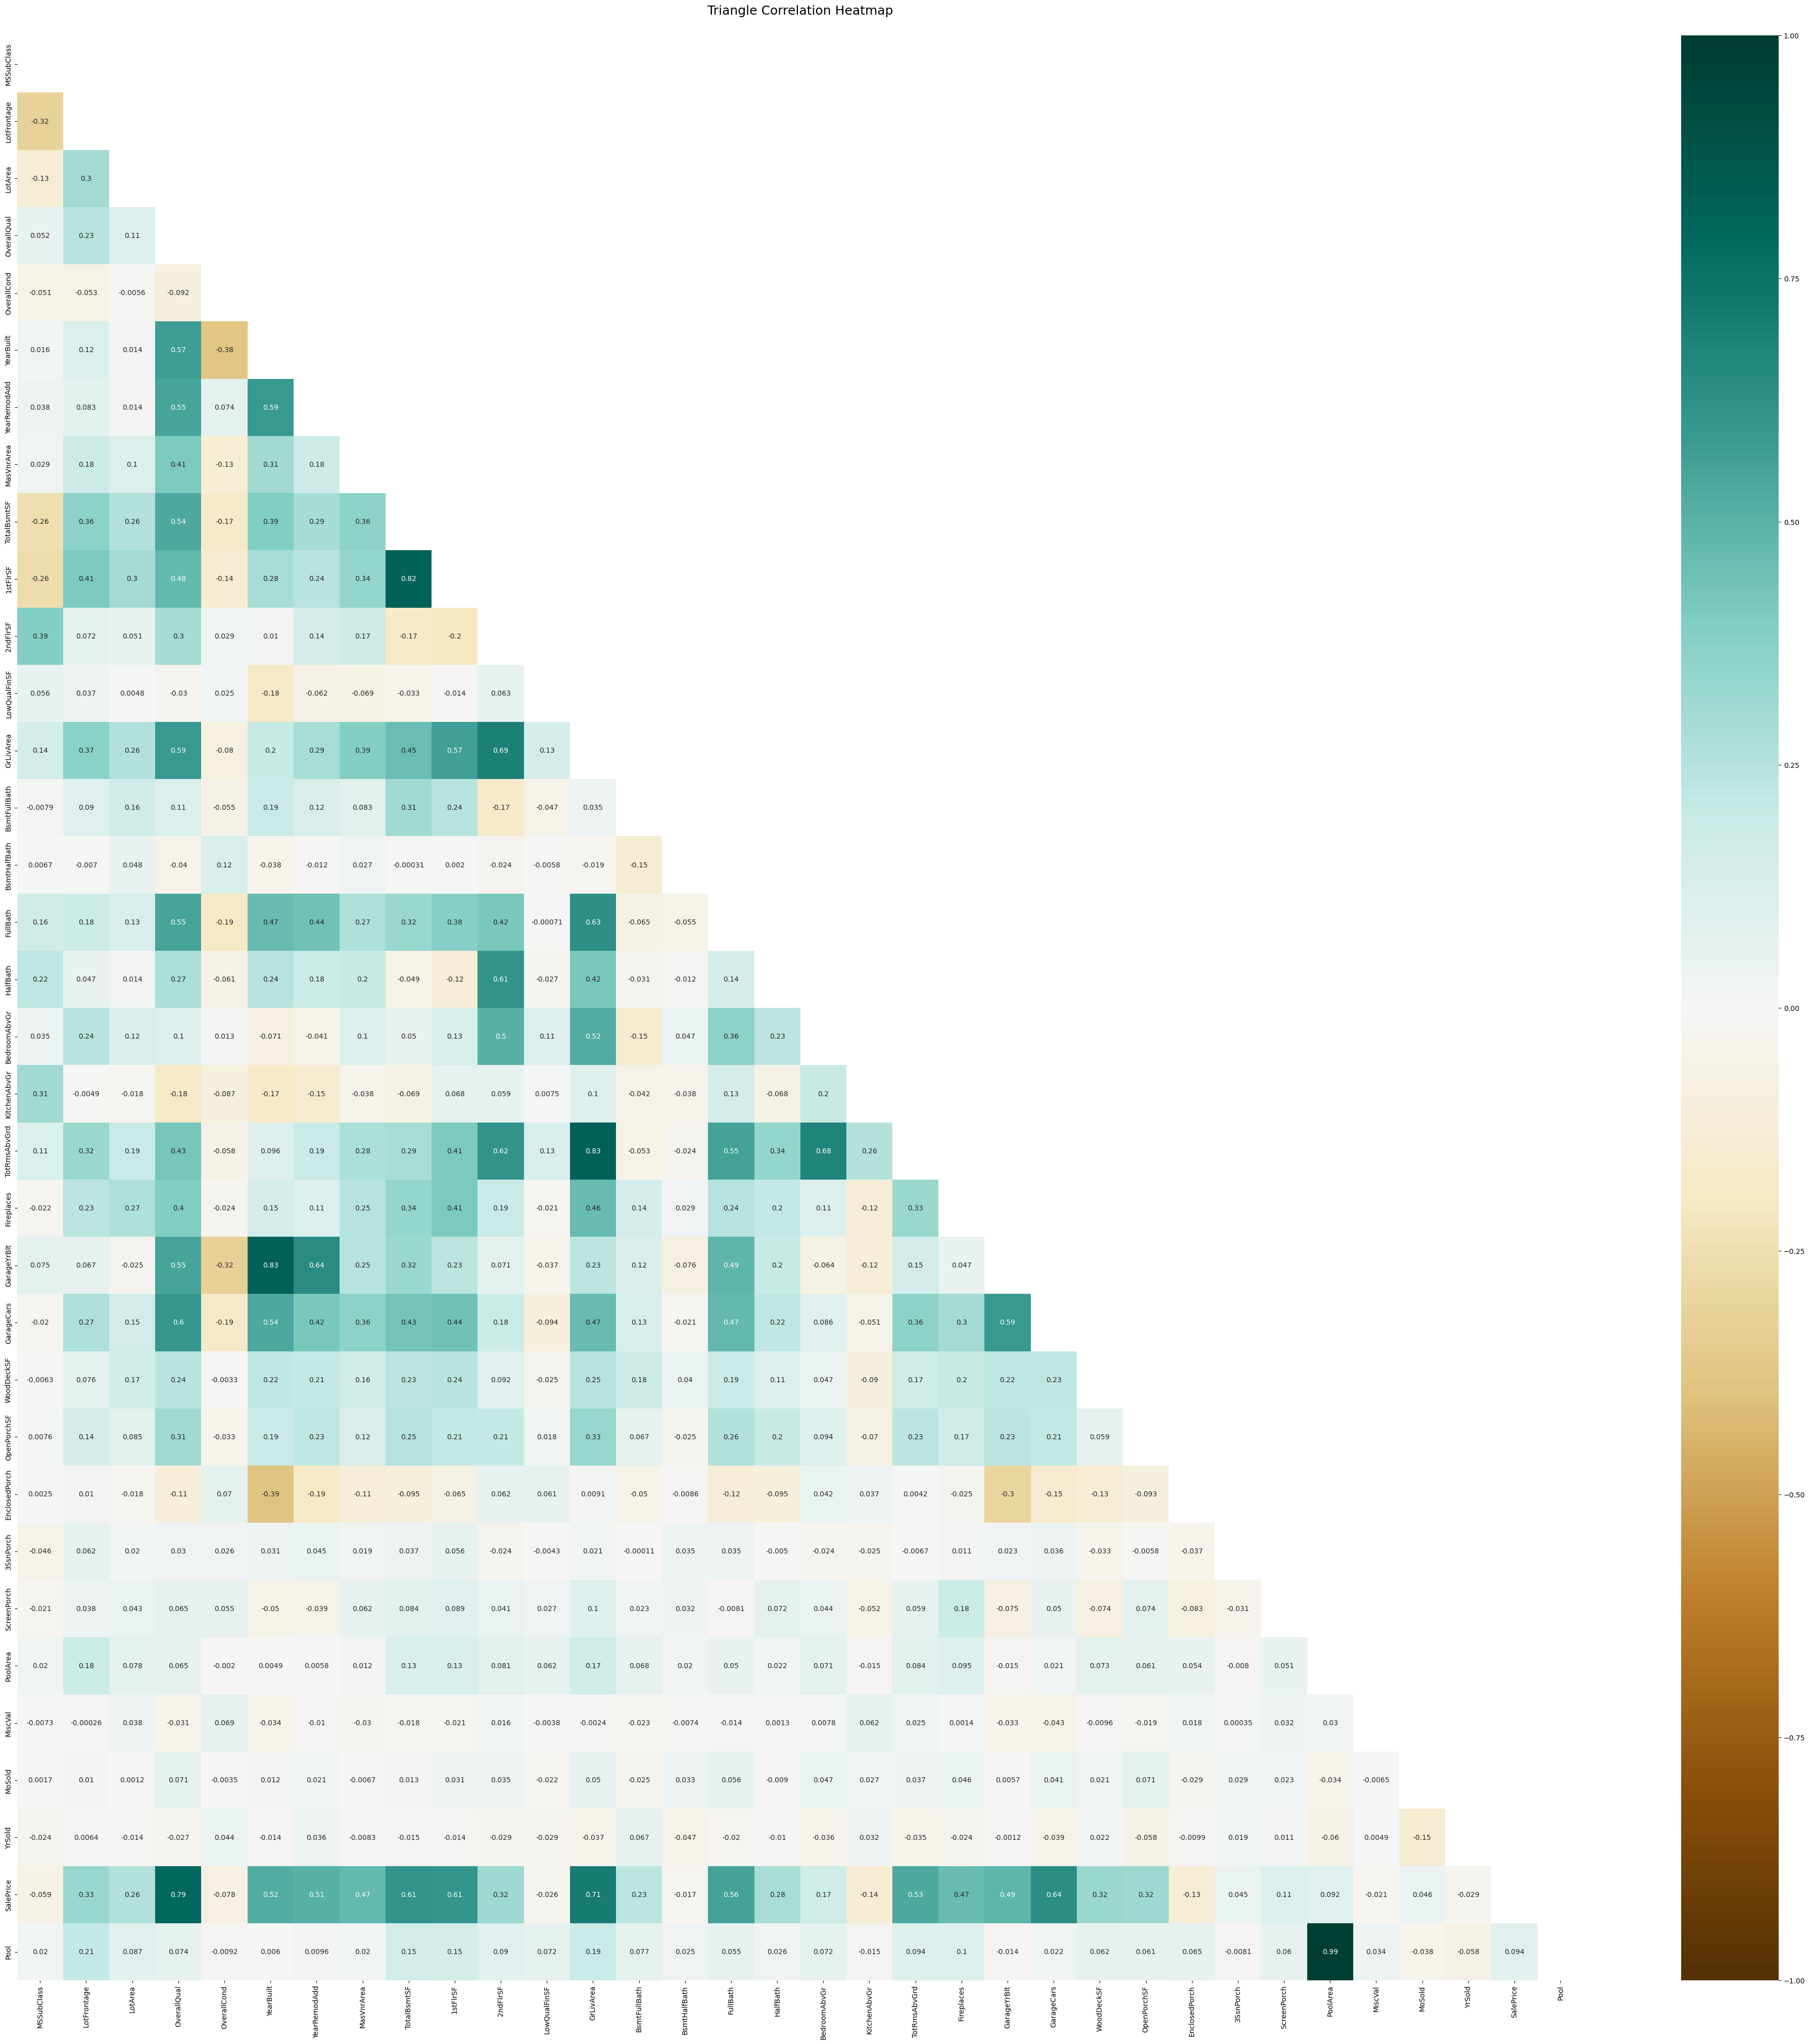

In [55]:
# matrice de correlation
plt.figure(figsize=(50,50))
mask = np.triu(np.ones_like(numeric_features.corr(), dtype=bool))
heatmap = sb.heatmap(numeric_features.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=30)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2.3 Détermination des fortes correlations entres les variables</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2.3.1 Détection d'autocorrelations entres les variables explicatives</h4>
</div>

<p style="text-align:justify;font-family:times;font-size:15px">  
En se basant sur la matrice de correlation, nous allons determiner les varables expliquatives qui sont fortement correlées entre elles. Pour cela nous utiliserons une fonction et prendront comme seuil pour le coéfficient de pearson 0.5
</p>

In [56]:
def autocorrelation(data, seuil):
    """
    Identifie les paires de variables fortement corrélées dans un DataFrame.

    Parameters:
    - data (DataFrame): Le DataFrame contenant les variables à analyser.
    - seuil (float): Le seuil de corrélation au-delà duquel deux variables sont considérées comme fortement corrélées.

    Returns:
    - DataFrame: Un DataFrame contenant deux colonnes : 'Variable' (la variable principale) et 'Variables fortement corrélées'
      (la liste des variables fortement corrélées avec la variable principale).
    """
    # Calculez la matrice de corrélation
    correlation_matrix = data.corr().abs()

    # Sélectionnez la partie supérieure de la matrice de corrélation
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))

    # Créer un dictionnaire pour stocker les variables fortement corrélées avec chaque variable
    correlated_with = {}

    # Parcourir chaque colonne de la matrice de corrélation
    for column in upper.columns:
        # Sélectionner les colonnes fortement corrélées avec la colonne actuelle
        correlated_cols = list(upper.index[upper[column] > seuil])
        # Vérifier si la propre colonne est dans la liste des variables fortement corrélées
        if column in correlated_cols:
            correlated_cols.remove(column)  # Exclure la propre colonne de la liste des variables fortement corrélées
        # Ajouter la liste des variables fortement corrélées à la variable actuelle dans le dictionnaire
        if correlated_cols:
            correlated_with[column] = correlated_cols

    # Créer un DataFrame à partir du dictionnaire
    correlation_df = pd.DataFrame(correlated_with.items(), columns=['Variable', 'Variables fortement corrélées'])

    # Afficher le DataFrame
    print("l'ensemble des variables fortement correlées sont :")
    
    return correlation_df

In [57]:
autocorrelation(data_h_quant, 0.5)

l'ensemble des variables fortement correlées sont :


Variable                  Variables fortement corrélées
0      YearBuilt                                  [OverallQual]
1   YearRemodAdd                       [OverallQual, YearBuilt]
2    TotalBsmtSF                                  [OverallQual]
3       1stFlrSF                                  [TotalBsmtSF]
4      GrLivArea              [OverallQual, 1stFlrSF, 2ndFlrSF]
5       FullBath                       [OverallQual, GrLivArea]
6       HalfBath                                     [2ndFlrSF]
7   BedroomAbvGr                          [2ndFlrSF, GrLivArea]
8   TotRmsAbvGrd  [2ndFlrSF, GrLivArea, FullBath, BedroomAbvGr]
9    GarageYrBlt         [OverallQual, YearBuilt, YearRemodAdd]
10    GarageCars          [OverallQual, YearBuilt, GarageYrBlt]
11          Pool                                     [PoolArea]

<div style="text-align:justify;font-family:times;font-size:15px">
L'inclusion de variables autocerrelés dans nos modèles peut causer des problèmes comme : 
    
- Des variables fortement corrélées peuvent ajouter de la complexité au modèle sans réellement améliorer ses performances prédictives; 
    
- Les modèles peuvent être enclins au surajustement lorsqu'ils incluent des variables fortement corrélées;
    
Nous allons donc éliminer quelques variables : 
    
- Pool et PoolArea sont correlées ce qui est tout à fait normal. Nous allons supprimer Pool et garder PoolArea car elle apporte plus d'informations notament en ce qui concerne la taille de piscine alors que Pool dit seulement s'il y a une piscine ou pas ; 
- OverallQual est correlé à presque toutes les variables ce qui est noraml puisqu'elle est un rating global de la maison ;
- TotRmsAbvGrd BedroomAbvGr sont fortement correlée ce qui peut s'expliquer par le fait que TotRmsAbvGrd est une combinaisont linéaire de BedroomAbvGr et d'autres variables. TotRmsAbvGrd apportant plus d'information, nous allons la garder et supprimer BedroomAbvGr; 
- Pour les autres correlations, elles sont un peu fortuites. Exemple le nombre de chambres à coucher au rez-de chaussé et la superficie du 1er étage. Nous les laisserons telles quelle en attendant d'appliquer une méthode de feature selection pour les éliminer si elles ne sont pas assez pertinantes
</div>

In [58]:
# suppression de Pool et BedroomAbvGr
data_h = data_h.drop(columns = ["Pool", "BedroomAbvGr"])
data_h_quant = data_h_quant.drop(columns = ["Pool", "BedroomAbvGr"])

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2.3.2 Détermination des fortes correlations entres les variables explicatives et la variable cible</h4>
</div>

<div style="text-align:justify;font-family:times;font-size:15px">
Nous allons filtrer la matrice de correlation et afficher les 5 caractéristiques sont les plus corrélées positivements et les 5 caractéristiques les plus corrélées négativement à la variable cible.
</div>

In [59]:
#Affichage des 5 caractéristiques sont les plus corrélées positivements et des
#5 caractéristiques les plus corrélées négativement
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n') 
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64 

YrSold          -0.028923
MSSubClass      -0.059406
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3 Analyse des correlations entre variables qualitatives</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3.1 Test de khi2</h3>
</div>

In [60]:
from scipy.stats import chi2_contingency

In [61]:
# Analyse de la correlation entre les varibles qualitatives à l'aide du chi2
# Création de paires de variables
factors_paired = [(i, j) for i in data_h_qual.columns.values for j in data_h_qual.columns.values]

# Initialisation des listes chi2 et p_values
chi2, p_values = [], []

# Test du chi2 pour chaque paire de variables
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(data_h_qual[f[0]], data_h_qual[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)

# Transformation des listes en matrices et création de la DataFrame
khi2_p_values_matrix = np.array(p_values).reshape((len(data_h_qual.columns), len(data_h_qual.columns)))
khi2_p_values_df = pd.DataFrame(khi2_p_values_matrix, index=data_h_qual.columns.values, columns=data_h_qual.columns.values)

# Affichage de la DataFrame des p-values
print("DataFrame des p-values du test du chi2 :")
khi2_p_values_df.head(3)

DataFrame des p-values du test du chi2 :


MSZoning        Street      LotShape   LandContour  Utilities  \
MSZoning  0.000000e+00  1.293331e-19  1.359627e-18  6.221392e-08   0.991747   
Street    1.293331e-19  0.000000e+00  1.979614e-01  6.816612e-05   1.000000   
LotShape  1.359627e-18  1.979614e-01  0.000000e+00  2.564369e-13   0.568698   

             LotConfig     LandSlope  Neighborhood    Condition1  Condition2  \
MSZoning  8.462387e-04  3.319255e-03  0.000000e+00  1.252606e-03    0.010465   
Street    8.428802e-01  5.333197e-11  3.411442e-08  1.131990e-07    1.000000   
LotShape  1.792771e-41  1.687164e-08  4.378763e-35  1.138157e-06    0.759128   

          ...  Functional   FireplaceQu    GarageType  GarageFinish  \
MSZoning  ...    0.741428  4.891012e-13  2.634386e-46  2.695489e-31   
Street    ...    0.998465  9.571836e-01  6.835646e-15  6.554640e-01   
LotShape  ...    0.994096  5.539057e-11  1.043362e-14  8.650208e-17   

            GarageQual    GarageCond    PavedDrive     Fence      SaleType  \
MSZoning  9.335608e-15  3.489850e-09  7.513377e-28  0.230149  8.918626e-20   
Street    8.949988e-01  9.014408e-01  5.356266e-01  0.837927  1.073291e-03   
LotShape  4.254692e-04  3.350195e-02  9.326037e-04  0.191542  9.675531e-01   

          SaleCondition  
MSZoning   9.909275e-18  
Street     1.594118e-03  
LotShape   4.495140e-01  

[3 rows x 40 columns]

In [62]:
khi2_p_values_df.describe()

MSZoning     Street      LotShape   LandContour  Utilities  \
count  4.000000e+01  40.000000  4.000000e+01  4.000000e+01  40.000000   
mean   7.765038e-02   0.502536  1.281979e-01  1.586634e-01   0.697068   
std    2.459196e-01   0.439967  2.670649e-01  3.178549e-01   0.407781   
min    0.000000e+00   0.000000  0.000000e+00  0.000000e+00   0.000000   
25%    1.104112e-27   0.001198  1.973884e-10  1.287484e-08   0.431990   
50%    1.073681e-13   0.595545  4.520939e-04  1.040594e-05   0.963228   
75%    7.506333e-04   0.952138  6.374170e-02  5.030693e-02   0.998116   
max    9.999974e-01   1.000000  9.940962e-01  9.921565e-01   1.000000   

       LotConfig  LandSlope   Neighborhood    Condition1  Condition2  ...  \
count  40.000000  40.000000   4.000000e+01  4.000000e+01   40.000000  ...   
mean    0.265023   0.336375   1.484664e-02  1.989254e-01    0.445717  ...   
std     0.338392   0.395623   7.420944e-02  3.069124e-01    0.420657  ...   
min     0.000000   0.000000   0.000000e+00  0.000000e+00    0.000000  ...   
25%     0.000920   0.000004  4.200129e-127  1.087819e-07    0.000004  ...   
50%     0.052636   0.090463   4.592782e-43  8.416235e-04    0.489035  ...   
75%     0.456530   0.735839   3.662964e-19  2.509512e-01    0.839940  ...   
max     0.995855   0.999421   4.622627e-01  9.999984e-01    1.000000  ...   

         Functional   FireplaceQu    GarageType  GarageFinish    GarageQual  \
count  4.000000e+01  4.000000e+01  4.000000e+01  4.000000e+01  4.000000e+01   
mean   2.079535e-01  1.186903e-01  2.294871e-02  8.574837e-02  1.277130e-01   
std    3.676034e-01  2.743130e-01  1.433370e-01  2.208845e-01  2.814628e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    5.641435e-11  3.411536e-16  1.253610e-47  1.031701e-52  3.494670e-28   
50%    7.374016e-04  1.662664e-09  2.392779e-24  5.686993e-28  5.110330e-10   
75%    2.339705e-01  2.182028e-02  5.026704e-10  1.352977e-07  1.247788e-02   
max    1.000000e+00  9.571836e-01  9.067670e-01  7.484998e-01  9.997772e-01   

         GarageCond    PavedDrive         Fence      SaleType  SaleCondition  
count  4.000000e+01  4.000000e+01  4.000000e+01  4.000000e+01   4.000000e+01  
mean   1.140681e-01  1.054028e-01  2.759759e-01  1.860417e-01   8.714457e-02  
std    2.815593e-01  2.691344e-01  3.612813e-01  3.462195e-01   2.303424e-01  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  
25%    1.414642e-22  4.829868e-22  3.699225e-07  5.065525e-16   1.569110e-25  
50%    1.731796e-08  2.256876e-12  1.026716e-02  8.135584e-05   4.798291e-08  
75%    1.878590e-02  3.573881e-04  5.571527e-01  1.552884e-01   3.203020e-03  
max    9.998331e-01  9.997667e-01  9.934304e-01  9.999986e-01   9.990498e-01  

[8 rows x 40 columns]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3.2 Heatmap des Liaisons</h3>
</div>

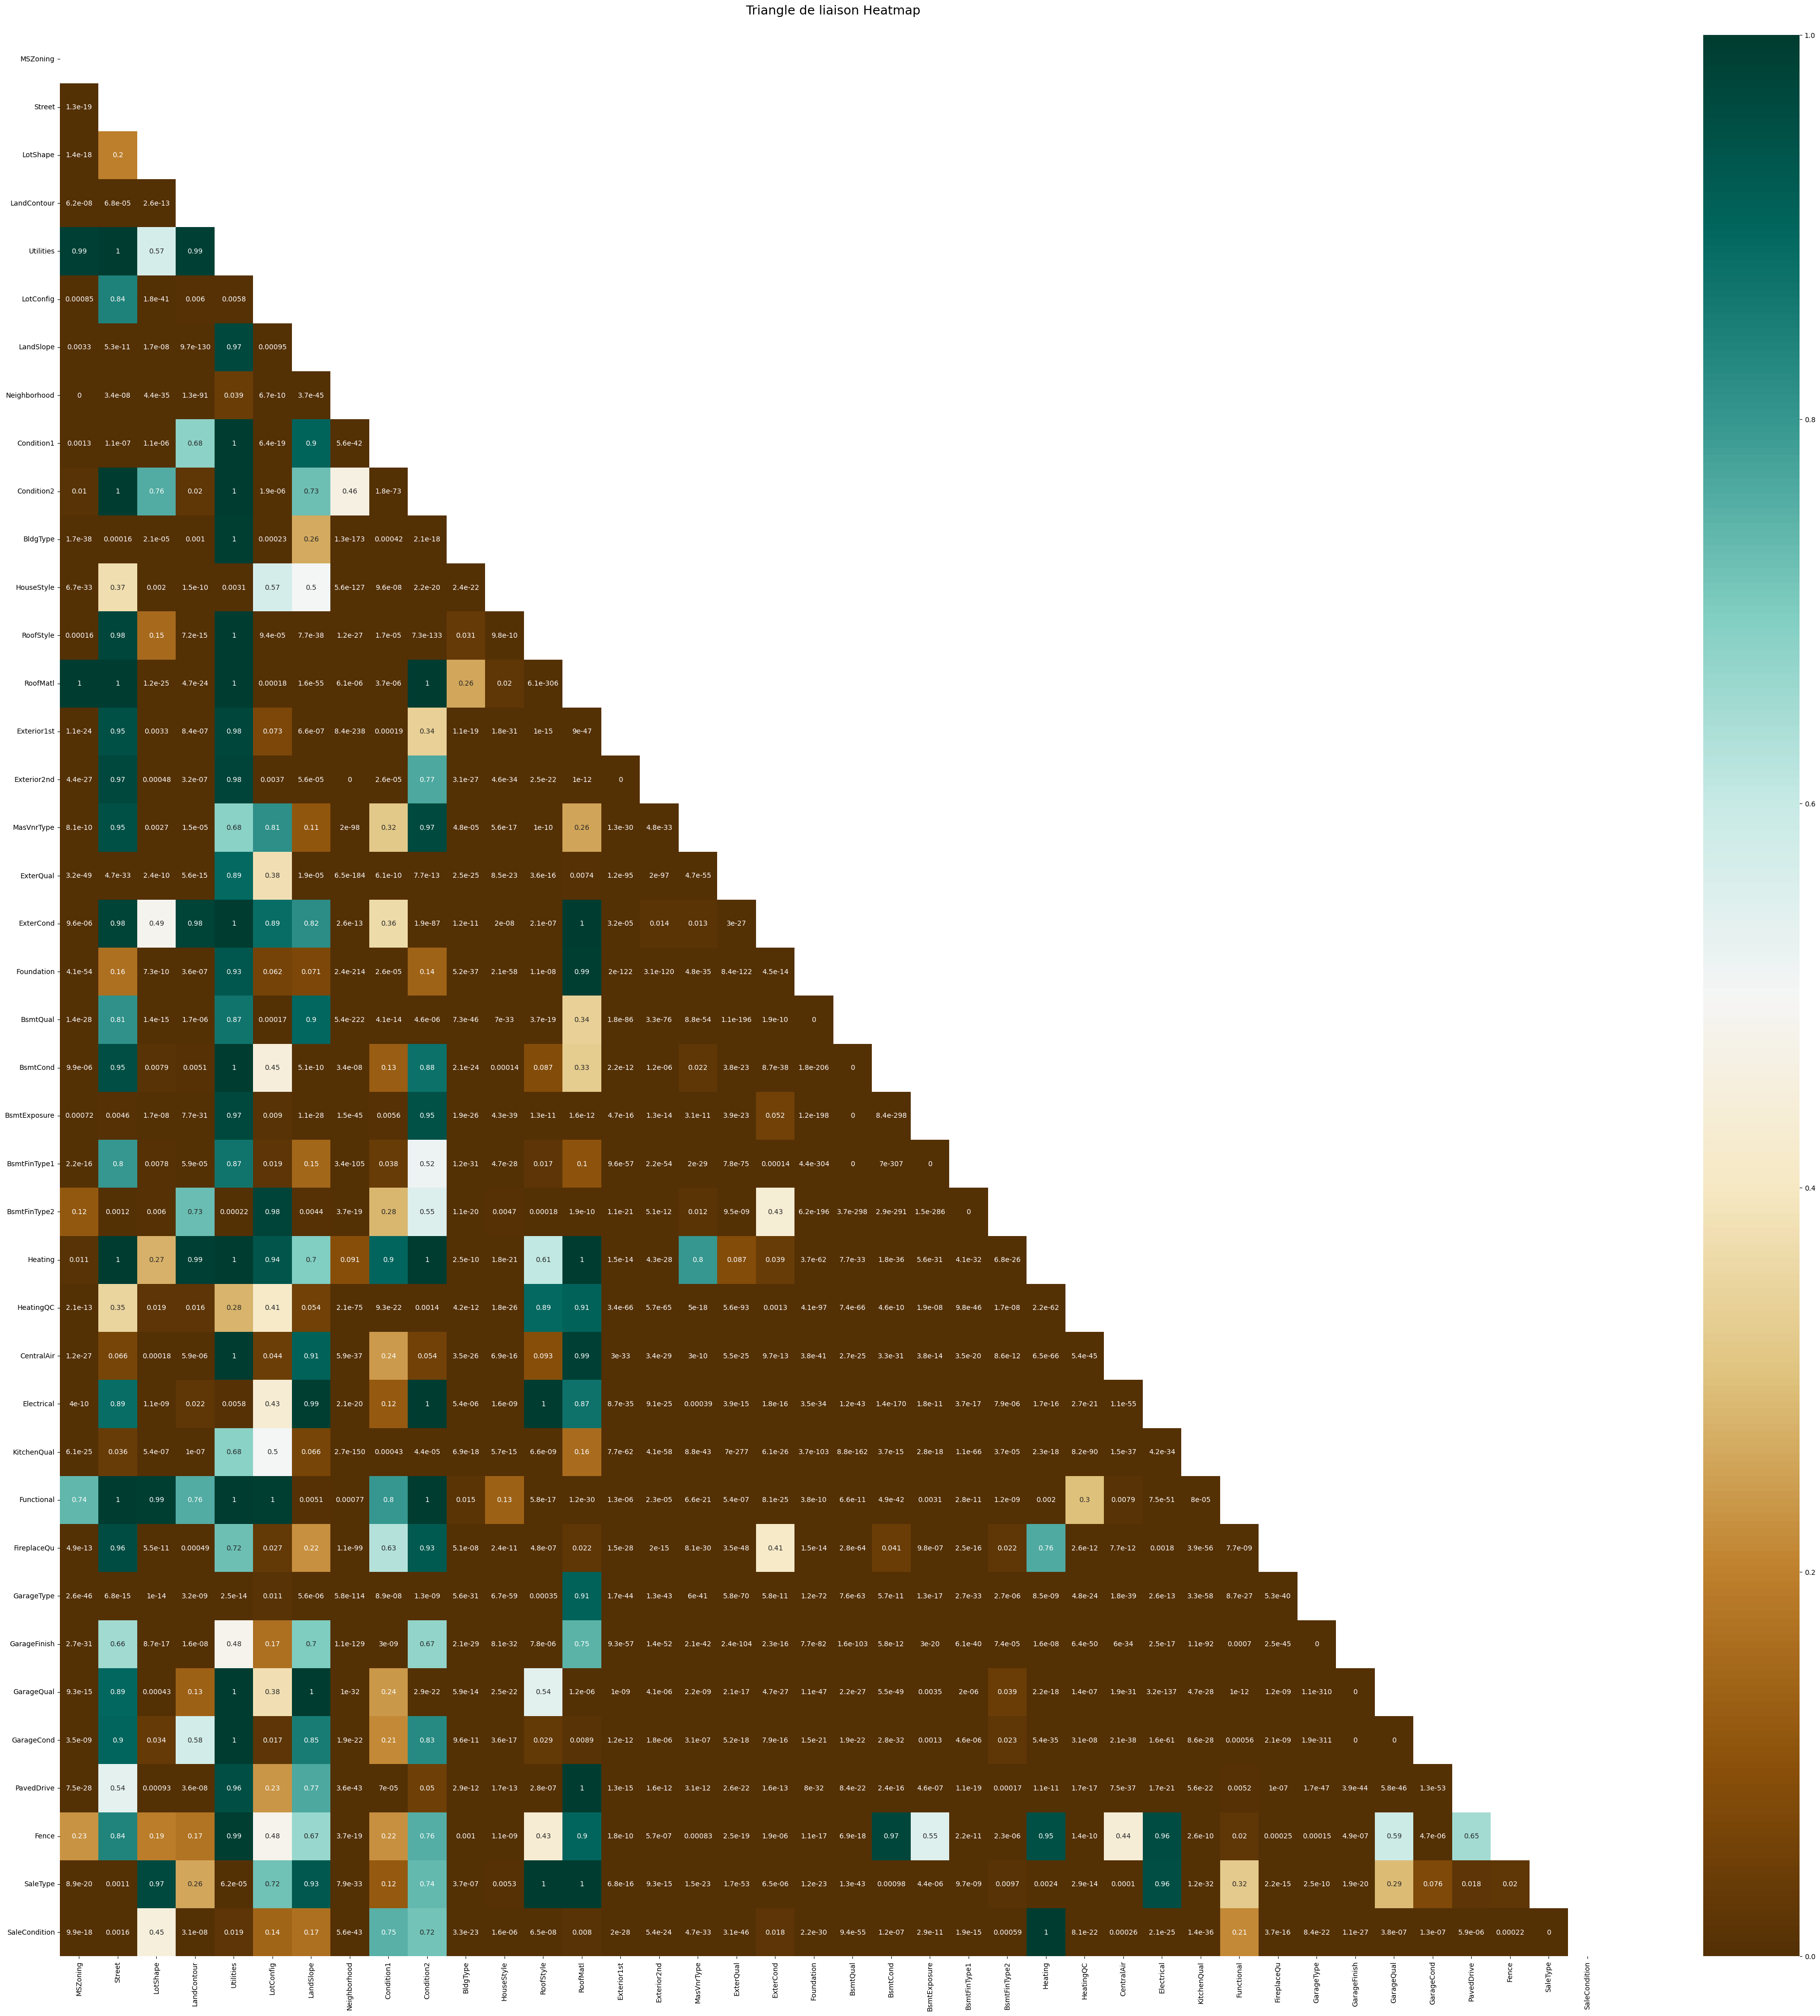

In [63]:
# Heatmap de la matrice des p-values du test de khi 2 
plt.figure(figsize=(50,50))
mask = np.triu(np.ones_like(khi2_p_values_df, dtype=bool))
heatmap = sb.heatmap(khi2_p_values_df, mask=mask, vmin=0, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle de liaison Heatmap', fontdict={'fontsize':18}, pad=30)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.4 Analyse des correlations entre variables qualitatives et prix des propriétés </h2>
</div>

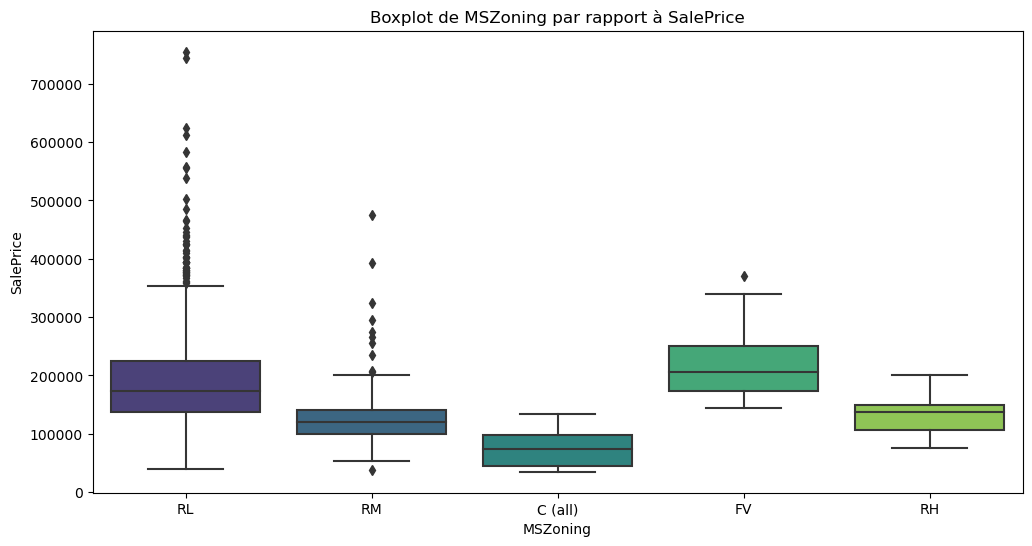

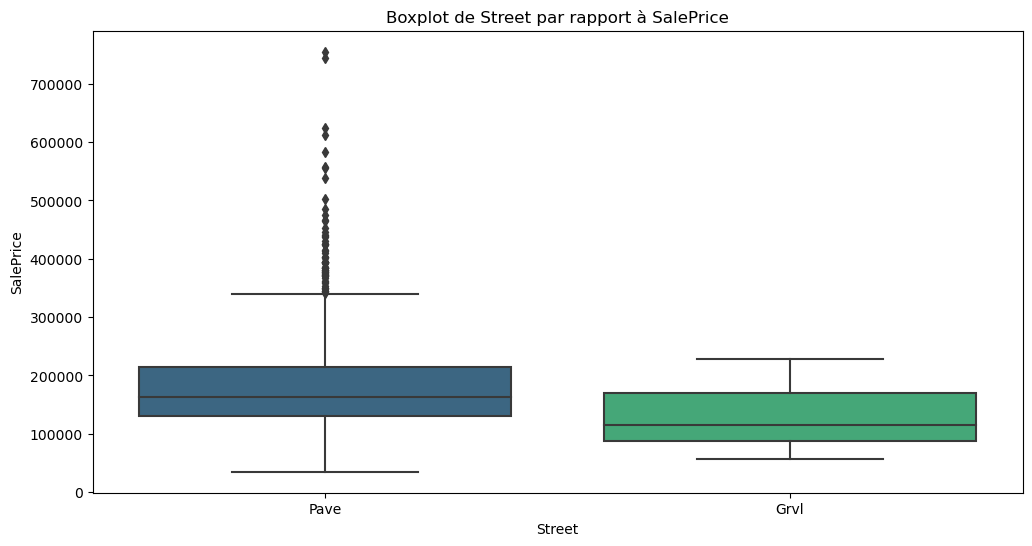

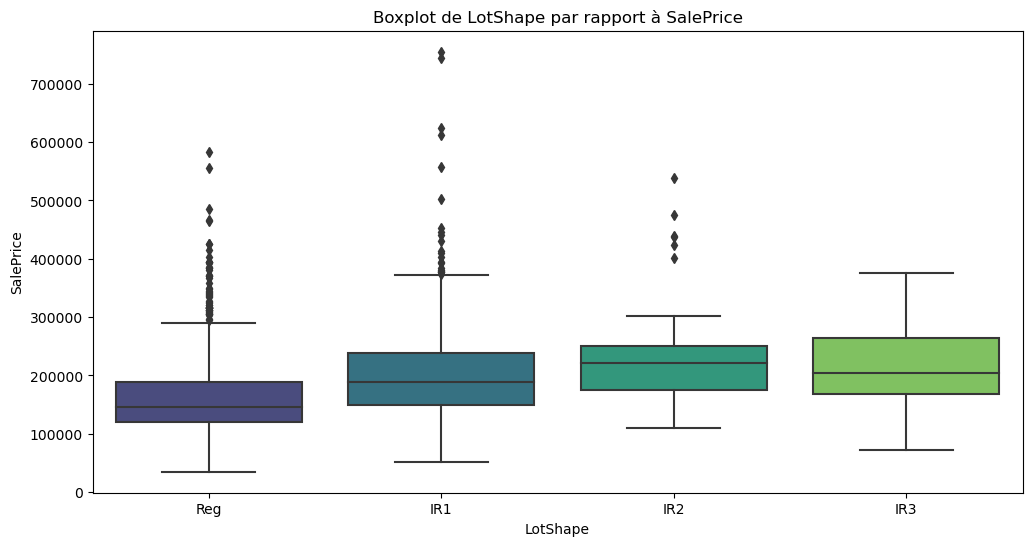

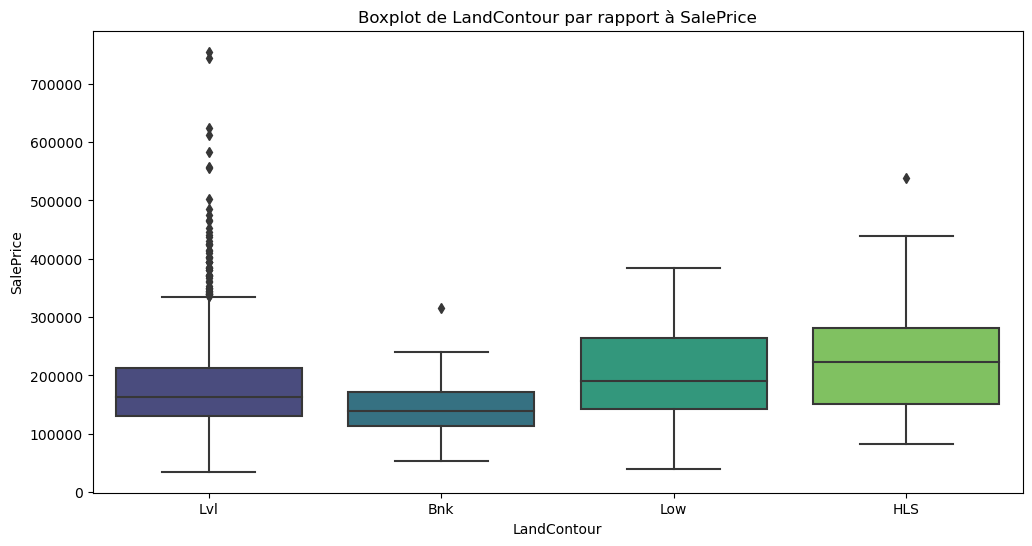

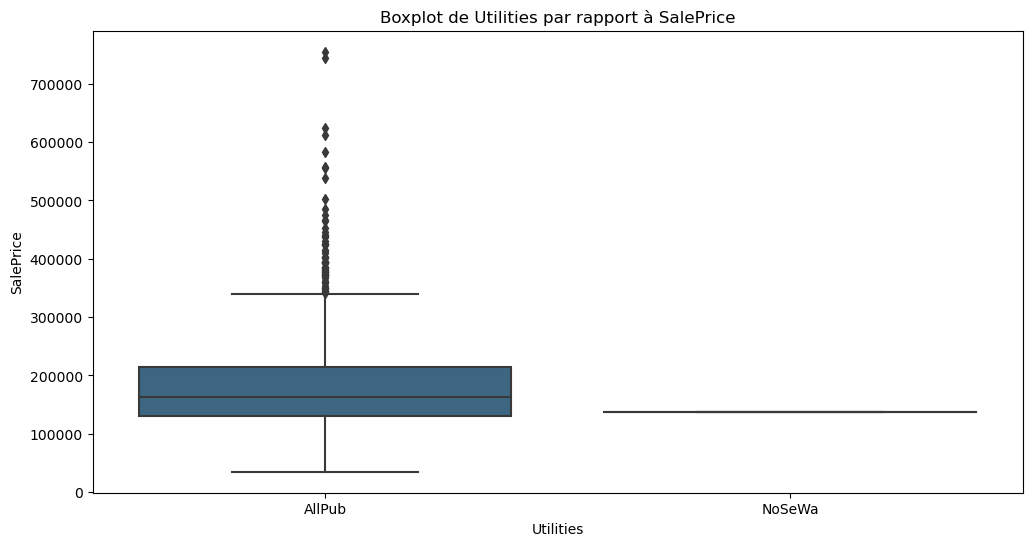

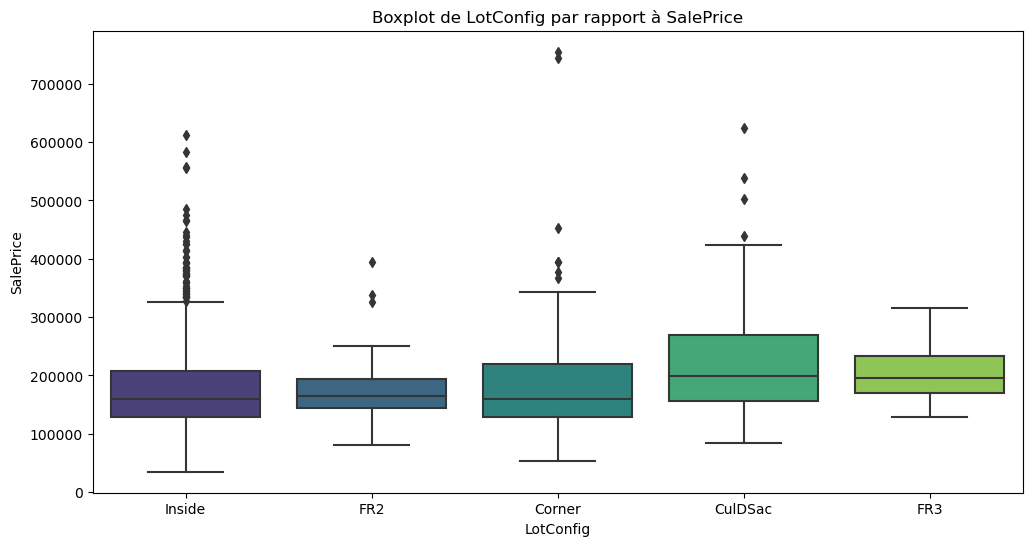

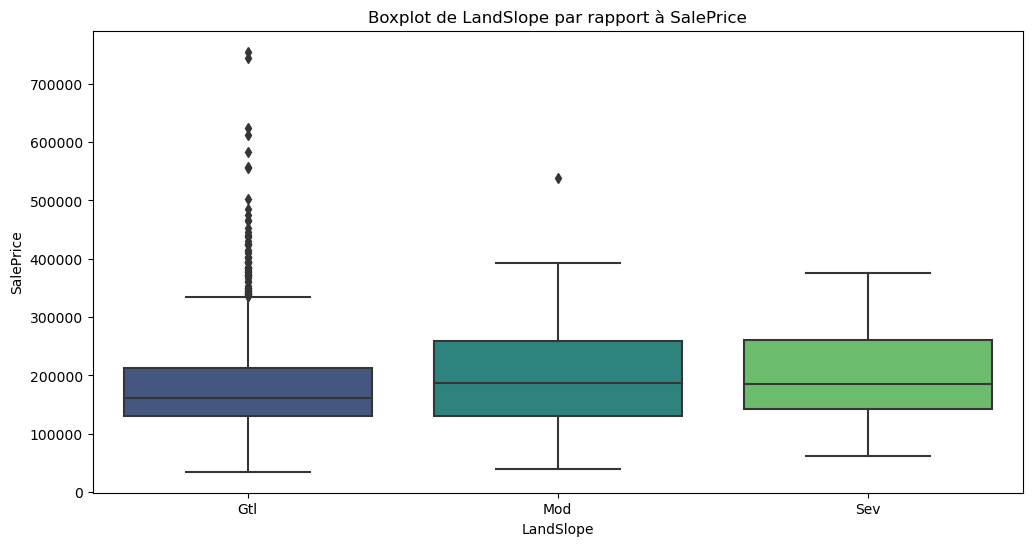

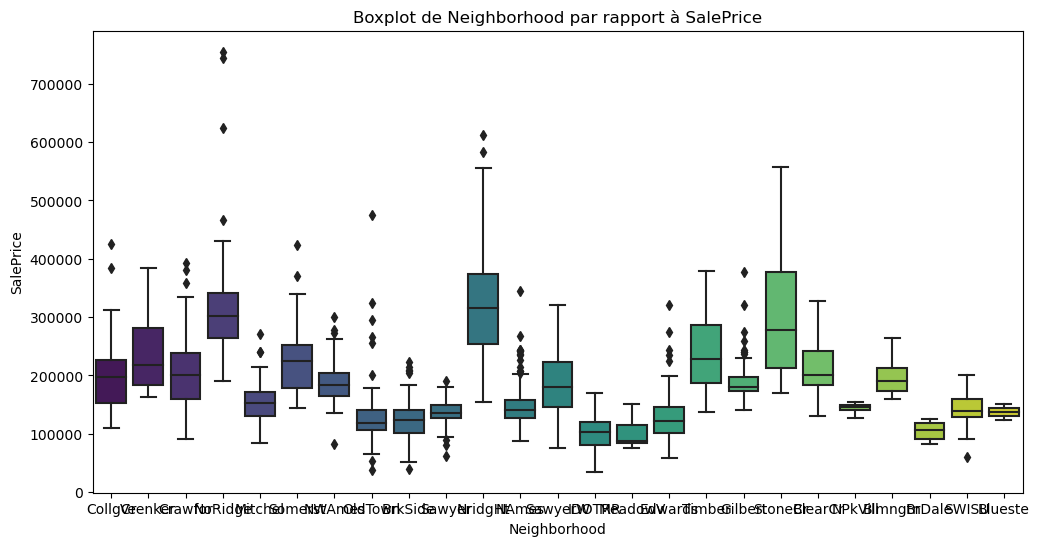

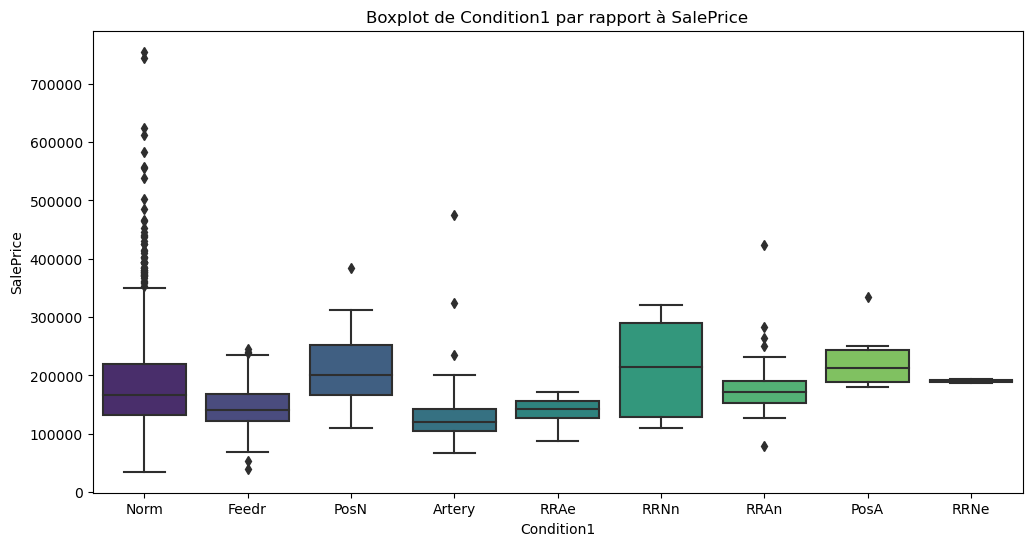

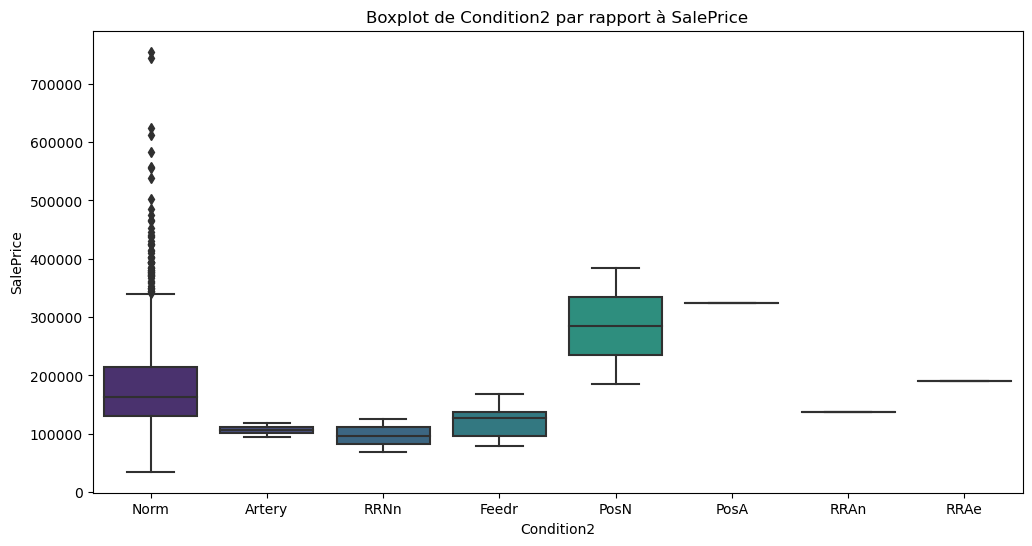

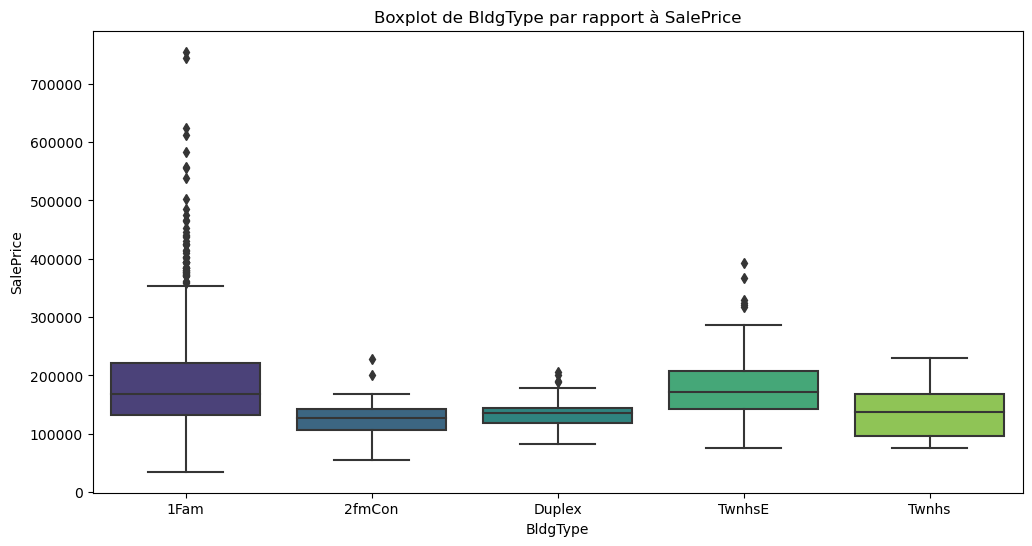

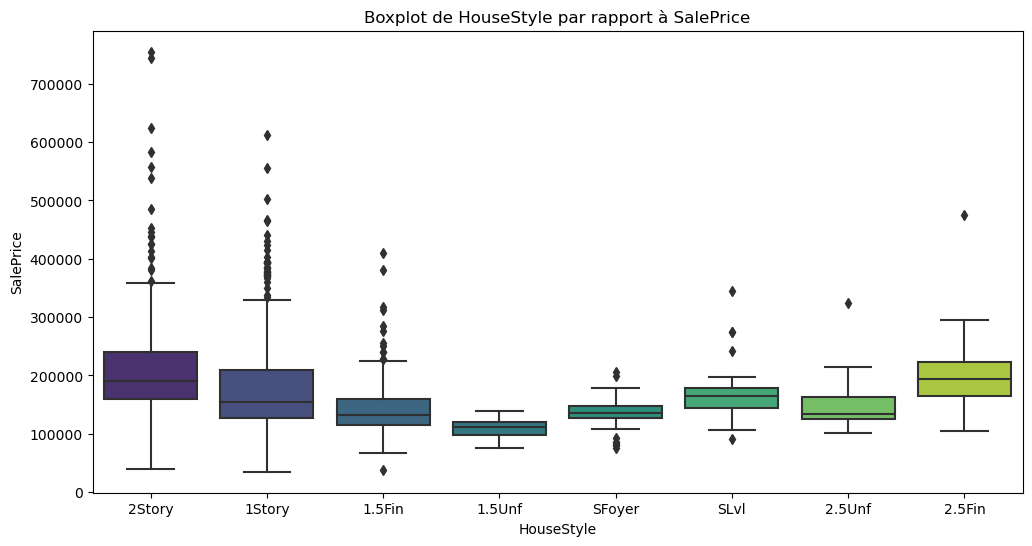

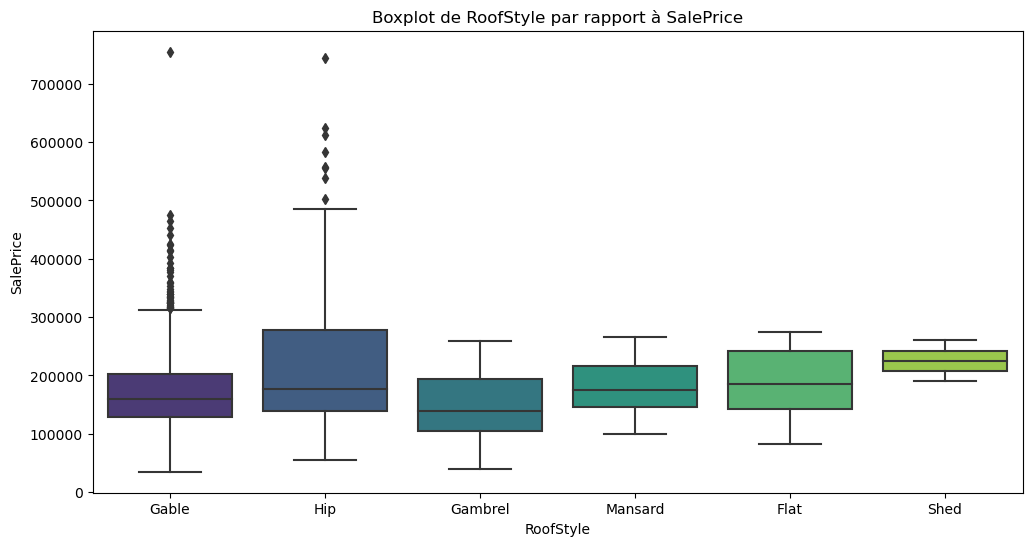

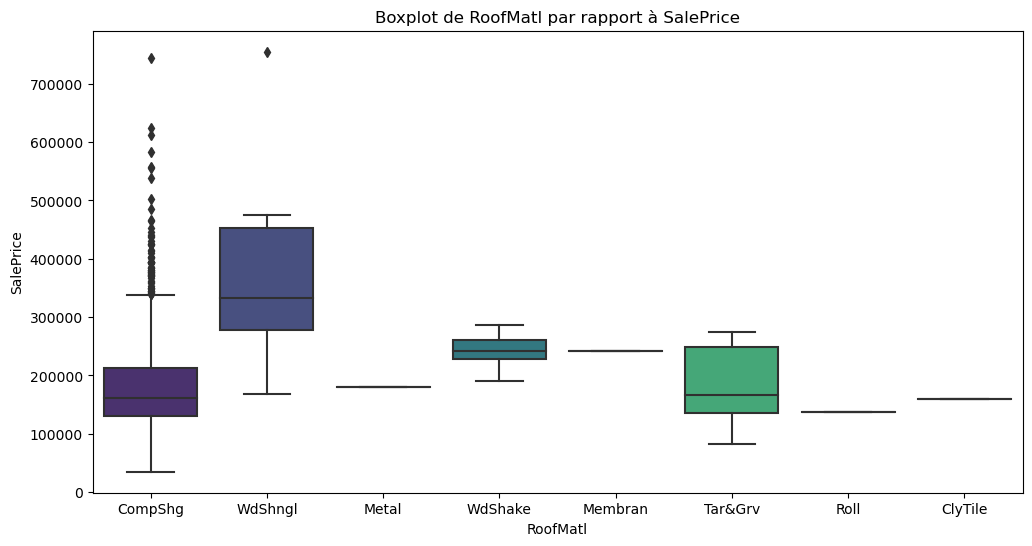

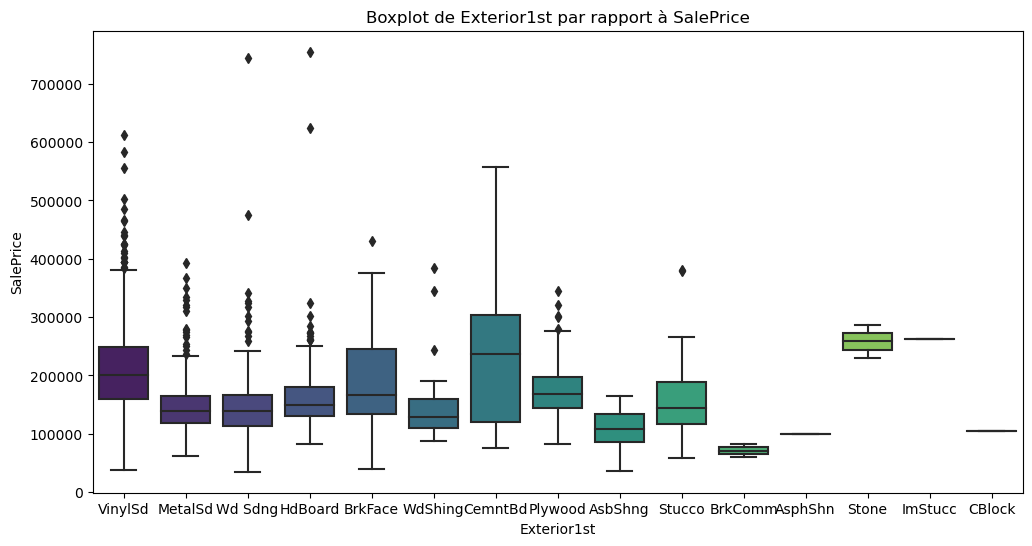

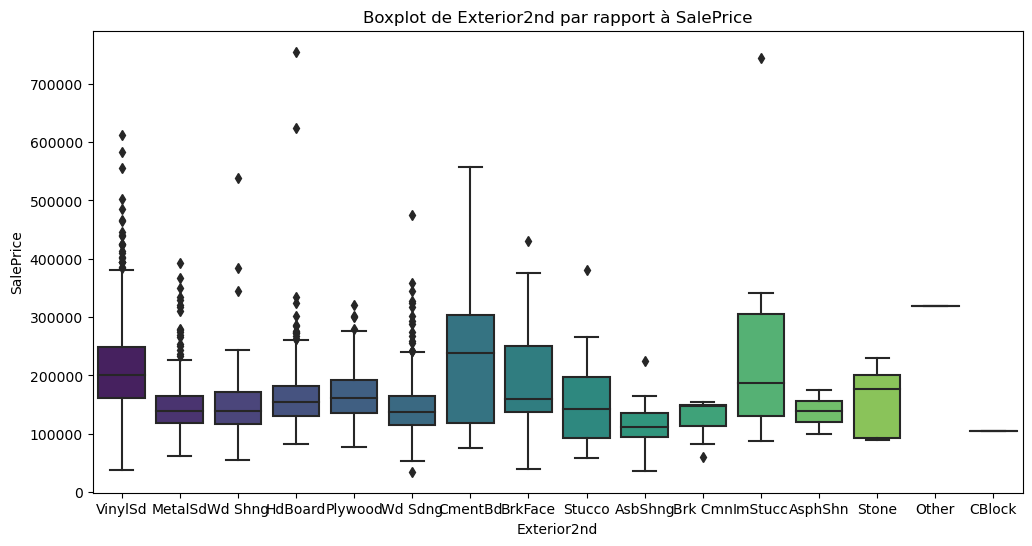

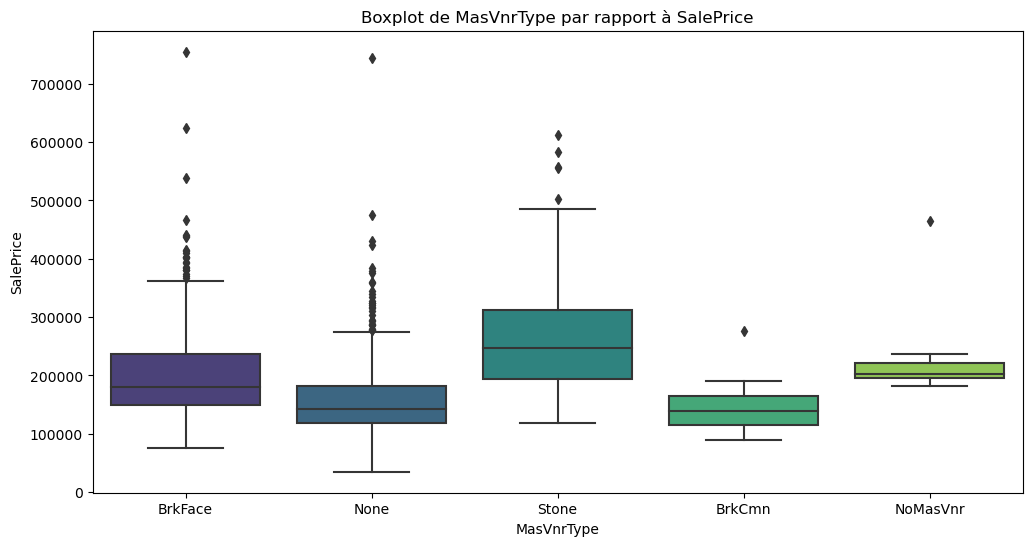

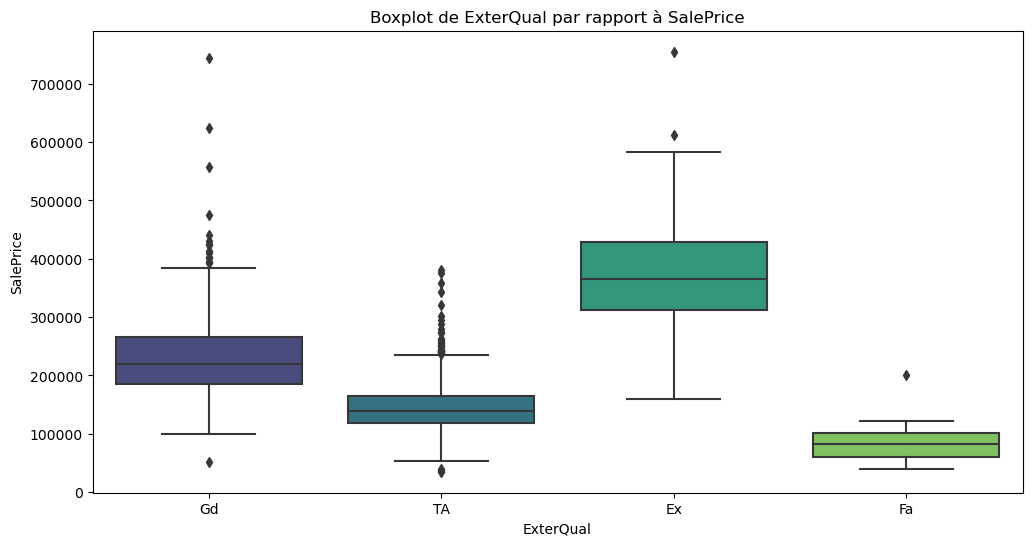

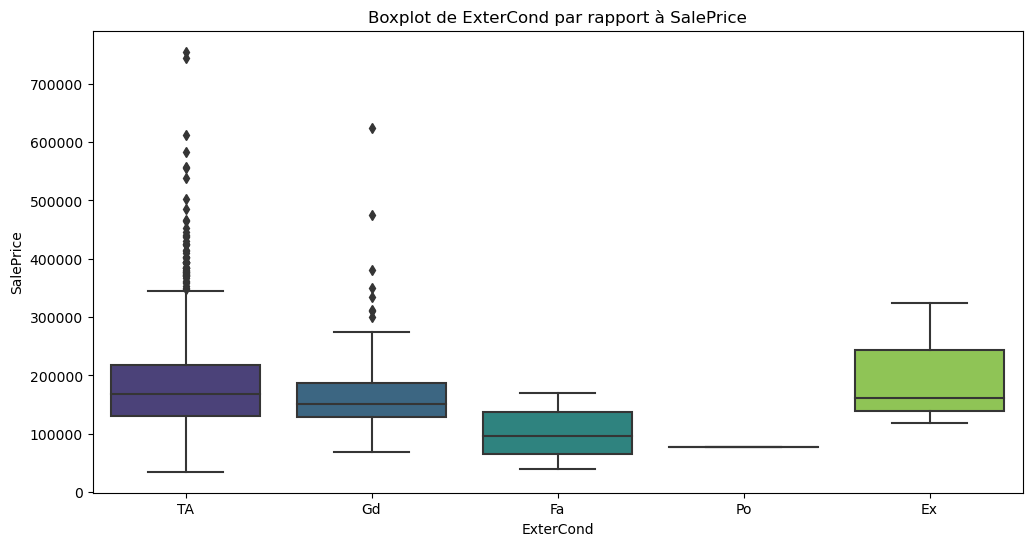

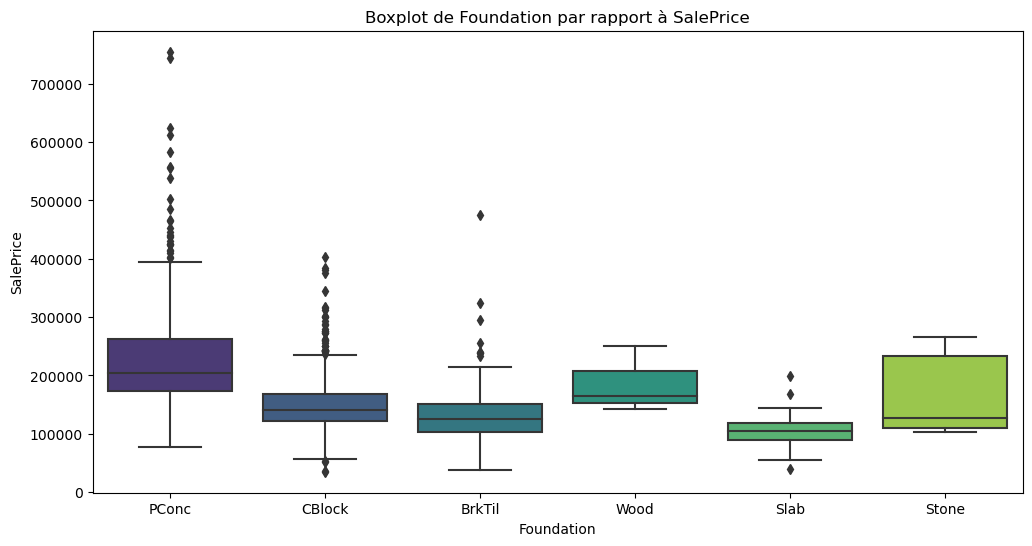

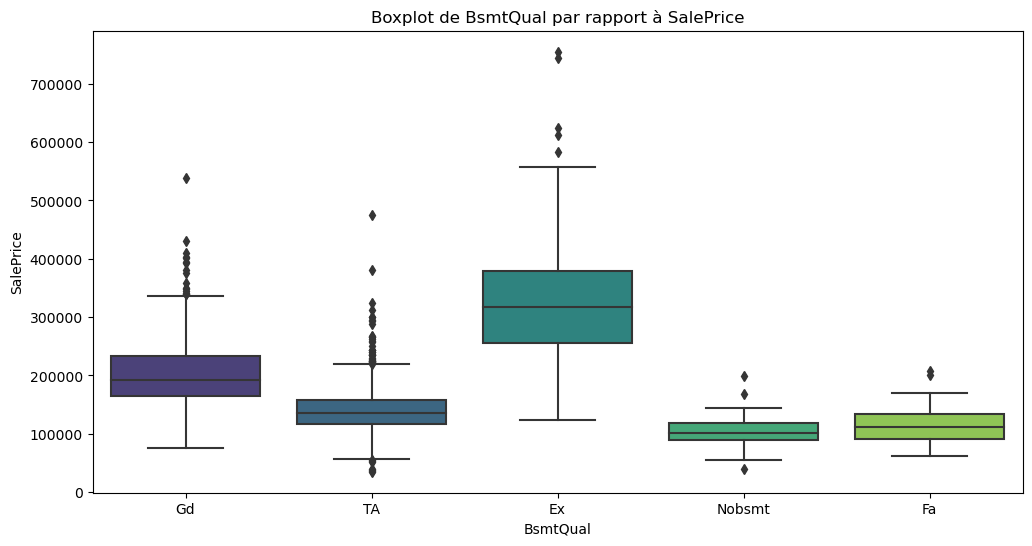

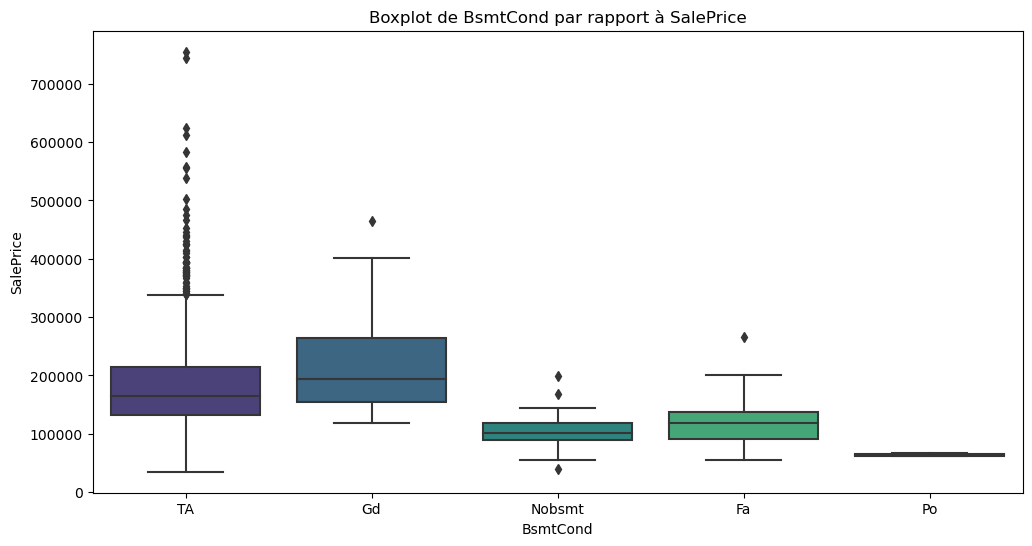

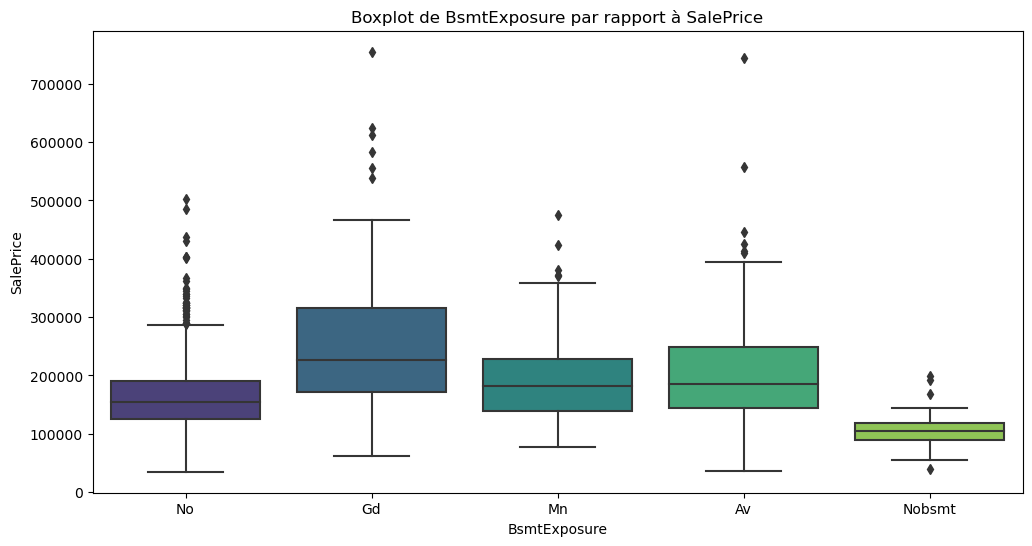

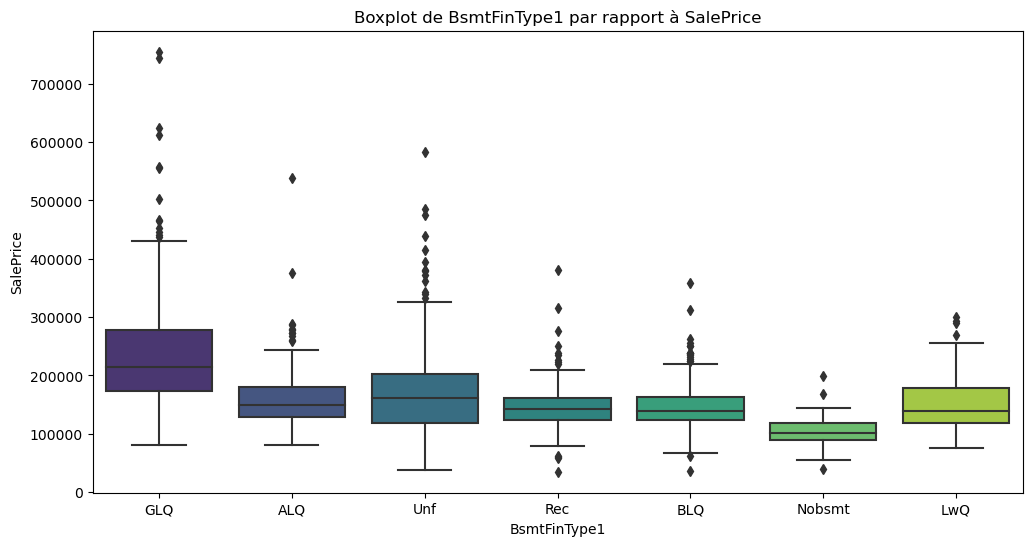

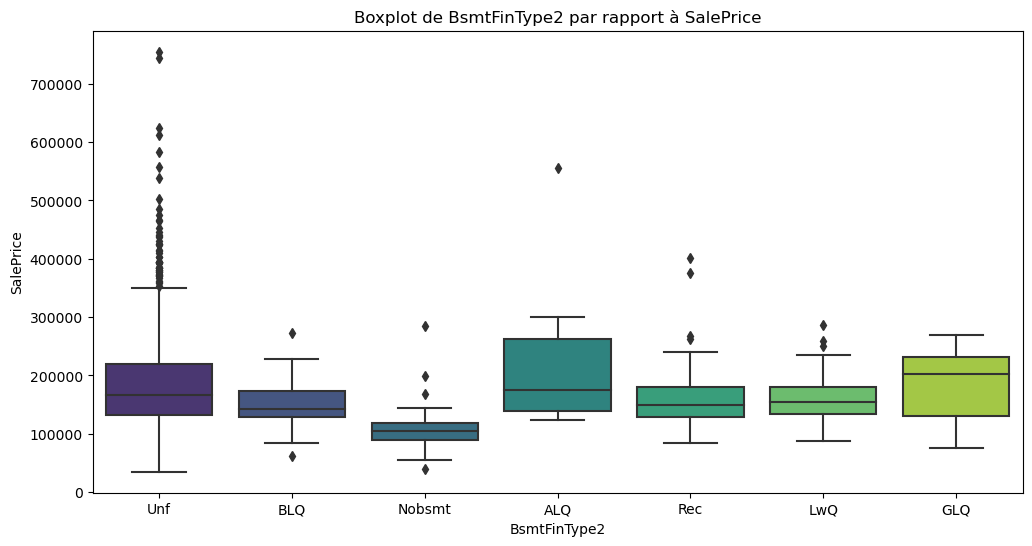

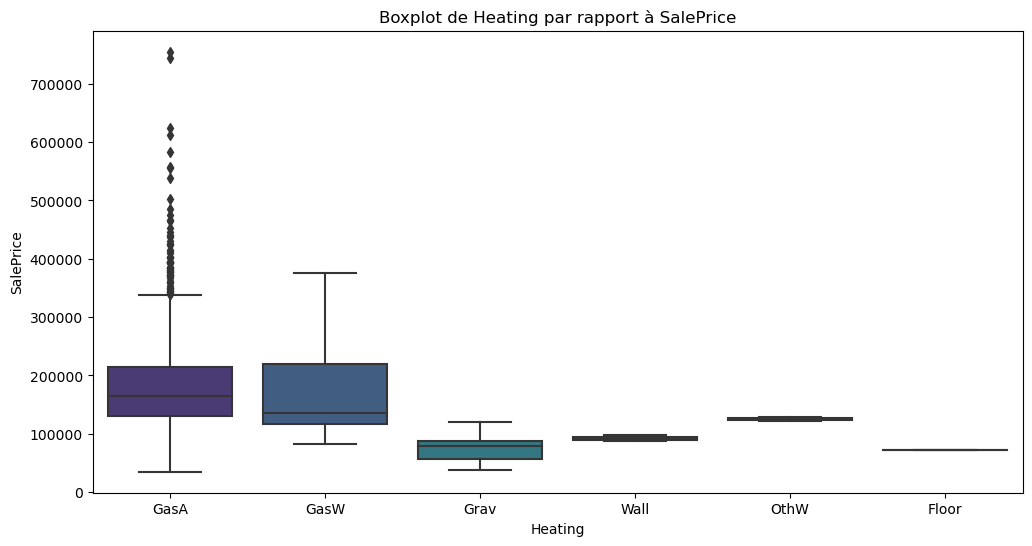

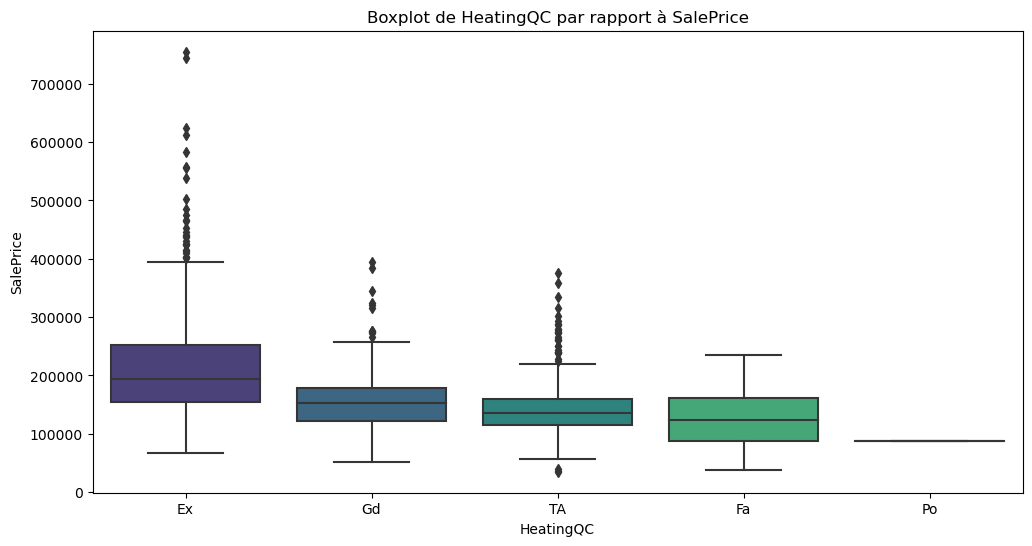

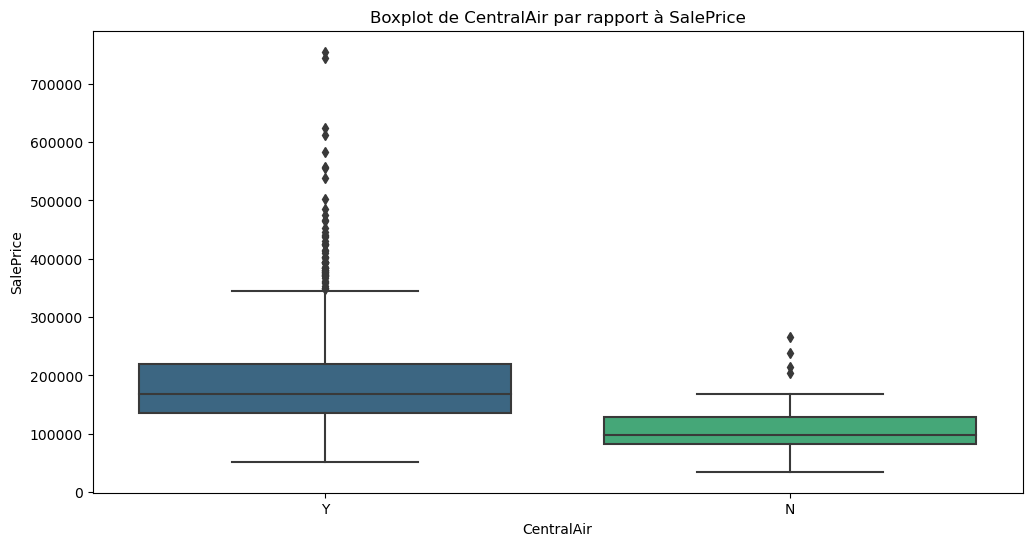

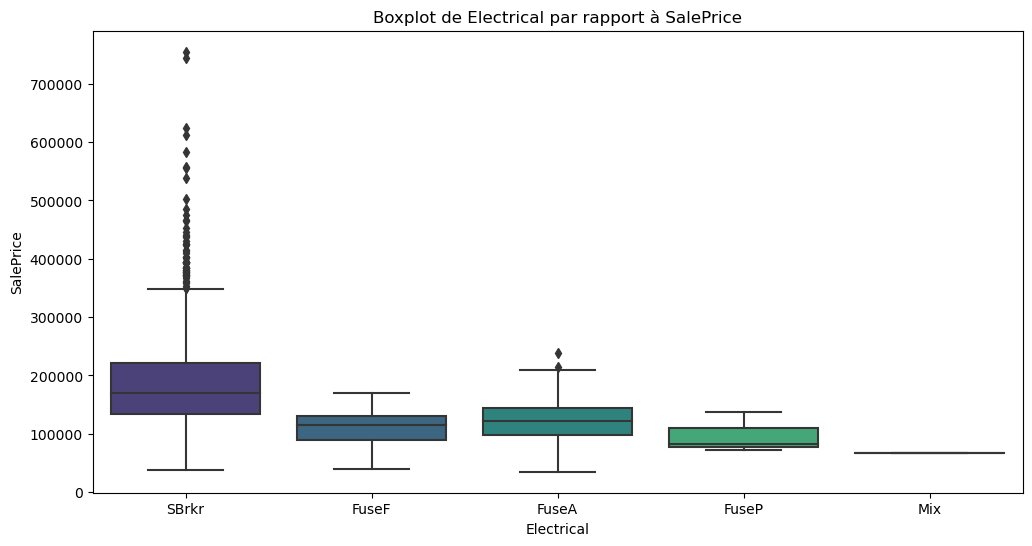

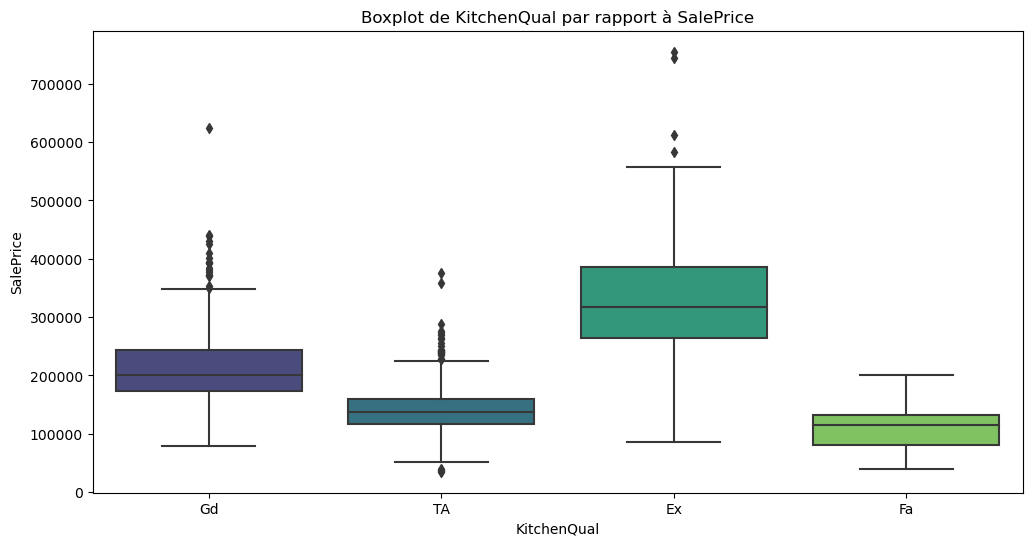

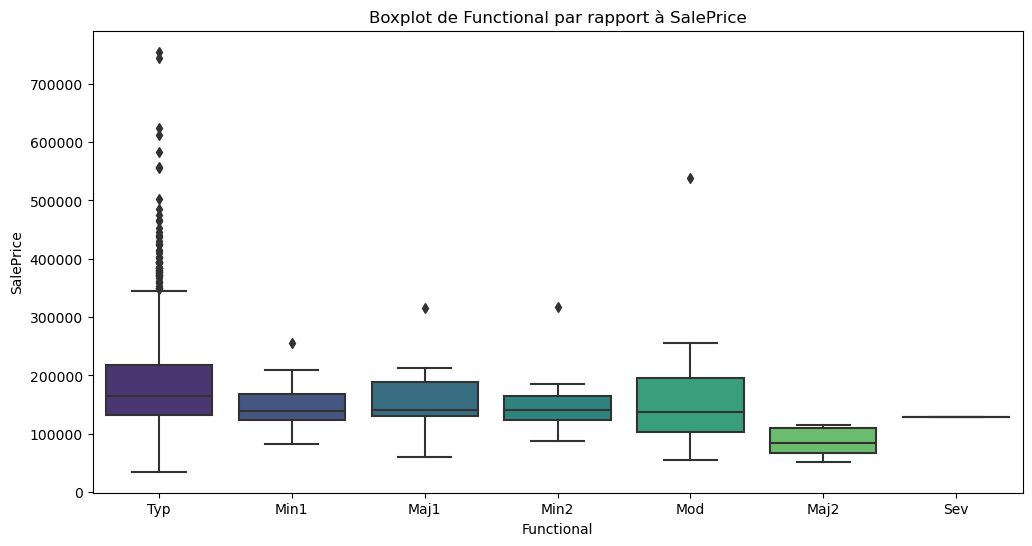

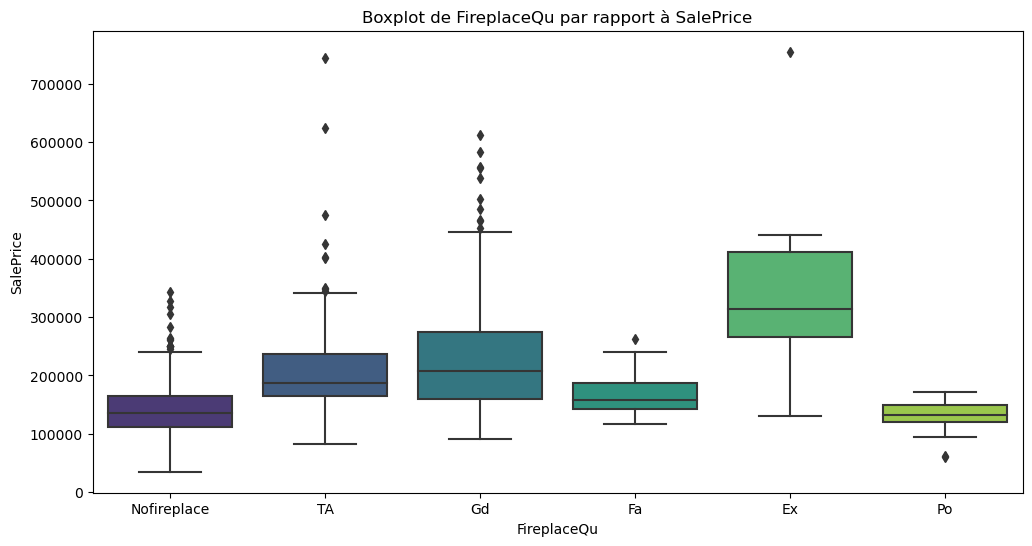

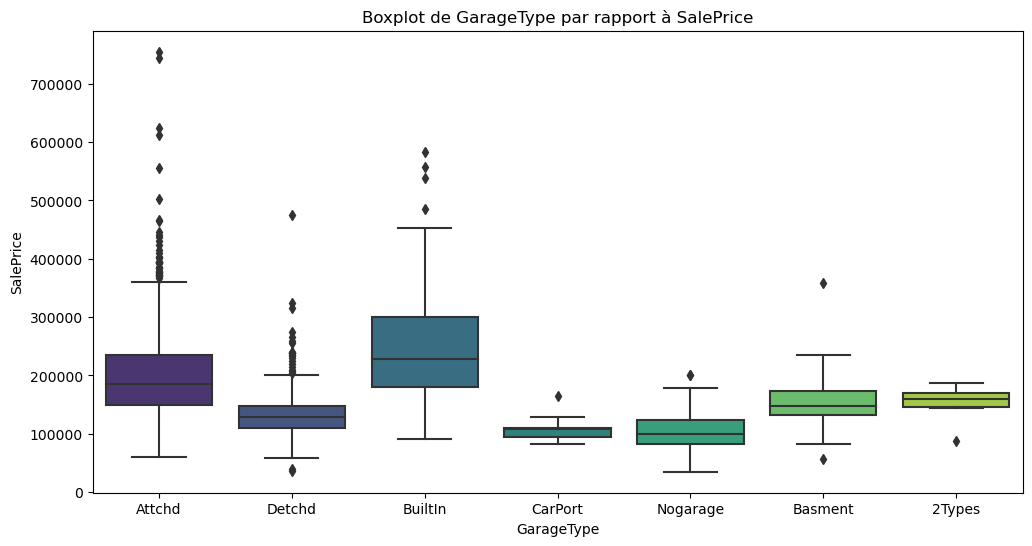

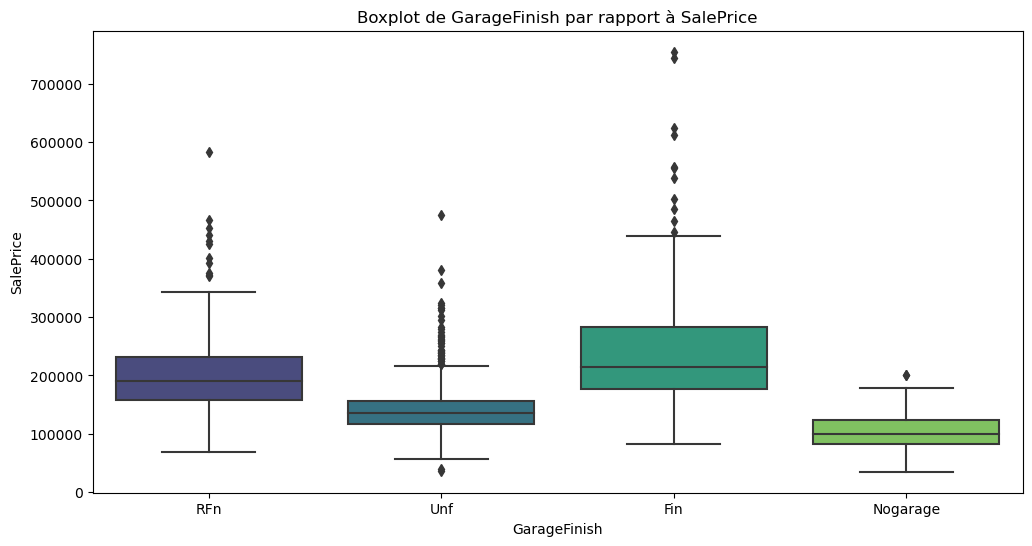

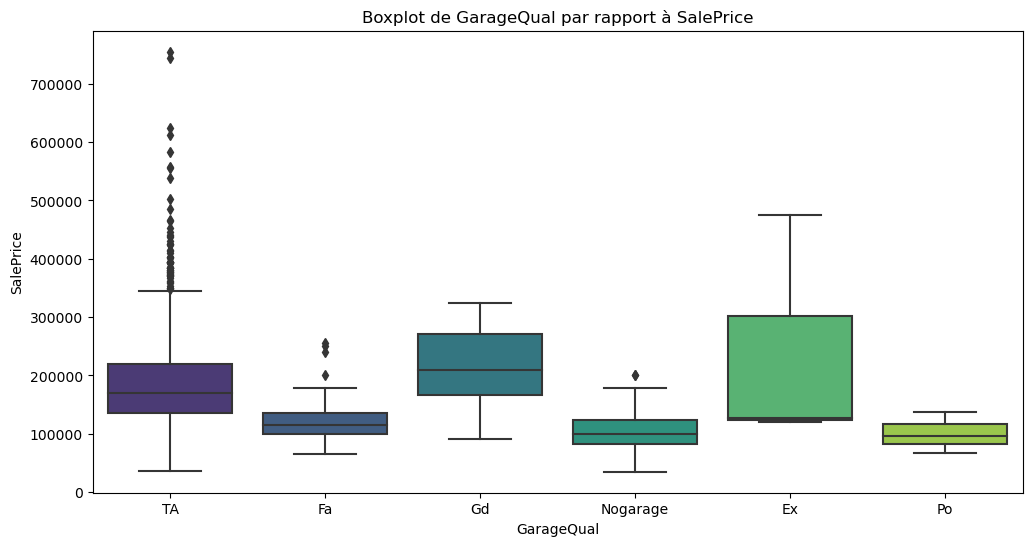

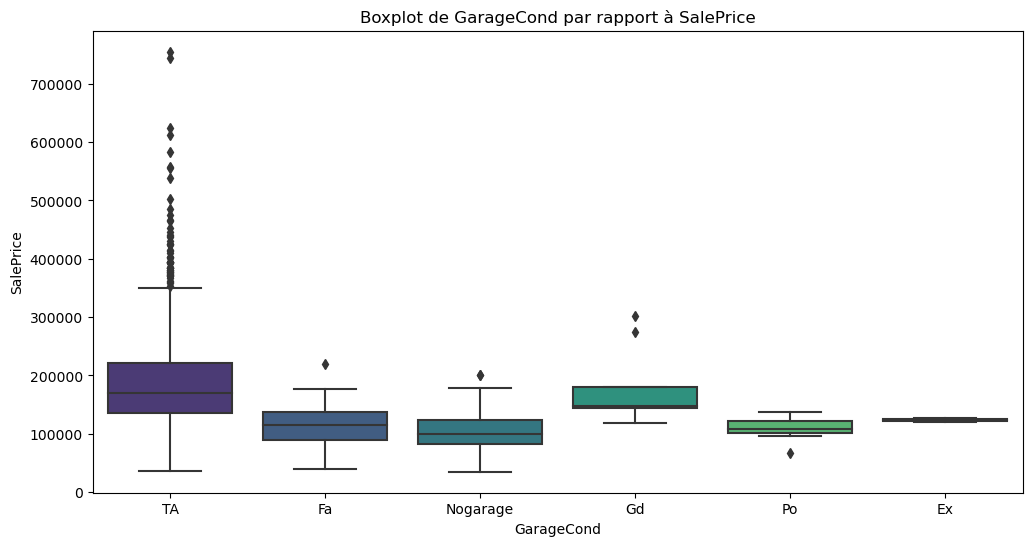

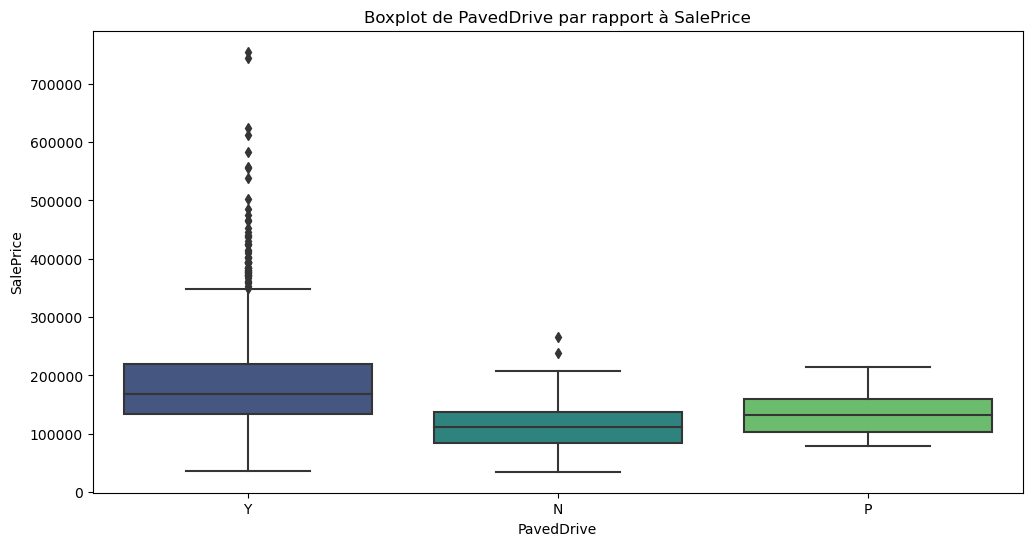

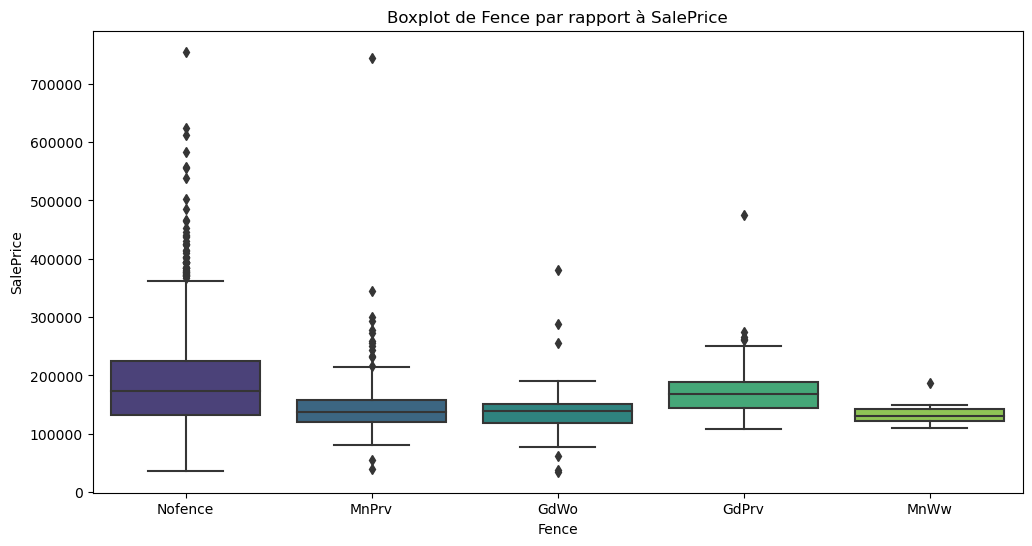

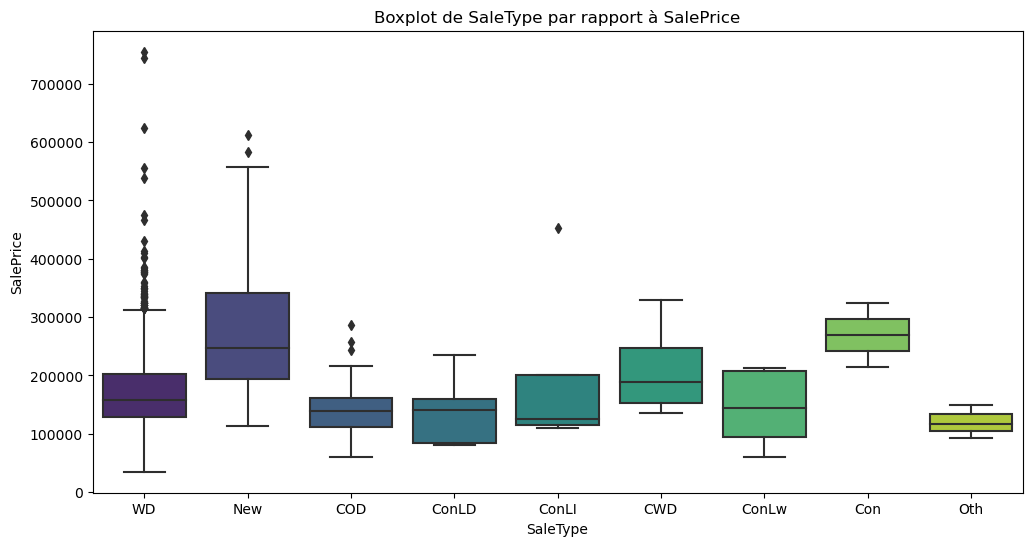

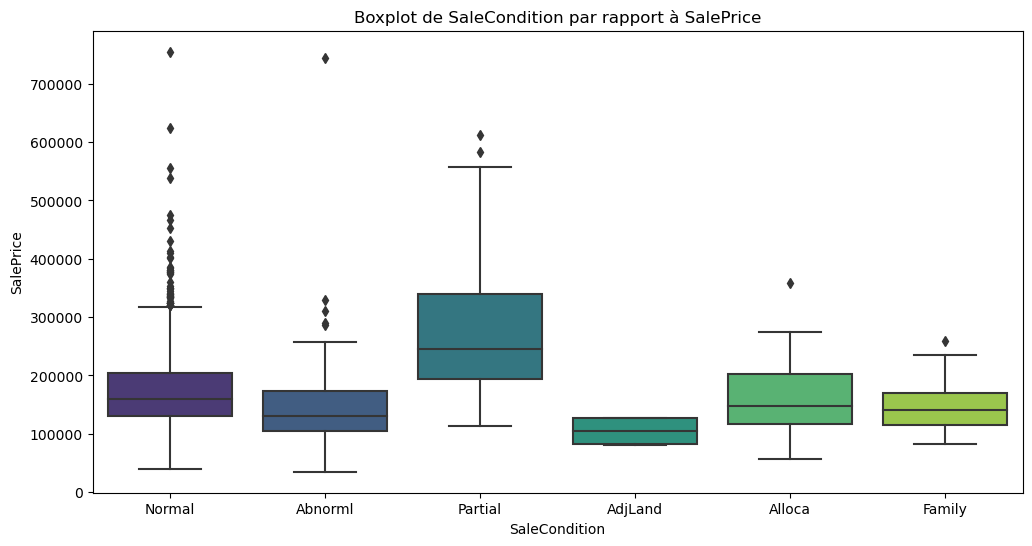

In [65]:
# variables_catégorielles contient la liste de vos variables catégorielles

for cat_var in data_h_qual:
    plt.figure(figsize=(12, 6))
    sb.boxplot(x=cat_var, y='SalePrice', data=data_h, palette='viridis')
    plt.title(f'Boxplot de {cat_var} par rapport à SalePrice')
    plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.4.1 Tests d'indépendance paramétrique : ANOVA</h3>
</div>

<div style="text-align:justify;font-family:times;font-size:15px">ANOVA signifie « Analysis of Variance » et est un test omnibus, ce qui signifie qu’il teste une différence globale entre tous les groupes. L’ANOVA unidirectionnelle, également appelée ANOVA à un facteur, est un test paramétrique utilisé pour tester une différence statistiquement significative d’un résultat entre 3 groupes ou plus. 
ce test se base sur certaines hypothèses:
    
- Normalité: les distributions de population sont normale
    
- Homogénéité de la variance: les échantillons ont des variances égales
    
- Indépendance: les différents groupes n'ont aucunes observations communes
</div>

<h4 style="text-align:justify;font-family:times;font-size:16px;font-style: italic;font-family:Century Schoolbook;color:black">VERIFICATION DES HYPOTHESES</h4>

<div style="text-align:justify;font-family:times;font-size:15px">
Vérifions si les hypothèses de l'ANOVA sont vérifiées afin de juger de la fiabilité des résultats de notre test
    
- Indépendance: 
Chaque individu ne peut présenter qu'une seule modalité. Les différents groupes étant constitués à partir des modalités, alors un individu ne peut appartenir qu’à un seul groupe. Les groupes s'excluent mutuellement comme dans notre exemple. Cette hypothèse est vérifiée.
    
- Normalité
L’hypothèse de normalité est testée sur les résidus du modèle lorsqu’elle provient d’une ANOVA ou d’un cadre de régression.Une méthode pour tester cette hypothèse est le test de Shapiro-Wilk fournit sur pythn par la a méthode shapiro() de scipy.stats. Ce test, publié en 1965 par Samuel Shapiro et Martin Wilk, teste l'hypothèse nulle selon laquelle un échantillon est issu d'une population normalement distribuée
</div>

In [67]:
# Création d'un DataFrame vide pour stocker les résultats du test de normalité
shapiro_results = pd.DataFrame(columns=['Variable', 'Shapiro-Wilk p-value'])


# test de normalité
for variable in data_h_qual:
    print(f"Test de normalité (Shapiro-Wilk) pour les résidus de {variable}")
    
    # modèle d'ANOVA
    model = ols(f'SalePrice ~ {variable}', data=data_h).fit()
    
    # les résidus du modèle
    resid = model.resid
    
    # test de normalité de Shapiro-Wilk
    _, p_value = st.shapiro(resid)
    
    # Ajout des résultats au DataFrame
    
    shapiro_results = pd.concat([shapiro_results, pd.DataFrame({'Variable': [variable], 'Shapiro-Wilk p-value': [p_value]})], ignore_index=True)
    
    
    # résultat du test
    
    if p_value < 0.05:
        print(f"Les résidus de {variable} ne suivent pas une distribution normale (p-value = {p_value}).")
    else:
        print(f"Les résidus de {variable} suivent une distribution normale (p-value = {p_value}).")
    
    print("\n")


Test de normalité (Shapiro-Wilk) pour les résidus de MSZoning
Les résidus de MSZoning ne suivent pas une distribution normale (p-value = 1.7519622905953068e-34).


Test de normalité (Shapiro-Wilk) pour les résidus de Street
Les résidus de Street ne suivent pas une distribution normale (p-value = 2.8916453896907856e-33).


Test de normalité (Shapiro-Wilk) pour les résidus de LotShape
Les résidus de LotShape ne suivent pas une distribution normale (p-value = 1.6487344174679244e-33).


Test de normalité (Shapiro-Wilk) pour les résidus de LandContour
Les résidus de LandContour ne suivent pas une distribution normale (p-value = 1.2866438069114643e-32).


Test de normalité (Shapiro-Wilk) pour les résidus de Utilities
Les résidus de Utilities ne suivent pas une distribution normale (p-value = 3.305318198463465e-33).


Test de normalité (Shapiro-Wilk) pour les résidus de LotConfig
Les résidus de LotConfig ne suivent pas une distribution normale (p-value = 2.8386026764778684e-33).


Test de nor

In [68]:
#résultats globaux du test de normalité
print("Résultats globaux du test de normalité (Shapiro-Wilk) :")
shapiro_results

Résultats globaux du test de normalité (Shapiro-Wilk) :


Variable  Shapiro-Wilk p-value
0        MSZoning          1.751962e-34
1          Street          2.891645e-33
2        LotShape          1.648734e-33
3     LandContour          1.286644e-32
4       Utilities          3.305318e-33
5       LotConfig          2.838603e-33
6       LandSlope          4.626311e-33
7    Neighborhood          3.399092e-31
8      Condition1          4.462955e-33
9      Condition2          3.334993e-33
10       BldgType          1.932471e-32
11     HouseStyle          5.867956e-33
12      RoofStyle          1.044406e-29
13       RoofMatl          4.757069e-32
14    Exterior1st          3.920319e-33
15    Exterior2nd          4.102544e-32
16     MasVnrType          9.992229e-32
17      ExterQual          1.252368e-29
18      ExterCond          1.823158e-33
19     Foundation          5.285197e-33
20       BsmtQual          6.604391e-29
21       BsmtCond          8.227786e-34
22   BsmtExposure          5.702267e-29
23   BsmtFinType1          3.822291e-31
24   BsmtFinType2          7.535188e-33
25        Heating          1.669832e-33
26      HeatingQC          7.410302e-32
27     CentralAir          2.302847e-34
28     Electrical          2.444304e-33
29    KitchenQual          6.375525e-28
30     Functional          5.670288e-33
31    FireplaceQu          1.631424e-29
32     GarageType          9.545297e-34
33   GarageFinish          3.225660e-33
34     GarageQual          5.795801e-34
35     GarageCond          4.211356e-34
36     PavedDrive          1.120423e-33
37          Fence          1.282643e-32
38       SaleType          3.257773e-31
39  SaleCondition          9.714723e-32

<div style="text-align:justify;font-family:times;font-size:15px">
Comme une des hypothèse du test notament la normalité n'est pas vérifié, les résultats de l'ANOVA ne peuvent être acceptés. Nous allons alors opter pour un test non paramétrique afin de contourner les hypothèses de depart.
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.4.2 Tests d'indépendance non paramétrique : Test de Kruskal Wallis</h3>
</div>

<div style="text-align:justify;font-family:times;font-size:15px">
Le test de Kruskal-Wallis (d'après William Kruskal et Wilson Allen Wallis) est une méthode non paramétrique utilisée pour tester si des échantillons trouvent leur origine dans la même distribution. Il permet de déterminer si les médianes de deux groupes ou plus diffèrent.
</div>

In [70]:
# Liste pour stocker les résultats du test de Kruskal-Wallis
kruskal_results = []

# Boucle sur chaque variable non numérique
for variable in data_h_qual:
    print(f"Test de Kruskal-Wallis pour {variable}")
    
    # Création des groupes
    groups = [data_h[data_h[variable] == level]['SalePrice'] for level in data_h[variable].unique()]
    
    # Test de Kruskal-Wallis
    statistic, p_value = st.kruskal(*groups)
    # Vérification de la significativité
    significatif = p_value < 0.05
    # Affichage des résultats
    if significatif  < 0.05: 
         print(f"Il y a dépendance entre les variables {variable} et SalePrice")
    else:
         print(f"Il n'y a pas dépendance entre les variables {variable} et SalePrice")
    print("\n")
 
    # Stockage des résultats
    kruskal_results.append({'Variable': variable, 'Statistique': statistic, 'P-value': p_value,'Significatif': [significatif]})

# Création d'un DataFrame à partir des résultats
kruskal_df = pd.DataFrame(kruskal_results)

# Affichage des résultats
kruskal_df

Test de Kruskal-Wallis pour MSZoning
Il n'y a pas dépendance entre les variables MSZoning et SalePrice


Test de Kruskal-Wallis pour Street
Il y a dépendance entre les variables Street et SalePrice


Test de Kruskal-Wallis pour LotShape
Il n'y a pas dépendance entre les variables LotShape et SalePrice


Test de Kruskal-Wallis pour LandContour
Il n'y a pas dépendance entre les variables LandContour et SalePrice


Test de Kruskal-Wallis pour Utilities
Il y a dépendance entre les variables Utilities et SalePrice


Test de Kruskal-Wallis pour LotConfig
Il n'y a pas dépendance entre les variables LotConfig et SalePrice


Test de Kruskal-Wallis pour LandSlope
Il y a dépendance entre les variables LandSlope et SalePrice


Test de Kruskal-Wallis pour Neighborhood
Il n'y a pas dépendance entre les variables Neighborhood et SalePrice


Test de Kruskal-Wallis pour Condition1
Il n'y a pas dépendance entre les variables Condition1 et SalePrice


Test de Kruskal-Wallis pour Condition2
Il n'y a pas d

Variable  Statistique        P-value Significatif
0        MSZoning   270.070197   3.080724e-57       [True]
1          Street     3.062353   8.012556e-02      [False]
2        LotShape   150.954173   1.640323e-32       [True]
3     LandContour    35.309552   1.047923e-07       [True]
4       Utilities     0.407369   5.233080e-01      [False]
5       LotConfig    35.723906   3.297912e-07       [True]
6       LandSlope     3.938837   1.395380e-01      [False]
7    Neighborhood   868.532376  6.696799e-168       [True]
8      Condition1    74.403863   6.492600e-13       [True]
9      Condition2    17.774158   1.303159e-02       [True]
10       BldgType    69.800606   2.500858e-14       [True]
11     HouseStyle   185.429426   1.388507e-36       [True]
12      RoofStyle    39.877541   1.580733e-07       [True]
13       RoofMatl    18.872136   8.597464e-03       [True]
14    Exterior1st   304.044576   1.694486e-56       [True]
15    Exterior2nd   284.231143   1.047636e-51       [True]
16     MasVnrType   281.871488   8.799863e-60       [True]
17      ExterQual   683.440084  8.180798e-148       [True]
18      ExterCond    46.616968   1.832365e-09       [True]
19     Foundation   488.722751  2.169096e-103       [True]
20       BsmtQual   674.410861  1.209826e-144       [True]
21       BsmtCond   120.879715   3.465401e-25       [True]
22   BsmtExposure   191.029762   3.184260e-40       [True]
23   BsmtFinType1   348.878440   2.686870e-72       [True]
24   BsmtFinType2    64.589387   5.232441e-12       [True]
25        Heating    33.266686   3.331280e-06       [True]
26      HeatingQC   356.776407   6.036449e-76       [True]
27     CentralAir   143.198261   5.319642e-33       [True]
28     Electrical   131.510916   1.850352e-27       [True]
29    KitchenQual   661.481587  4.720113e-143       [True]
30     Functional    32.559816   1.274180e-05       [True]
31    FireplaceQu   461.899625   1.331155e-97       [True]
32     GarageType   532.695615  7.581344e-112       [True]
33   GarageFinish   609.808380  7.534250e-132       [True]
34     GarageQual   192.001300   1.458782e-39       [True]
35     GarageCond   190.963638   2.431209e-39       [True]
36     PavedDrive   115.839102   7.012268e-26       [True]
37          Fence    78.023242   4.567247e-16       [True]
38       SaleType   156.382877   9.119744e-30       [True]
39  SaleCondition   168.322541   1.663313e-34       [True]

<div style="text-align:justify;font-family:times;font-size:15px">
Il ressort de ce test que la majorité des variables qualitatives semblent avoir une liaison avec la variable cible
</div>

<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 4. Features engineering </h1>
</div>

<div style="text-align:justify;font-family:times;font-size:15px">
Comme nous l'avons vu plus haut, le jeu de données comporte aussi bien des variables qualitatives que quantitative. Or la plupart des algorithmes de machine learning nécessitent que les données d'entrée soient numériques. Les variables catégorielles doivent donc être converties en formats numériques pour être utilisées dans ces algorithmes. 
</div>


<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1 recodage des variables qualitatives ordinales</h2>
</div>

<div style="text-align:justify;font-family:times;font-size:15px">

Dans le jeux de données, nous avons des variables quantitatives ordinales qui sont des variables de mesure du niveau de qualité et les autres variables ordinales. 
</div>

<div style="text-align:justify;font-family:times;font-size:15px">

Ces variables mesurent le niveau de qualité de certains élements de la maison. Il s'agit de : 

- OverallQual : Évalue le matériau global et la finition de la maison (déjà recodé) ;

- OverallCond : Évalue l’état général de la maison (déjà recodé)

- ExterQual : Évalue la qualité du matériau à l’extérieur (à recoder) 

- ExterCond : Évalue l’état actuel du matériau à l’extérieur (à recoder)

- BsmtQual : Évalue la hauteur du sous-sol (à recoder)

- BsmtCond : Évalue l’état général du sous-sol (à recoder)

- BsmtExposure : Fait référence à l’exposition des murs au rez-de-chaussée ou au rez-de-jardin (à recoder)

- BsmtFinType1 : Évaluation de la zone finie du sous-sol (à recoder)

- BsmtFinType2 : Évaluation de la surface finie du sous-sol (si plusieurs types de sous sols) (à recoder)

- HeatingQC : Qualité et état du chauffage (à recoder)

- KitchenQual : Qualité de la cuisine (à recoder)

- FireplaceQu : Qualité de la cheminée (supprimée)

- GarageQual : Qualité de garage (à recoder)

- GarageCond : État du garage (à recoder)

- PoolQC : Qualité de la piscine (supprimée)

- PavedDrive : Allée pavée (à recoder) 

- GarageFinish : Finition intérieure du garage (à recoder)

- HouseStyle : Style d’habitation (à recoder)

- Fence : Qualité de la clôture (à recoder)

- FireplaceQu : Qualité de la cheminée (à recoder)

- Functional : fonctionnalités de la maison (à recoder)
</div>

<div style="text-align:justify;font-family:times;font-size:15px">
Après avoir identifié les variables à recoder, explorons leurs modalités
</div>


In [ ]:
# Exploration des modalités des variables
colonne = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
           "HeatingQC", "KitchenQual", "GarageQual", "GarageCond", "PavedDrive", "GarageFinish", "HouseStyle", "Fence",
           "FireplaceQu"]

# Parcourir chaque colonne 
for col in colonne:
    # Obtenir les fréquences des modalités
    modalites_counts = data_h_qual[col].value_counts()
    # Afficher les modalités
    modalites = modalites_counts.index.tolist()
    print(f"Modalités de {col} : {modalites}")

    

<div style="text-align:justify;font-family:times;font-size:15px">
Parmis ces variables à recoder,il y a certaines avec les même modalités. Nous allons donc definir un recodage commun pour elles. Mais avant tout, nous allons créer une fonction pour faciliter le recodage.
</div>

In [ ]:
# Création de la fonction de recodage 
def recode_var(df, variables, labels):
    """Documentation de la fonction
    
    La fonction a pour objectif de recoder les variables qualitatives ayant les même modalités
    
    Arguments:
        df (panda data frame) : jeu de donnée contenant les variables 
        variables (list): liste des variables à recoder.
        labels (dictionnaire): ancienne et nouvelle valeur des modalités des variables.
    
    Returns:
        panda data frame : retourne le data frame avec les variables recodées (on écrase les variables à recoder).
    """
    # Corps de la fonction
    # Parcourir chaque colonne 
    for var in variables:
        # recoder chacune des variable
        df[var] = df[var].map(labels)
    return df


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1.2 recodage de la variable Fence</h3>
</div>

<div style="text-align:justify;font-family:times;font-size:15px">
Les modalités sont : 

       GdPrv	Good Privacy : 4
       MnPrv	Minimum Privacy : 3
       GdWo	Good Wood : 2
       MnWw	Minimum Wood/Wire : 1
       Nofence	No Fence : 0
</div>

In [ ]:
# recodage de  Fence
var_to_recode = ["Fence"]

# définition des nouvelle valeurs
ordinal_mapping = {'Nofence': 0,'MnWw': 1, 'GdWo': 2 ,'MnPrv': 3,'GdPrv': 4}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1.3 recodage de la variable FireplaceQu</h3>
</div>

<div style="text-align:justify;font-family:times;font-size:15px">
Les modalités sont : 

       Ex	Excellent - Exceptional Masonry Fireplace : 5
       Gd	Good - Masonry Fireplace in main level : 4
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement : 3
       Fa	Fair - Prefabricated Fireplace in basement : 2
       Po	Poor - Ben Franklin Stove : 1
       Nofireplace	No Fireplace : 0
</div>

In [ ]:
# recodage de  FireplaceQu
var_to_recode = ["FireplaceQu"]

# définition des nouvelle valeurs
ordinal_mapping = {'Nofireplace': 0,'Po': 1,'Fa': 2 ,'TA': 3,'Gd': 4, 'Ex': 5}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1.4 recodage de la variable PavedDrive</h3>
</div>

<div style="text-align:justify;font-family:times;font-size:15px">
Les modalités sont : 


       Y	Paved 3
       P	Partial Pavement 2
       N	Dirt/Gravel 1
</div>

In [ ]:
# recodage de  PavedDrive
var_to_recode = ["PavedDrive"]

# définition des nouvelle valeurs
ordinal_mapping = {'N': 1, 'P': 2 ,'Y': 3}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1.5 recodage de la variable GarageFinish</h3>
</div>

<div style="text-align:justify;font-family:times;font-size:15px">
Les modalités sont : 


       Fin	Finished : 3
       RFn	Rough Finished : 2
       Unf	Unfinished : 1
       Nogarage	No Garage : 0
</div>

In [ ]:
# recodage de  GarageFinish
var_to_recode = ["GarageFinish"]

# définition des nouvelle valeurs
ordinal_mapping = {'Nogarage': 0, 'Unf': 1 ,'RFn': 2,'Fin': 3}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1.6 recodage de la variable HouseStyle</h3>
</div>

<div style="text-align:justify;font-family:times;font-size:15px">
Les modalités sont :


       SFoyer	Split Foyer : 0
       SLvl	Split Level : 0.5
       1Story	One story : 1
       1.5Fin	One and one-half story: 2nd level finished  : 1.5
       1.5Unf	One and one-half story: 2nd level unfinished : 1.25
       2Story	Two story : 2
       2.5Fin	Two and one-half story: 2nd level finished : 2.5
       2.5Unf	Two and one-half story: 2nd level unfinished : 2.25
</div>

In [ ]:
# recodage de HouseStyle
# définissons les variables à recoder
var_to_recode = ["HouseStyle"]

# définition des nouvelles valeurs 
ordinal_mapping = {'SFoyer': 0,'SLvl': 0.5, '1Story': 1 ,'1.5Fin': 1.5,'1.5Unf': 1.25, '2Story': 2, '2.5Fin': 2.5, '2.5Unf': 2.25}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1.7 recodage ddes variables ExterQual, ExterCond, KitchenQual, HeatingQC</h3>
</div>

<div style="text-align:justify;font-family:times;font-size:15px">
Les modalités sont : 


    Ex	Excellent : 5
    Gd	Good : 4
    TA	Average/Typical : 3
    Fa	Fair : 2
    Po	Poor : 1
</div>

In [ ]:
# recodage de  ExterQual, ExterCond, KitchenQual, HeatingQC
var_to_recode = ["ExterQual", "ExterCond", "KitchenQual", "HeatingQC"]

# définition des nouvelle valeurs
ordinal_mapping = {'Po': 1, 'Fa': 2 ,'TA': 3,'Gd': 4, 'Ex': 5}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1.8 recodage des variables BsmtQual, BsmtCond</h3>
</div>

Les modalités sont : 


       Ex	Excellent (100+ inches)	 : 5
       Gd	Good (90-99 inches) : 4
       TA	Typical (80-89 inches) : 3
       Fa	Fair (70-79 inches) : 2
       Po	Poor (<70 inches : 1
       Nobsmt	No Basement : 0

In [ ]:
# recodage de BsmtQual, BsmtCond
## définissons les variables à recoder
var_to_recode = ["BsmtQual", "BsmtCond"]

# définition des nouvelles valeurs 
ordinal_mapping = {'Nobsmt': 0,'Po': 1, 'Fa': 2 ,'TA': 3,'Gd': 4, 'Ex': 5}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1.9 recodage de la variable BsmtExposure</h3>
</div>

Les modalités sont : 


       Gd	Good Exposure : 4
       Av	Average Exposure (split levels or foyers typically score average or above) : 3
       Mn	Mimimum Exposure : 2
       No	No Exposure : 1
       Nobsmt	No Basement : 0

In [ ]:
# recodage de BsmtExposure
var_to_recode = ["BsmtExposure"]

# définition des nouvelle valeurs
ordinal_mapping = {'Nobsmt': 0,'No': 1, 'Mn': 2 ,'Av': 3,'Gd': 4}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1.10 recodage des variables BsmtFinType1, BsmtFinType2</h3>
</div>

Les modalités sont : 


       GLQ	Good Living Quarters : 6
       ALQ	Average Living Quarters : 5
       BLQ	Below Average Living Quarters : 4
       Rec	Average Rec Room : 3
       LwQ	Low Quality : 2
       Unf	Unfinshed : 1
       Nobsmt	No Basement : 0

In [ ]:
# recodage de BsmtFinType1, BsmtFinType2
var_to_recode = ["BsmtFinType1", "BsmtFinType2"]

# définition des valeurs
ordinal_mapping = {'Nobsmt': 0,'Unf': 1, 'LwQ': 2 ,'Rec': 3,'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1.11 recodage des variables GarageQual, GarageCond</h3>
</div>

Les modalités sont : 


       Ex	Excellent : 5
       Gd	Good : 4
       TA	Typical/Average : 3
       Fa	Fair : 2
       Po	Poor : 1
       Nogarage 	No Garage : 0

In [ ]:
# recodage de GarageQual, GarageCond
var_to_recode = ["GarageQual", "GarageCond"]

# définition des nouvelle valeurs
ordinal_mapping = {'Nogarage': 0,'Po': 1, 'Fa': 2 ,'TA': 3,'Gd': 4, 'Ex': 5}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1.12 recodage de la variable Functional </h3>
</div>

Les modalités sont : 

       Typ	Typical Functionality : 8
       Min1	Minor Deductions 1 : 7
       Min2	Minor Deductions 2 : 6
       Mod	Moderate Deductions : 5
       Maj1	Major Deductions 1 : 4
       Maj2	Major Deductions 2 : 3
       Sev	Severely Damaged : 2
       Sal	Salvage only : 1

In [ ]:
# recodage de  Functional
var_to_recode = ["Functional"]

# définition des nouvelle valeurs
ordinal_mapping = {'Sal': 1,'Sev': 2, 'Maj2': 3,'Maj1': 4,'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

<div style="text-align:justify;font-family:times;font-size:15px">
A présent assurons nous que le recodage a été effectif </div>

In [ ]:
# Exploration des modalités des variables
colonne = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
           "HeatingQC", "KitchenQual", "GarageQual", "GarageCond"]

# Parcourir chaque colonne 
for col in colonne:
    # Obtenir les fréquences des modalités
    modalites_counts = data_h_qual[col].value_counts()
    # Afficher les modalités
    modalites = modalites_counts.index.tolist()
    print(f"Modalités de {col} : {modalites}")

In [ ]:
data_h_qual.info()

Le recodage a bien été effectué. 

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2 Recodage des variables qualitatives non ordinales </h2>
</div>

<div style="text-align:justify;font-family:times;font-size:15px">
Pour les variables qualitatives non ordinale, les modalités de sont pas rangeables donc leur attribuer des nombres comme fait précédement serait non significatif. Nous préferons donc transformer leurs modalités en variables indicatrices. Voyons donc le nombre de modalités par variables </div>

In [ ]:
# Nombre de modalités des variables qualitatives
data_h_qual.select_dtypes(exclude=[np.number]).describe() 

<div style="text-align:justify;font-family:times;font-size:15px"> Nous pouvons voir dans le tableau ci-dessus que certaines variables ont plus de 5 modalités et transformer chacune de ces modalités en variable risque de nous conduire à un jeu de données avec trop de variables explicatives. Essayons donc de reduire le nombre de modalités par variables.</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1 Réduction du nombre de modalités des variables</h3>
</div>


In [ ]:
# determination des variables dont on va chercher à réduire les modalités
# Afficher les noms des variables qui ont plus de 2 modalités
for colonne in data_h_qual.select_dtypes(exclude=[np.number]).columns:
    nombre_modalites = data_h_qual[colonne].nunique()
    if nombre_modalites > 2:
        print(f"{colonne} a plus de 2 modalités ({nombre_modalites} modalités)")


<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1.1 recodage de la variable MSZoning : Identifie la classification générale de zonage de la vente.</h4>
</div>

In [ ]:
# répartition
data_h_qual["MSZoning"].value_counts(normalize=True)

<div style="text-align:justify;font-family:times;font-size:15px">On voit que les modalité "RL" (Residential Low Density) et "RM" (Residential Medium Density) à elles seules cumulent plus d'observations que les autres qui ont elles de faibles occurences. On va donc procéder à un recodage du type "RL", "RM" et "autres".</div>

In [ ]:
# recodage de MSZoning
var_to_recode = ["MSZoning"]

# définition des nouvelle valeurs
ordinal_mapping = {'RL': "RL",'RM': "RM",'FV': "Other",'RH': "Other",'C': "Other"}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

# vérification
data_h_qual["MSZoning"].value_counts(normalize=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1.2 recodage de la variable LotShape : Forme générale de la propriété</h4>
</div>

In [ ]:
# répartition
data_h_qual["LotShape"].value_counts(normalize=True)

<div style="text-align:justify;font-family:times;font-size:15px">On a comme modalités regulière et irégulières de type 1, 2 et 3. Recondons en régulière et irégulière</div>

In [ ]:
# recodage de LotShape
var_to_recode = ["LotShape"]

# définition des nouvelle valeurs
ordinal_mapping = {'Reg': "Reg",'IR1': "IR",'IR2': "IR",'IR3': "IR"}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

# vérification
data_h_qual["LotShape"].value_counts()

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1.3 recodage de la variable LandContour : Planéité de la propriété</h4>
</div>

In [ ]:
# répartition
data_h_qual["LandContour"].value_counts(normalize=True)

<div style="text-align:justify;font-family:times;font-size:15px">On a une modalité influente avec près de 90 % d'occurence et 3 modalités rares. Nous allons donc recoder en "peu_accidente" et "accidente"</div>

In [ ]:
# recodage de LandContour
var_to_recode = ["LandContour"]

# définition des nouvelle valeurs
ordinal_mapping = {'Lvl': "peu_accidente",'Bnk': "accidente",'HLS': "accidente",'Low': "accidente"}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

# vérification
data_h_qual["LandContour"].value_counts()


<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1.4 recodage de la variable LotConfig : Configuration du lot</h4>
</div>

In [ ]:
# répartition
data_h_qual["LotConfig"].value_counts(normalize=True)

<div style="text-align:justify;font-family:times;font-size:15px">On a 2 modalités influente et 3 modalités rares. Nous allons donc procéder à un recodage du type "Inside" (Terrain intérieur) "Corner" et autre.</div>

In [ ]:
# recodage de LotConfig
var_to_recode = ["LotConfig"]

# définition des nouvelle valeurs
ordinal_mapping = {'Inside': "Inside",'Corner': "Corner",'CulDSac': "Other",'FR2': "Other",'FR3': "Other"}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

# vérification
data_h_qual["LotConfig"].value_counts()

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1.5 recodage de la variable LandSlope : Pente de la propriété</h4>
</div>

In [ ]:
# répartition
data_h_qual["LandSlope"].value_counts(normalize=True)

On a une modalité influente et 4 modalités rares. Nous allons donc recoder en 'Gtl' et "mod_sev"

In [ ]:
# recodage de LandSlope
var_to_recode = ["LandSlope"]

# définition des nouvelle valeurs
ordinal_mapping = {'Gtl': "Gtl",'Mod': "mod_sev",'Sev': "mod_sev"}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

# vérification
data_h_qual["LandSlope"].value_counts()

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1.6 recodage de la variable Neighborhood : Emplacements physiques dans les limites de la ville d’Ames</h4>
</div>

In [ ]:
# répartition
data_h_qual["Neighborhood"].value_counts(normalize=True)

recodage en NAmes, CollgCr et autre

In [ ]:
# recodage de Neighborhood
var_to_recode = ["Neighborhood"]

# définition des nouvelle valeurs
ordinal_mapping = {'NAmes': "NAmes",'CollgCr': "CollgCr",'OldTown': "Other",'Edwards': "Other",'Somerst': "Other",
                   'Gilbert': "Other",'NridgHt': "Other",'Sawyer': "Other", 'NWAmes': "Other",'SawyerW': "Other",
                   'BrkSide': "Other",'Crawfor': "Other",'Mitchel': "Other", 'NoRidge': "Other",'Timber': "Other",
                   'IDOTRR': "Other",'ClearCr': "Other", 'StoneBr': "Other",'SWISU': "Other",'NPkVill': "Other",'Blueste': "Other",
                  'MeadowV': "Other",'Blmngtn': "Other", 'BrDale': "Other",'Veenker': "Other"}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

# vérification
data_h_qual["Neighborhood"].value_counts()

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1.7 recodage des variables Condition 1 : Proximité de diverses conditions et Condition 2 : Proximité de diverses conditions (s’il y en a plus d’une)</h4>
</div>

In [ ]:
# répartition de Condition 1
data_h_qual["Condition1"].value_counts(normalize=True)

In [ ]:
# répartition de Condition2
data_h_qual["Condition2"].value_counts(normalize=True)

In [ ]:
pd.crosstab(data_h_qual["Condition1"], data_h_qual["Condition2"])


<div style="text-align:justify;font-family:times;font-size:15px">L'analyse du tableau croisé ci-dessus nous enseigne principalement deux choses : 

- la majorité des propriétés n'a pas de proximité particulière avec une codition (croisement de Norm Norm = 1260) ;

- Très peu de propriétés ont une proximité avec plus d'une condition (fortes valeurs dans la colone Norm près de 99 % des observations)

La variable Condition2 a donc peu d'intérêt. nous allons alors la supprimer et recoder la variable Condition1 en "Nocondprox" pour "pas de proximité particulière avec une codition" et "Proxcond" pour "proximité particulière d'au moins une condition"</div>

In [ ]:
# recodage de Condition1
var_to_recode = ["Condition1"]

# définition des nouvelle valeurs
ordinal_mapping = {'Norm': "Nocondprox",'Feedr': "Proxcond",'Artery': "Proxcond",'RRNn': "Proxcond",
                   'PosN': "Proxcond",'PosA': "Proxcond",'RRAn': "Proxcond",'RRAe': "Proxcond"}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

# vérification
data_h_qual["Condition1"].value_counts()

In [ ]:
# suppression de Condition2
data_h_qual = data_h_qual.drop('Condition2', axis=1)

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1.8 recodage de la Variable BldgType : Type d’habitation</h4>
</div>

In [ ]:
# répartition
data_h_qual["BldgType"].value_counts(normalize=True)

recodage en 1Fam et autre

In [ ]:
# recodage de BldgType
var_to_recode = ["BldgType"]

# définition des nouvelle valeurs
ordinal_mapping = {'1Fam': "1Fam",'TwnhsE': "Other",'Duplex': "Other",'Twnhs': "Other",'2fmCon': "Other"}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

# vérification
data_h_qual["BldgType"].value_counts()

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1.9 recodage de la Variable RoofStyle : Type de toiture</h4>
</div>

In [ ]:
# répartition
data_h_qual["RoofStyle"].value_counts(normalize=True)

recodage grable Hip et autre

In [ ]:
# recodage de BldgType
var_to_recode = ["RoofStyle"]

# définition des nouvelle valeurs
ordinal_mapping = {'Gable': "Gable",'Hip': "Hip",'Flat': "Other",'Gambrel': "Other",'Mansard': "Other",'Shed': "Other"}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

# vérification
data_h_qual["RoofStyle"].value_counts()

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1.10 recodage de la Variable RoofMatl :  Matériau du toit</h4>
</div>

In [ ]:
# répartition
data_h_qual["RoofMatl"].value_counts(normalize=True)

suppression car modalité avec un poids de plus de 98 % 

In [ ]:
# suppression de RoofMatl
data_h_qual = data_h_qual.drop('RoofMatl', axis=1)

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.11 recodage des Variables Exterior1st : Revêtement extérieur de la maison et Exterior2nd : Revêtement extérieur de la maison (si plus d'un matériau)</h4>
</div>

In [ ]:
# répartition de Exterior1st
data_h_qual["Exterior1st"].value_counts(normalize=True)

In [ ]:
# répartition de Exterior2nd
data_h_qual["Exterior2nd"].value_counts(normalize=True)

In [ ]:
# Répartition croisée de Exterior1st et Exterior2nd
pd.crosstab(data_h_qual["Exterior1st"], data_h_qual["Exterior2nd"])


<div style="text-align:justify;font-family:times;font-size:15px">L'analyse du tableau ci-dessus nous ensigne que dans la majorité des cas, les maisons présentent les même observation pour les 2 variables (la majorité des observations sont sur des éléments diagonnaux). Ce qui veux dire qu'en général on utilise qu'un type de matériau pour le revêtement extérieur de la maison. Nous allons donc supprimer la variable Exterior2nd et ne conserver Exterior1st que nous allons recoder en VinylSd, HdBoard, MetalSd, Wd Sdng et autre.</div>

In [ ]:
# recodage de Exterior1st
var_to_recode = ["Exterior1st"]

# définition des nouvelle valeurs
ordinal_mapping = {'VinylSd': "VinylSd",'HdBoard': "HdBoard",'MetalSd': "MetalSd",'Wd Sdng': "Wd Sdng",'Plywood': "Other",
                   'CemntBd': "Other",'BrkFace': "Other",'WdShing': "Other", 'Stucco': "Other",'AsbShng': "Other",
                   'BrkComm': "Other",'Stone': "Other",'AsphShn': "Other", 'ImStucc': "Other",'CBlock': "Other"}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

# vérification
data_h_qual["Exterior1st"].value_counts()

In [ ]:
# suppression de Exterior2nd
data_h_qual = data_h_qual.drop('Exterior2nd', axis=1)

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1.12 recodage de la Variable Foundation : Type de fondation</h4>
</div>

In [ ]:
# répartition
data_h_qual["Foundation"].value_counts(normalize=True)

recodage PConc, CBlock et autre

In [ ]:
# recodage de Foundation
var_to_recode = ["Foundation"]

# définition des nouvelle valeurs
ordinal_mapping = {'PConc': "PConc",'CBlock': "CBlock",'BrkTil': "Other",'Slab': "Other",'Stone': "Other",'Wood': "Other"}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

# vérification
data_h_qual["Foundation"].value_counts()

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1.13 recodage de la Variable Heating : Type de chauffage</h4>
</div>

In [ ]:
# répartition
data_h_qual["Heating"].value_counts(normalize=True)

supprimer variable car comportant une modalité ayant un poids supérieu à 97 %

In [ ]:
# suppression de Heating
data_h_qual = data_h_qual.drop('Heating', axis=1)

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.14 recodage de la Variable Electrical : Système électrique</h4>
</div>

In [ ]:
# répartition
data_h_qual["Electrical"].value_counts(normalize=True)

supprimer variable car comportant une modalité ayant un poids supérieu à 90 %

In [ ]:
# suppression de Electrical
data_h_qual = data_h_qual.drop('Electrical', axis=1)

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1.16 recodage de la Variable GarageType : Emplacement du garage</h4>
</div>

In [ ]:
# répartition
data_h_qual["GarageType"].value_counts(normalize=True)

recodage Attchd, Detchd et autre

In [ ]:
# recodage de Foundation
var_to_recode = ["GarageType"]

# définition des nouvelle valeurs
ordinal_mapping = {'Attchd': "Attchd",'Detchd': "Detchd",'BuiltIn': "Other",'Nogarage': "Other",'Basment': "Other",
                   'CarPort': "Other", '2Types': "Other"}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

# vérification
data_h_qual["GarageType"].value_counts()

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1.17 recodage de la Variable SaleType : Type de vente</h4>
</div>

In [ ]:
# répartition
data_h_qual["SaleType"].value_counts(normalize=True)

recodage en WD et autre

In [ ]:
# recodage de SaleType
var_to_recode = ["SaleType"]

# définition des nouvelle valeurs
ordinal_mapping = {'WD': "WD",'New': "Other",'COD': "Other",'ConLD': "Other",'ConLI': "Other",
                   'ConLw': "Other", 'CWD': "Other", 'CWD': "Other", 'Con': "Other"}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

# vérification
data_h_qual["SaleType"].value_counts()

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1.18 recodage de la Variable SaleCondition : Condition de vente</h4>
</div>

In [ ]:
# répartition
data_h_qual["SaleCondition"].value_counts(normalize=True)

recodage Normal et autre

In [ ]:
# recodage de SaleType
var_to_recode = ["SaleCondition"]

# définition des nouvelle valeurs
ordinal_mapping = {'Normal': "Normal",'Partial': "Other",'Abnorml': "Other",'Family': "Other",'Alloca': "Other",
                   'AdjLand': "Other"}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

# vérification
data_h_qual["SaleCondition"].value_counts()

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1.19 recodage de la Variable MasVnrType </h4>
</div>

In [ ]:
# répartition
data_h_qual["MasVnrType"].value_counts(normalize=True)

Recodage en NoMasVnr, BrkFace et autre

In [ ]:
# recodage de MasVnrType
var_to_recode = ["MasVnrType"]

# définition des nouvelle valeurs
ordinal_mapping = {'NoMasVnr': "NoMasVnr",'BrkFace': "BrkFace",'Stone': "Other",'BrkCmn': "Other"}

# recodage
data_h_qual = recode_var(data_h_qual, var_to_recode,ordinal_mapping) 

# vérification
data_h_qual["MasVnrType"].value_counts()

Vérifions si le recodage a fonctionné 

In [ ]:
# Nombre de modalités des variables qualitatives
data_h_qual.select_dtypes(exclude=[np.number]).describe() 

Le recodage a été effectif. Transformons à présent ces variables en dummy variables.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.2 Transformation des variables qualitatives non ordinales en dummy variables</h3>
</div>

In [ ]:
# extraire les variables qualitatives non ordinale
no_ordinal = data_h_qual.select_dtypes(exclude=[np.number])
no_ordinal.head(3)

In [ ]:
no_ordinal.shape

In [ ]:
#transformation en dummy variables
no_ordinal_dummies = pd.get_dummies(no_ordinal,dtype ="int64")
no_ordinal_dummies.shape

In [ ]:
#créer un nouveau dataframe avec les variables qualitatives ordinales recodées et le dummies
ordinal = data_h_qual.drop(columns=no_ordinal) # variables ordinales recodées
data_h_qual_recode=pd.concat([ordinal, no_ordinal_dummies], axis=1)
data_h_qual_recode.head(3)

In [ ]:
data_h_qual_recode.info()

<div style="text-align:justify;font-family:times;font-size:15px">Reconstitution du jeux de données des variables explicatives avec les variables numériques et les variables catégorielles recodées.</div>

In [ ]:
X_df=pd.concat([data_h_quant, data_h_qual_recode], axis=1)
X_df.head(3)

In [ ]:
recode_df=pd.concat([X_df, Y], axis=1)
recode_df.info()

In [ ]:
# sauveguarde du jeu de données recodée sous foemat csv 
recode_df.to_csv(Path(DATA_DIR, 'data_recode.csv'), index=False)

<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 5. Selection finale des variables explicatives </h1>
</div>

<div style="text-align:justify;font-family:times;font-size:15px">
Pour la selection de variables, nous allons utiliser le ppscore. La bibliothèque PPS ou ppscore est un score asymétrique, indépendant du type de données, qui peut détecter des relations linéaires ou non linéaires entre deux colonnes. Le score varie de 0 (pas de pouvoir prédictif) à 1 (pouvoir prédictif parfait).
</div>

In [ ]:
# Faire le PPS score
variables = []
pp_scores = []

for col in X_df.columns : 
    pps_result = pps.score(recode_df, col, "SalePrice")
    
    # récupérer le PPS score
    pps_score = pps_result['ppscore']
   
    # stocker les résultats dans des listes
    variables.append(col)
    pp_scores.append(pps_score)
    
# Créer un DataFrame à partir des listes
pps_df = pd.DataFrame({'Variable': variables, 'PPS Score': pp_scores})

# trier le DataFrame en fonction du PPS Score
pps_df = pps_df.sort_values(by='PPS Score', ascending=False)

# Display the result DataFrame
print(pps_df)

In [ ]:
# Filtrer les variables avec un PPS Score égal à 0
variables_pps_0 = pps_df[pps_df['PPS Score'] == 0]

# Afficher le résultat
print("Variables avec PPS Score égal à 0:")
print(variables_pps_0)


In [ ]:
# Sélectionner uniquement les noms de variables avec un PPS Score égal à 0
variables_pps_0_names = variables_pps_0['Variable'].tolist()

# supprimer les variables avec un pps = 0 de la base
final_df = recode_df.drop(columns=variables_pps_0_names)
recode_df.shape
final_df.shape

Par ailleurs, la variable GarageYrBlt comportant des NA, son intégration causera des problèmes lors de la modélisation. On va donc la retirer de nos features également

In [ ]:
final_df = final_df.drop("GarageYrBlt", axis=1)

In [ ]:
# sauveguarde du jeu de données final sous foemat csv 
final_df.to_csv(Path(DATA_DIR, 'final_data.csv'), index=False)